# NADILA IMAARAH 3323600015 / 2 D4 SAINS DATA TERAPAN A

# **WEEK 4 REGRESI DATA FUEL CONSUMPTION RATINGS**

# 1. EDA

In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import sklearn.metrics as skm
import math

**ANALISIS**
di sini saya meimpor beberapa library yang akan saya gunakan untuk analisis lanjutan pada tahap berikutnya

**Membaca dataset**

In [630]:
df = pd.read_csv('Fuel_Consumption_Ratings.csv')
df

Model Year   Make              Model  Vehicle Class  Engine Size  \
0          2022  Acura                ILX        Compact          2.4   
1          2022  Acura         MDX SH-AWD     SUV: Small          3.5   
2          2022  Acura         RDX SH-AWD     SUV: Small          2.0   
3          2022  Acura  RDX SH-AWD A-SPEC     SUV: Small          2.0   
4          2022  Acura         TLX SH-AWD        Compact          2.0   
..          ...    ...                ...            ...          ...   
950        2022  Volvo        XC40 T5 AWD     SUV: Small          2.0   
951        2022  Volvo        XC60 B5 AWD     SUV: Small          2.0   
952        2022  Volvo        XC60 B6 AWD     SUV: Small          2.0   
953        2022  Volvo        XC90 T5 AWD  SUV: Standard          2.0   
954        2022  Volvo        XC90 T6 AWD  SUV: Standard          2.0   

     Cylinders Transmission Fuel  Fuel Consumption City  Fuel Consumption Hwy  \
0            4          AM8    Z                    9.9                   7.0   
1            6         AS10    Z                   12.6                   9.4   
2            4         AS10    Z                   11.0                   8.6   
3            4         AS10    Z                   11.3                   9.1   
4            4         AS10    Z                   11.2                   8.0   
..         ...          ...  ...                    ...                   ...   
950          4          AS8    Z                   10.7                   7.7   
951          4          AS8    Z                   10.5                   8.1   
952          4          AS8    Z                   11.0                   8.7   
953          4          AS8    Z                   11.5                   8.4   
954          4          AS8    Z                   12.4                   8.9   

     Fuel Consumption  Fuel Consumption Comb_mpg  CO2 Emissions  CO2 Rating  \
0                 8.6                         33            200           6   
1                11.2                         25            263           4   
2                 9.9                         29            232           5   
3                10.3                         27            242           5   
4                 9.8                         29            230           5   
..                ...                        ...            ...         ...   
950               9.4                         30            219           5   
951               9.4                         30            219           5   
952               9.9                         29            232           5   
953              10.1                         28            236           5   
954              10.8                         26            252           5   

     Smog Rating  
0              3  
1              5  
2              6  
3              6  
4              7  
..           ...  
950            5  
951            5  
952            7  
953            5  
954            7  

[955 rows x 15 columns]

**ANALISIS**
di sini saya menampilkan dataset yang akan saya gunakan untuk regresi. Dataset yang saya gunakan terdiri dari beberapa fitur yakni :               
 1   Make                      
 2   Model                      
 3   Vehicle Class             
 4   Engine Size               
 5   Cylinders                 
 6   Transmission              
 8   Fuel Consumption City     
 9   Fuel Consumption Hwy                                                           
 10  Fuel Consumption           
 11  Fuel Consumption Comb_mpg    
 12  CO2 Emissions              
 13  CO2 Rating                 
 14  Smog Rating 

**Menampilkan ukuran data**

In [631]:
print(df.shape)
df.head()


(955, 15)


Model Year   Make              Model Vehicle Class  Engine Size  Cylinders  \
0        2022  Acura                ILX       Compact          2.4          4   
1        2022  Acura         MDX SH-AWD    SUV: Small          3.5          6   
2        2022  Acura         RDX SH-AWD    SUV: Small          2.0          4   
3        2022  Acura  RDX SH-AWD A-SPEC    SUV: Small          2.0          4   
4        2022  Acura         TLX SH-AWD       Compact          2.0          4   

  Transmission Fuel  Fuel Consumption City  Fuel Consumption Hwy  \
0          AM8    Z                    9.9                   7.0   
1         AS10    Z                   12.6                   9.4   
2         AS10    Z                   11.0                   8.6   
3         AS10    Z                   11.3                   9.1   
4         AS10    Z                   11.2                   8.0   

   Fuel Consumption  Fuel Consumption Comb_mpg  CO2 Emissions  CO2 Rating  \
0               8.6                         33            200           6   
1              11.2                         25            263           4   
2               9.9                         29            232           5   
3              10.3                         27            242           5   
4               9.8                         29            230           5   

   Smog Rating  
0            3  
1            5  
2            6  
3            6  
4            7

**ANALISIS**
disini saya menampilkan ukuran dataset yang akan digunakan, ukuran data ini berukuran 955,15

**Menampilkan tipe data**

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model Year                 955 non-null    int64  
 1   Make                       955 non-null    object 
 2   Model                      955 non-null    object 
 3   Vehicle Class              955 non-null    object 
 4   Engine Size                955 non-null    float64
 5   Cylinders                  955 non-null    int64  
 6   Transmission               955 non-null    object 
 7   Fuel                       955 non-null    object 
 8   Fuel Consumption City      955 non-null    float64
 9   Fuel Consumption Hwy       955 non-null    float64
 10  Fuel Consumption           955 non-null    float64
 11  Fuel Consumption Comb_mpg  955 non-null    int64  
 12  CO2 Emissions              955 non-null    int64  
 13  CO2 Rating                 955 non-null    int64  

**ANALISIS**
disini saya menampilkan informasi dari setiap fitur  dimana akan menampilkan type data dari setiap fitur dan menampilkan apakah data yang memiliki nilai null namun berdasarkan output tidak ada fitur yang memiliki nilai null

**Menampilkan statistiks deskrptif**

In [633]:
df.describe()

Model Year  Engine Size   Cylinders  Fuel Consumption City  \
count       955.0   955.000000  955.000000             955.000000   
mean       2022.0     3.204188    5.684817              12.548377   
std           0.0     1.369863    1.934496               3.459582   
min        2022.0     1.200000    3.000000               4.000000   
25%        2022.0     2.000000    4.000000              10.200000   
50%        2022.0     3.000000    6.000000              12.300000   
75%        2022.0     4.000000    6.000000              14.700000   
max        2022.0     8.000000   16.000000              30.300000   

       Fuel Consumption Hwy  Fuel Consumption  Fuel Consumption Comb_mpg  \
count            955.000000        955.000000                 955.000000   
mean               9.400628         11.131728                  27.158115   
std                2.305053          2.888651                   7.686134   
min                3.900000          4.000000                  11.000000   
25%                7.700000          9.100000                  22.000000   
50%                9.200000         10.900000                  26.000000   
75%               10.700000         13.000000                  31.000000   
max               20.900000         26.100000                  71.000000   

       CO2 Emissions  CO2 Rating  Smog Rating  
count     955.000000  955.000000   955.000000  
mean      260.110995    4.519372     4.947644  
std        64.780198    1.477430     1.674629  
min        94.000000    1.000000     1.000000  
25%       214.000000    3.000000     3.000000  
50%       258.000000    4.000000     5.000000  
75%       302.500000    5.000000     6.000000  
max       608.000000   10.000000     7.000000

**ANALISIS**
Pada tahap ini saya menampilkan statistic deskripstif dan didapatkan bahwa :
1. Fitur Engine Size memiliki rata-rata 3.2 dengan standar deviasi 1.37, yang menunjukkan bahwa variasi fitur ini cukup besar. Selain itu, nilai minimum yang dimiliki adalah 1.2, sedangkan nilai maksimum mencapai 8.0, yang berarti skala nilai di fitur ini cukup luas.
2. Fitur Cylinders memiliki rata-rata 5.7 dengan standar deviasi 1.93, yang menunjukkan adanya variasi jumlah silinder antar kendaraan. Nilai minimum fitur ini adalah 3, sedangkan nilai maksimum mencapai 16, yang menunjukkan perbedaan signifikan antara kendaraan dengan mesin kecil dan kendaraan dengan mesin berperforma tinggi.
3. Fitur Fuel Consumption City memiliki rata-rata 12.5 L/100 km dengan standar deviasi 3.46, yang menunjukkan bahwa konsumsi bahan bakar kendaraan di dalam kota cukup bervariasi. Nilai minimum konsumsi bahan bakar adalah 4.0 L/100 km, sedangkan nilai maksimum mencapai 30.3 L/100 km, yang menandakan adanya kendaraan yang sangat hemat hingga kendaraan yang sangat boros bahan bakar.
4. Fitur Fuel Consumption Hwy memiliki rata-rata 9.4 L/100 km dengan standar deviasi 2.31, yang menunjukkan bahwa konsumsi bahan bakar di jalan tol lebih stabil dibandingkan di dalam kota. Nilai minimum fitur ini adalah 3.9 L/100 km, sedangkan nilai maksimum mencapai 20.9 L/100 km, yang berarti beberapa kendaraan sangat hemat, sementara yang lain masih boros meskipun di jalan tol.
5. Fitur Fuel Consumption Comb memiliki rata-rata 11.1 L/100 km dengan standar deviasi 2.89, menunjukkan variasi konsumsi bahan bakar gabungan yang cukup signifikan. Nilai minimum yang dimiliki fitur ini adalah 4.0 L/100 km, sedangkan nilai maksimum mencapai 26.1 L/100 km, yang menunjukkan adanya kendaraan dengan efisiensi bahan bakar tinggi serta kendaraan yang boros
6. Fitur Fuel Consumption Comb_mpg memiliki rata-rata 27.2 mpg dengan standar deviasi 7.69, yang menunjukkan perbedaan efisiensi bahan bakar antar kendaraan cukup besar. Nilai minimum fitur ini adalah 11 mpg, sedangkan nilai maksimum mencapai 71 mpg, yang berarti terdapat kendaraan yang sangat boros hingga yang sangat hemat bahan bakar.
7. Fitur CO2 Emissions memiliki rata-rata 260 g/km dengan standar deviasi 64.78, yang menunjukkan adanya variasi besar dalam emisi karbon kendaraan. Nilai minimum fitur ini adalah 94 g/km, sedangkan nilai maksimum mencapai 608 g/km, yang menunjukkan perbedaan signifikan antara kendaraan ramah lingkungan dan kendaraan dengan emisi tinggi
8. Fitur CO2 Rating memiliki rata-rata 4.5 dengan standar deviasi 1.48, yang menunjukkan bahwa sebagian besar kendaraan berada di kategori menengah dalam emisi karbon. Nilai minimum fitur ini adalah 1, sedangkan nilai maksimum mencapai 10, yang berarti terdapat kendaraan dengan emisi sangat rendah hingga kendaraan dengan emisi sangat tinggi.
9. Fitur Smog Rating memiliki rata-rata 4.9 dengan standar deviasi 1.67, yang menunjukkan variasi tingkat polusi kendaraan cukup besar. Nilai minimum fitur ini adalah 1, sedangkan nilai maksimum mencapai 7

**Menampilkan Missing Value**

In [634]:
df.isnull().sum()

Model Year                   0
Make                         0
Model                        0
Vehicle Class                0
Engine Size                  0
Cylinders                    0
Transmission                 0
Fuel                         0
Fuel Consumption City        0
Fuel Consumption Hwy         0
Fuel Consumption             0
Fuel Consumption Comb_mpg    0
CO2 Emissions                0
CO2 Rating                   0
Smog Rating                  0
dtype: int64

**ANALISIS**
koding ini mengecek apakah ada nilai null dari setiap fitur. Berdasarkan output tidak ditemukan fitur yang memiliki nilai null

**Visualisasi Variabel Target CO2 EMISSIONS**

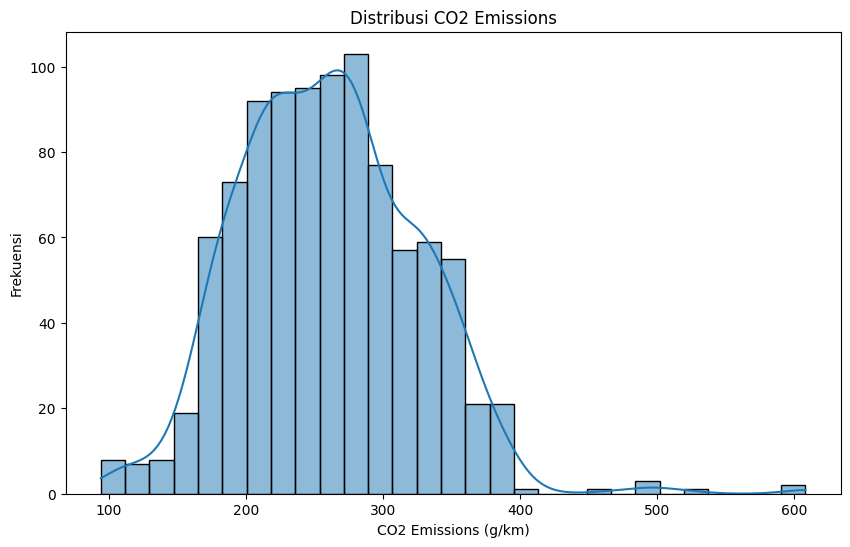

In [635]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 Emissions'], kde=True)
plt.title('Distribusi CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frekuensi')
plt.show()

**ANALISIS**
Disini saya melihat distribusi dari label atau target didapatkan bahwa Distribusi CO2 Emissions terlihat condong ke kanan (skewed right), yang berarti sebagian besar kendaraan memiliki emisi CO2 dalam rentang yang lebih rendah hingga sedang. Histogram menunjukkan bahwa sebagian besar kendaraan memiliki CO2 Emissions berkisar antara 200 hingga 300 g/km, dengan frekuensi tertinggi berada di sekitar 250 g/km

**Visualisasi Korelasi antar variabel dengan Heatmap**

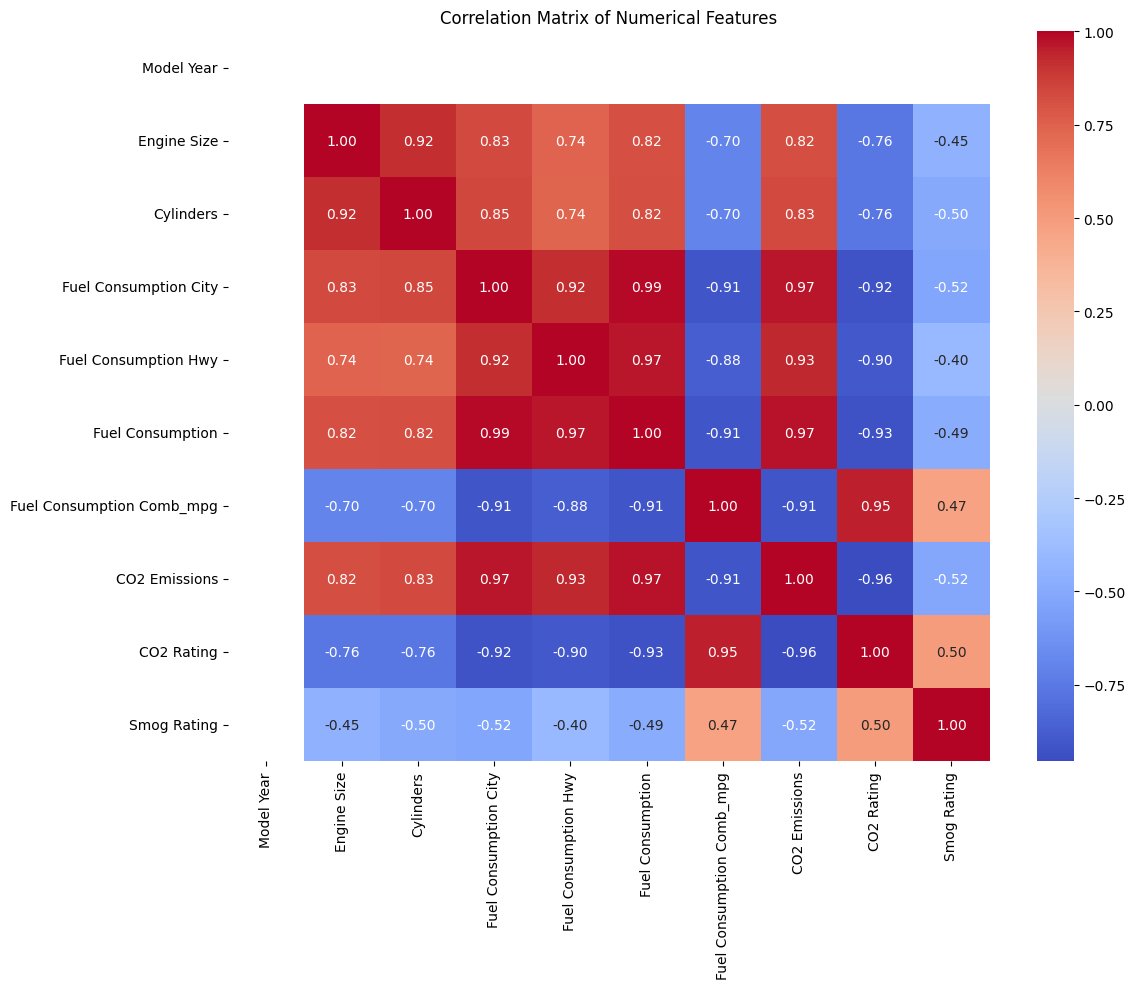

In [636]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan heatmap untuk menunjukkan korelasi masing-masing fitur dan didapatkan bahwa :
1. Engine Size dan Cylinders berkorelasi sebesar (0.92): menunjukkan bahwa kendaraan dengan mesin lebih besar cenderung memiliki lebih banyak silinder
2. Fuel Consumption City dan Fuel Consumption Hwy berkorelasi sebesar (0.92) : menunjukkan bahwa kendaraan yang boros di dalam kota juga cenderung boros di jalan raya.
3. Fuel Consumption dan CO2 Emissions berkorelasi sebesar (0.97) : menunjukkan bahwa menunjukkan bahwa kendaraan yang lebih boros cenderung lebih berpolusi.
4. Fuel Consumption Comb_mpg dan CO2 Rating berkorelasi sebesar (0.95) : menunjukkan bahwa efisiensi bahan bakar yang baik akan memiliki emisi yang lebih rendah.
5. CO2 Emissions dan CO2 Rating berkorelasi negatif  sebesar(-0.96) : Semakin tinggi emisi CO2, semakin rendah rating emisinya, yang menunjukkan bahwa kendaraan yang lebih ramah lingkungan memiliki emisi yang lebih rendah.
6. CO2 Emissions dan Smog Rating berkorelasi negatif sebesar(-0.52): Kendaraan dengan emisi CO2 tinggi juga cenderung memiliki rating smog yang lebih rendah
7. Engine Size dan Fuel Consumption City berkorelasi sebesar (0.83): Kendaraan dengan mesin lebih besar cenderung lebih boros dalam konsumsi bahan bakar di dalam kota.
8. Fuel Consumption Hwy dan Fuel Consumption Comb_mpg berkorelasi sebesar (-0.88): Kendaraan yang lebih boros di jalan raya memiliki efisiensi bahan bakar keseluruhan yang lebih buruk.
9. Cylinders dan CO2 Rating berkorelasi negatif sebesar (-0.76): Kendaraan dengan lebih banyak silinder cenderung memiliki rating emisi CO2 yang lebih rendah
10. Smog Rating dan CO2 Rating berkorelasi sebesar (0.50): Kendaraan dengan rating emisi CO2 yang lebih baik juga cenderung memiliki rating smog yang lebih tinggi

**Visualisasi korelasi fitur enginesize degan co2emissions**

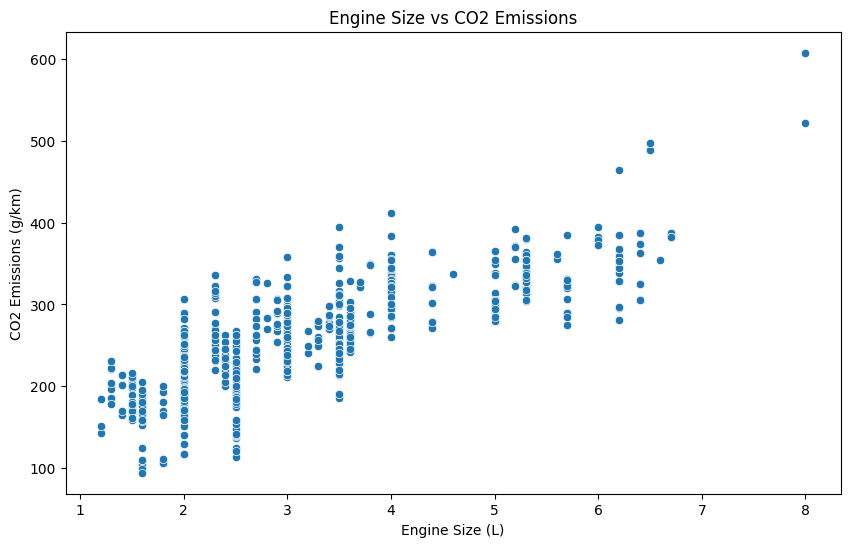

In [637]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size', y='CO2 Emissions', data=df)
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan scatterplot untuk menunjukkan korelasi fitur engine size dengan fitur co2 emissions dan didapatkan bahwa :
1. Scatterplot ini adanya hubungan positif antara Engine Size dengan CO2 emissions,artinya semakin besar ukuran mesin kendaraan, semakin tinggi emisi CO2 yang dihasilkan
2. Seiring dengan bertambahnya Engine Size, emisi CO2 juga meningkat



**Visualisasi korelasi fitur cylinders degan co2emissions**

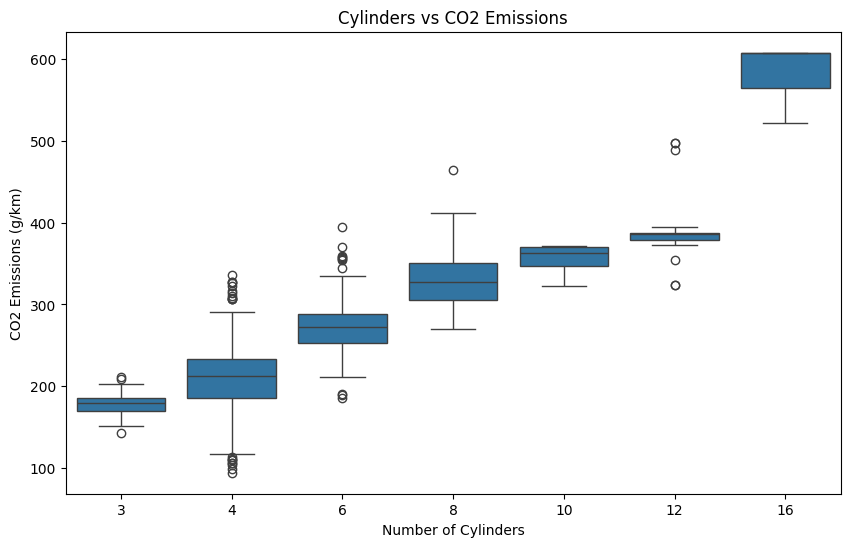

In [638]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cylinders', y='CO2 Emissions', data=df)
plt.title('Cylinders vs CO2 Emissions')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan boxplot untuk menunjukkan distribusi fitur Cylinders dengan fitur co2 emissions dan didapatkan bahwa :
1. semakin banyak Cylinders, semakin tinggi CO2 Emissions
2. Mesin dengan 3 atau 4 Cylinders memiliki emisi yang lebih rendah dibandingkan mesin dengan 8 atau lebih Cylinders.
3. Beberapa kategori silinder memiliki outlier, yang menunjukkan kendaraan dengan emisi jauh lebih tinggi dari rentang lainnya



**Visualisasi korelasi fitur fuel type degan co2emissions**

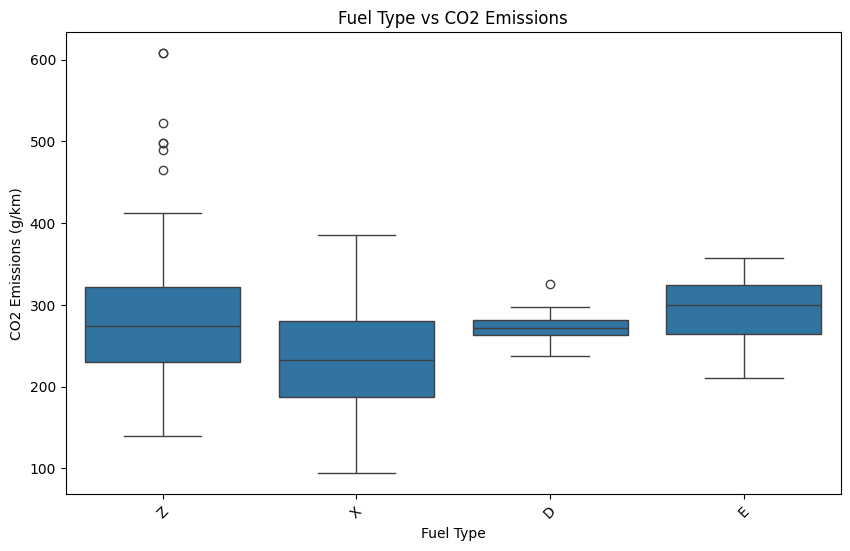

In [639]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='CO2 Emissions', data=df)
plt.title('Fuel Type vs CO2 Emissions')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan boxplot untuk menunjukkan distribusi fitur fuel type dengan fitur co2 emissions dan didapatkan bahwa :
1. Setiap jenis Fuel memiliki distribusi emisi CO2 yang berbeda.
2. Jenis bahan bakar pertama : Memiliki rentang emisi yang luas, dari sekitar 150 g/km hingga lebih dari 600 g/km.Terdapat data outlier
3. Jenis bahan bakar kedua :  Distribusi emisi lebih rendah dibandingkan jenis pertama.
4. Jenis bahan bakar ketiga : Memiliki rentang emisi yang lebih kecil
5. Jenis bahan bakar keempat : Memiliki distribusi emisi yang mirip dengan jenis pertama, tetapi dengan variasi lebih kecil.

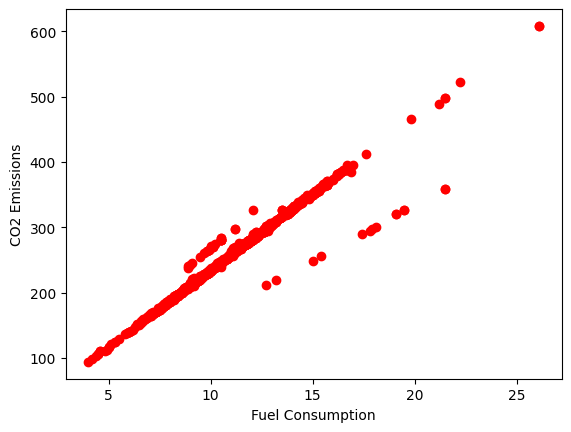

In [640]:
# Plot fitur Fuel Consumption dengan CO2 Emission
plt.scatter(df['Fuel Consumption'], df['CO2 Emissions'], color='red')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.show()

**ANALISIS**


Pada tahap ini saya menampilkan scatter plot  untuk menunjukkan hubungan antara Fuel Consumption dengan fitur co2 emissions dan didapatkan bahwa :
1. Grafik menunjukkan bahwa ada hubungan positif antara Fuel Consumption dan CO2 Emissions.
2. Semakin tinggi Fuel Consumption, semakin tinggi pula CO2 Emissions
3. Kendaraan dengan Fuel Consumption di atas 20 menghasilkan CO2 Emissions yang sangat tinggi (di atas 500 g/km).


# 3. SPLIT DATASET

# **Linear Regression Univariate**

In [641]:
# Memisahkan fitur dan target
X = df.drop(columns=['CO2 Emissions'])
y = df['CO2 Emissions']

**ANALISIS**
Karena study case ini untuk regresi maka di sini saya pisahkan dataset antara variabel independen dan variabel dependen

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**ANALISIS**

disini saya membagi dataset menjadi 2 metode yakni untuk data tes sebesar 30% dari dataset keseluruhan dan 70% sisanya untuk data train

In [643]:
print("Ukuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)

Ukuran Data Train: (668, 14)
Ukuran Data Test: (287, 14)


# 4. FEATURE ENGGINRENING

In [644]:
from sklearn.preprocessing import LabelEncoder

**A. ENCODING**

In [645]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Inisialisasi LabelEncoder untuk setiap kolom kategorikal
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    
    # Fit hanya dengan data dari X_train
    X_train[col] = le.fit_transform(X_train[col])
    
    # Buat mapping kategori -> angka
    classes = dict(zip(le.classes_, le.transform(le.classes_)))
    
    # Transform X_test dengan kategori yang dikenal, yang tidak dikenal jadi -1
    X_test[col] = X_test[col].map(lambda x: classes.get(x, -1))  # Gunakan -1 jika tidak dikenal
    
    # Simpan encoder untuk referensi
    label_encoders[col] = le  

# Cek hasil encoding
print("Contoh hasil encoding X_train:")
print(X_train.head())

print("\nContoh hasil encoding X_test:")
print(X_test.head())


Contoh hasil encoding X_train:
     Model Year  Make  Model  Vehicle Class  Engine Size  Cylinders  \
737        2022    31    231              6          3.8          6   
696        2022    29    239              8          3.0          6   
212        2022     9    449              6          5.3          8   
79         2022     4     74              2          4.4          8   
148        2022     8    103              0          2.7          4   

     Transmission  Fuel  Fuel Consumption City  Fuel Consumption Hwy  \
737            12     2                   13.7                  10.6   
696             3     3                   11.4                   9.3   
212             0     2                   16.8                  12.4   
79             11     3                   13.9                   9.6   
148             7     3                   12.0                   8.4   

     Fuel Consumption  Fuel Consumption Comb_mpg  CO2 Rating  Smog Rating  
737              12.3            

**ANALISIS**

Pada tahap pertama di feature enginering saya ini lakukan encoding pada fitur yang kategorik agar berubah menjadi numerik, untuk encoding ini saya menggunakan label encoder

**B. FEATURE SELECTION**

In [646]:
# Hitung korelasi antara fitur dan target
correlations = X_train.corrwith(y_train).abs()  # Menggunakan nilai absolut
high_corr_features = correlations[correlations > 0.3].index  # Ambil fitur dengan korelasi > 0.3

# Pastikan ada fitur yang memenuhi syarat
if len(high_corr_features) == 0:
    raise ValueError("Tidak ada fitur dengan korelasi tinggi terhadap target.")

# Simpan hasil seleksi langsung ke X_train dan X_test
X_train = X_train[high_corr_features]
X_test = X_test[high_corr_features]

# Menampilkan hasil seleksi fitur
print("Fitur terpilih berdasarkan korelasi:", list(high_corr_features))
print("\nX_train setelah encoding dan feature selection:")
print(X_train.head())
print("\nX_test setelah encoding dan feature selection:")
print(X_test.head())

Fitur terpilih berdasarkan korelasi: ['Engine Size', 'Cylinders', 'Transmission', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption', 'Fuel Consumption Comb_mpg', 'CO2 Rating', 'Smog Rating']

X_train setelah encoding dan feature selection:
     Engine Size  Cylinders  Transmission  Fuel Consumption City  \
737          3.8          6            12                   13.7   
696          3.0          6             3                   11.4   
212          5.3          8             0                   16.8   
79           4.4          8            11                   13.9   
148          2.7          4             7                   12.0   

     Fuel Consumption Hwy  Fuel Consumption  Fuel Consumption Comb_mpg  \
737                  10.6              12.3                         23   
696                   9.3              10.4                         27   
212                  12.4              14.8                         19   
79                    9.6            

C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


**ANALISIS**

Pada tahap ini saya melakukan feature selection dimana saya akan memilih dan menggunakan beberapa fitur yang memiliki korelasi tinggi saja terhadap target. Fitur yang di pilih haru memiliki korelasi yang lebih besar dari 0.3 dengan target. Berdasarkan output fitur yang lolos dari feature selection ini yakni Engine Size, Cylinders, Transmission, Fuel Consumption City, Fuel Consumption Hwy, Fuel Consumption, Fuel Consumption Comb_mpg,  CO2 Rating, Smog Rating

**C. HANDLING DUPLICATE DATA**

In [ ]:
# Hapus duplikasi di X_train dan sesuaikan y_train
X_train = X_train.drop_duplicates()
y_train = y_train.loc[X_train.index]  


**ANALISIS**

Pada tahap ini saya akan meghapus data yang duplikat 

**D. MENGECEK DATA OUTLIER**

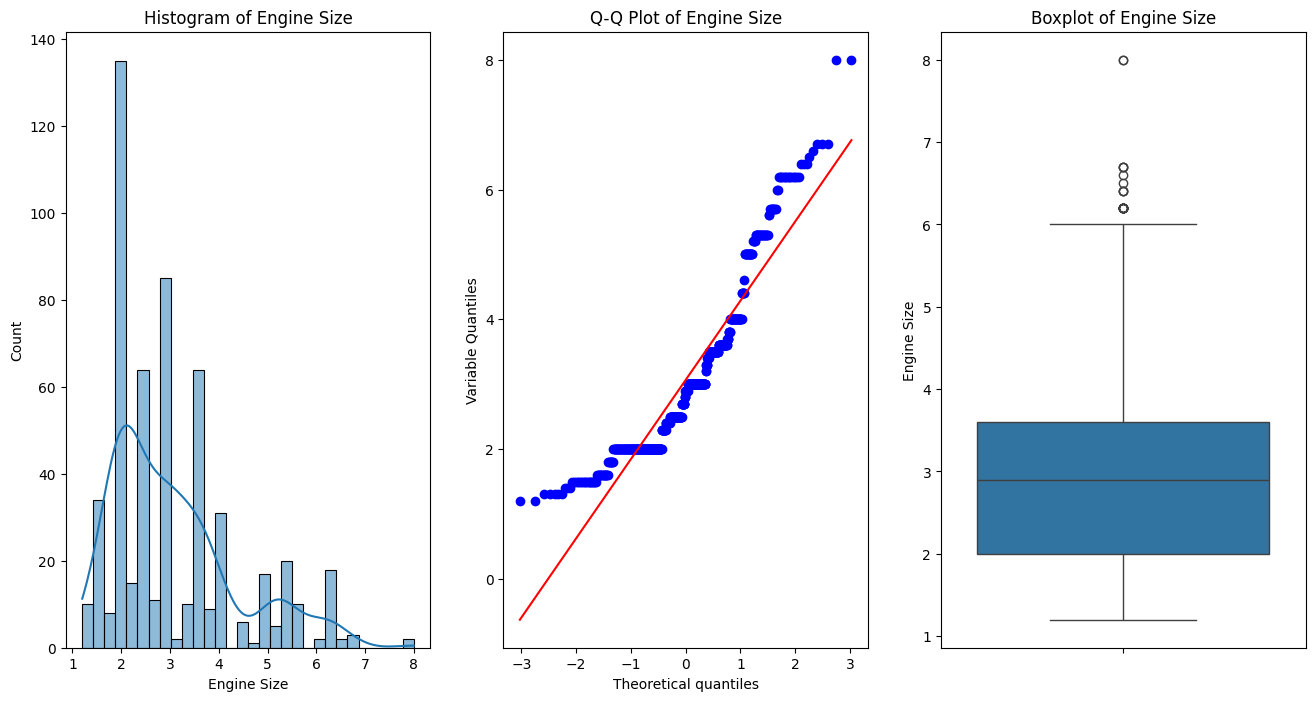

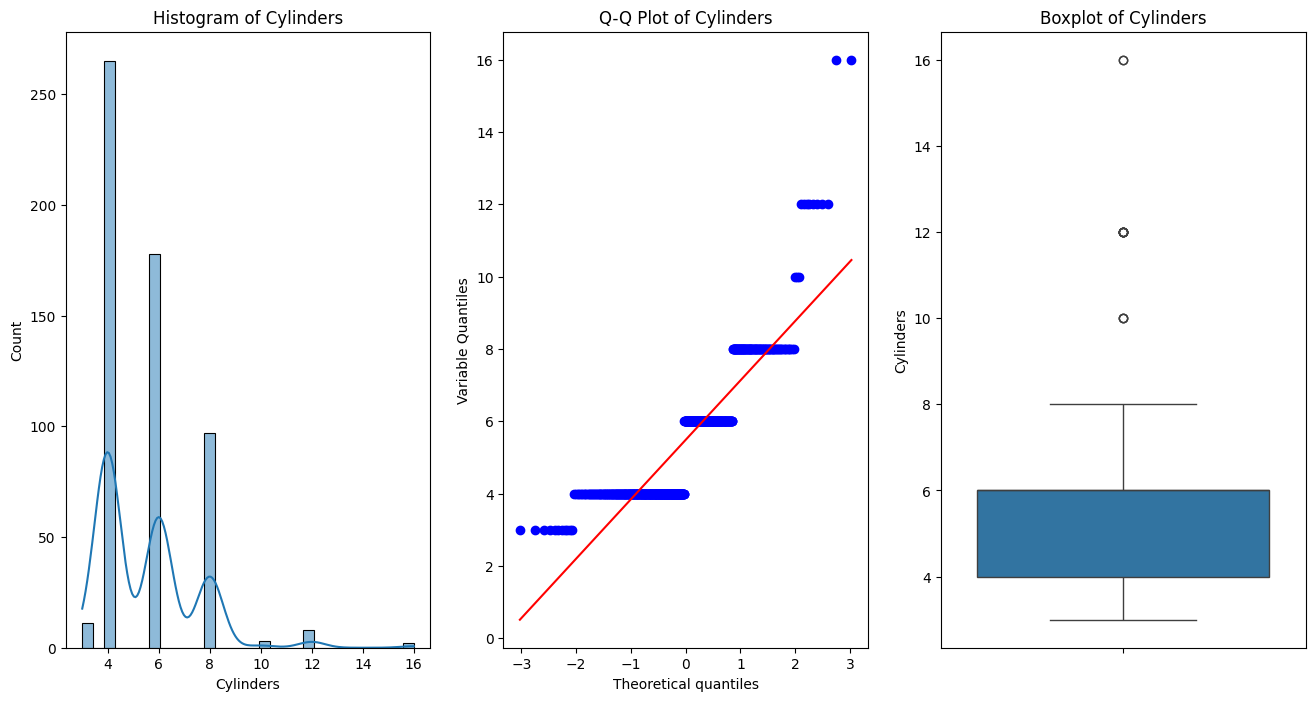

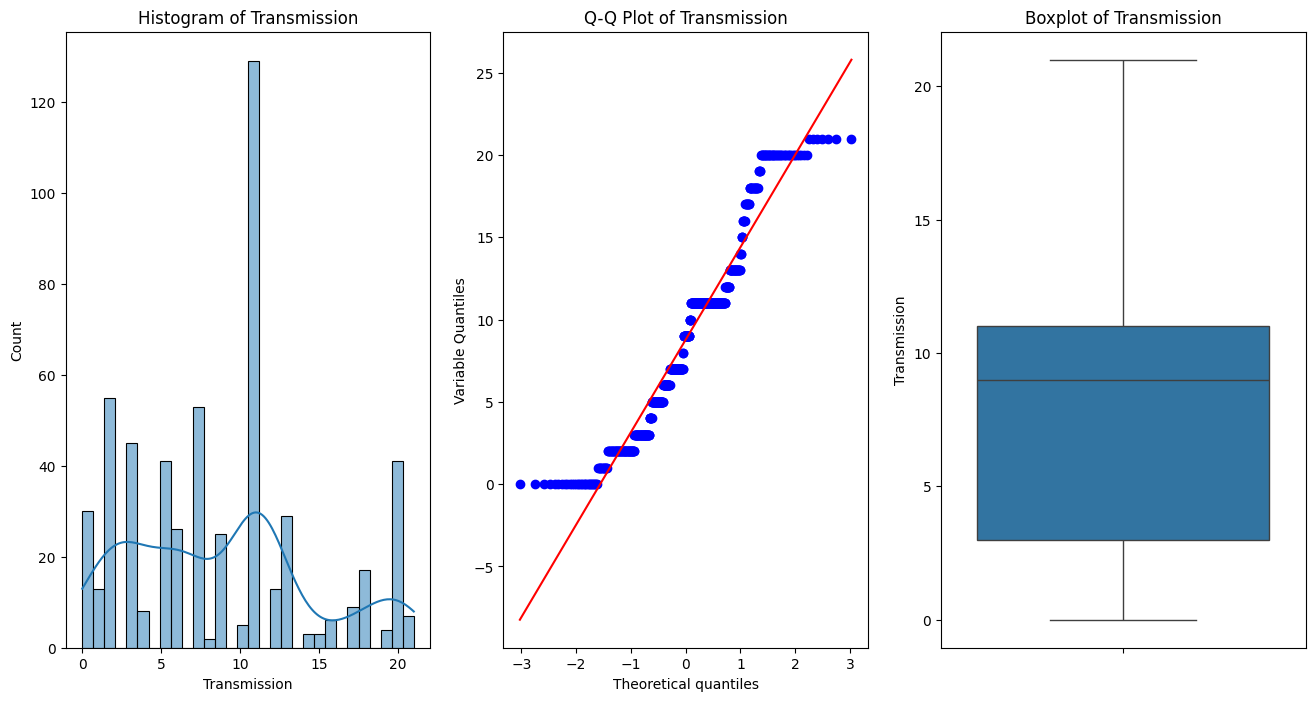

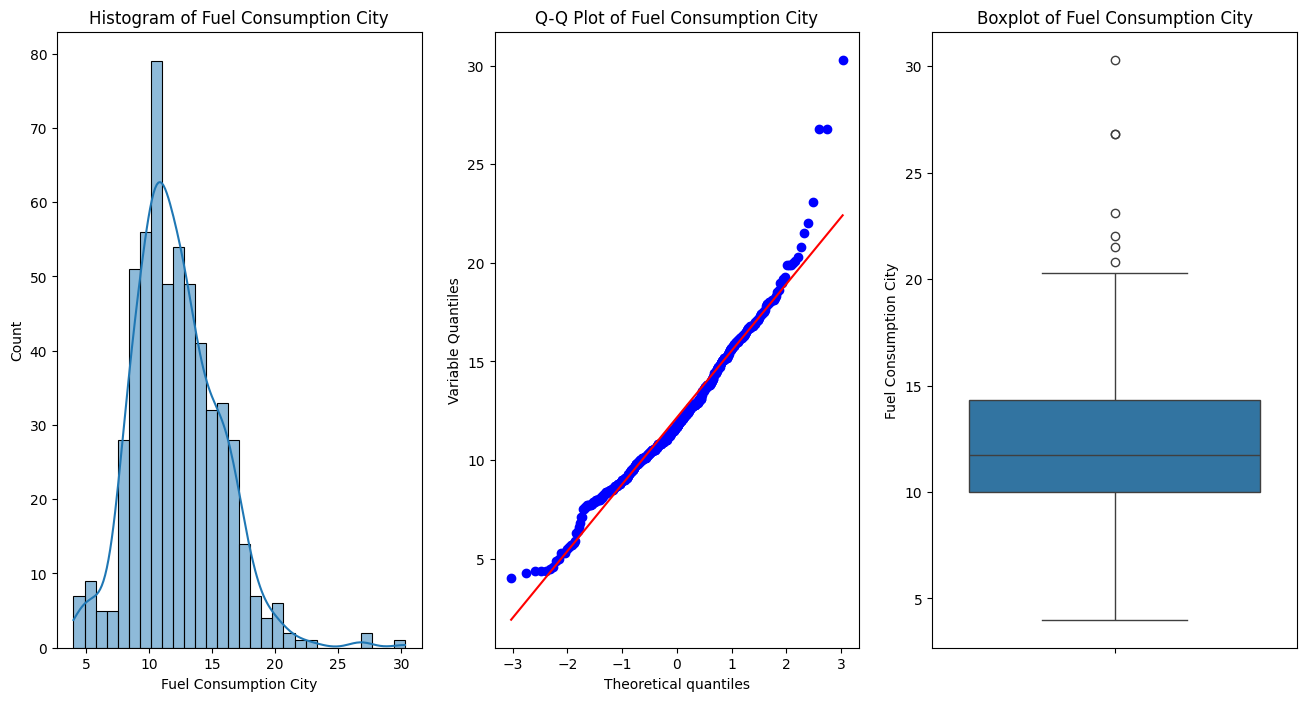

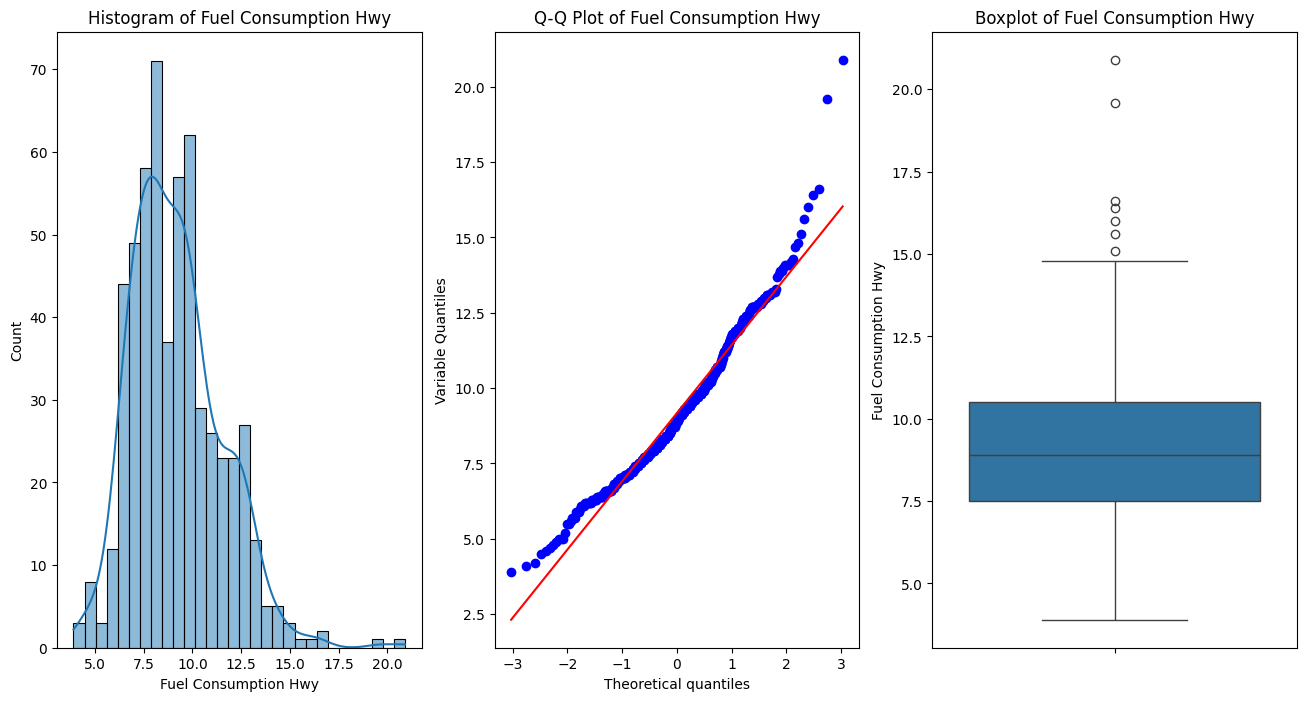

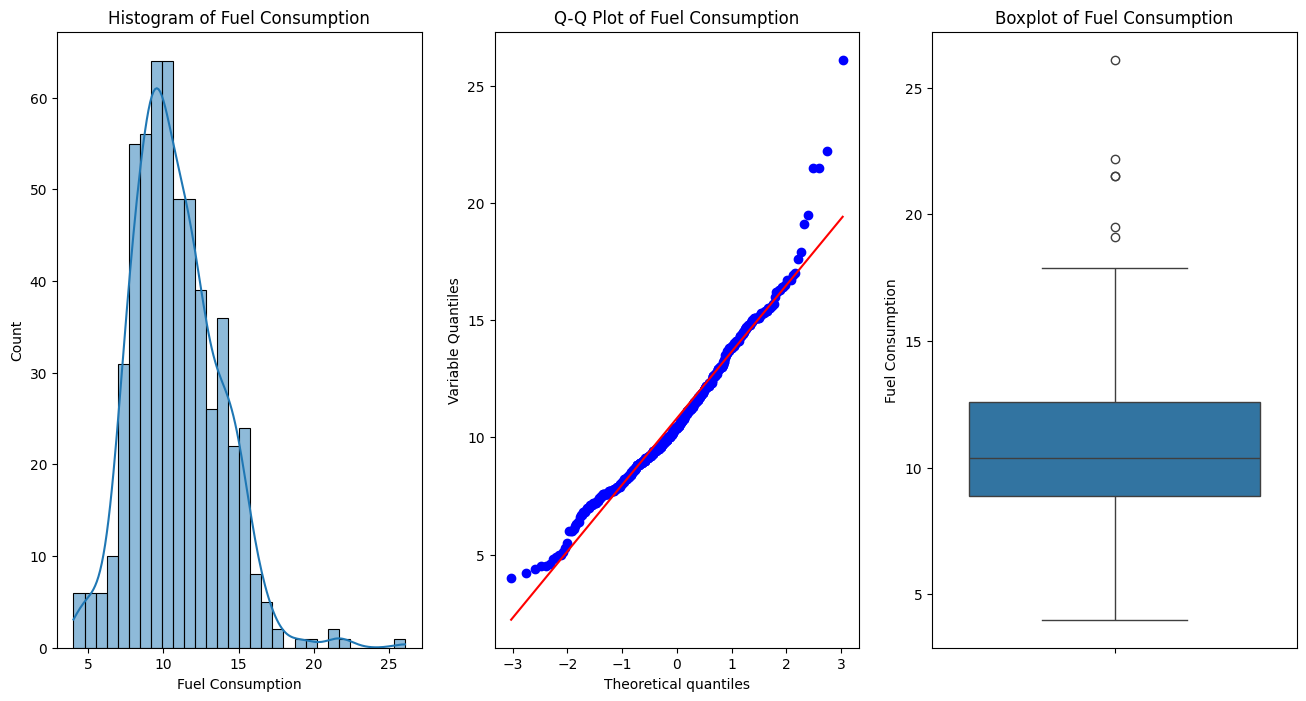

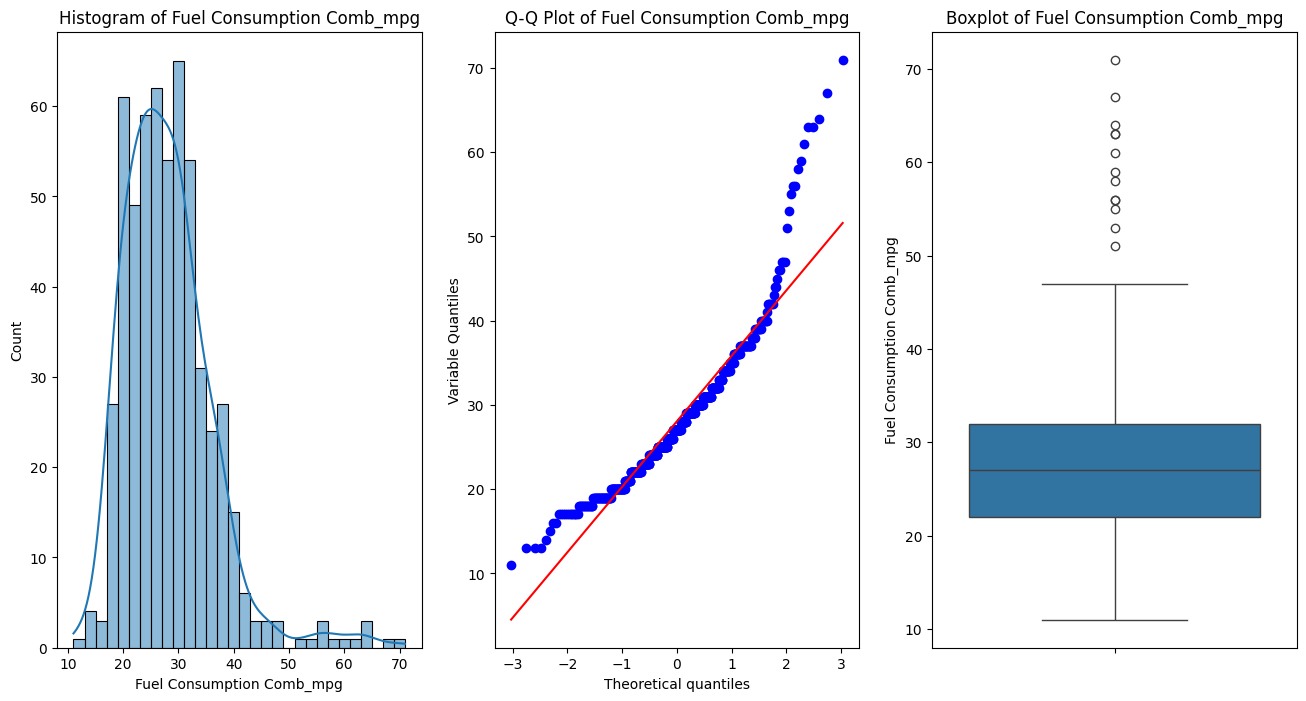

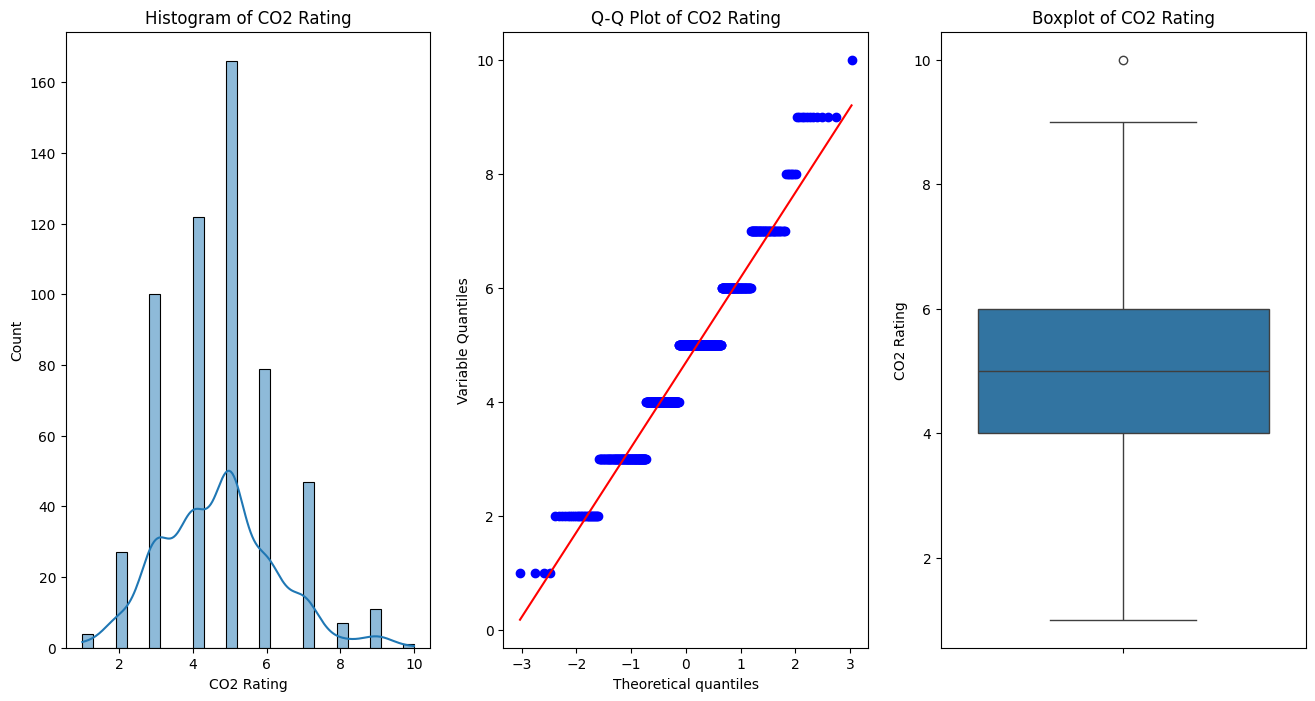

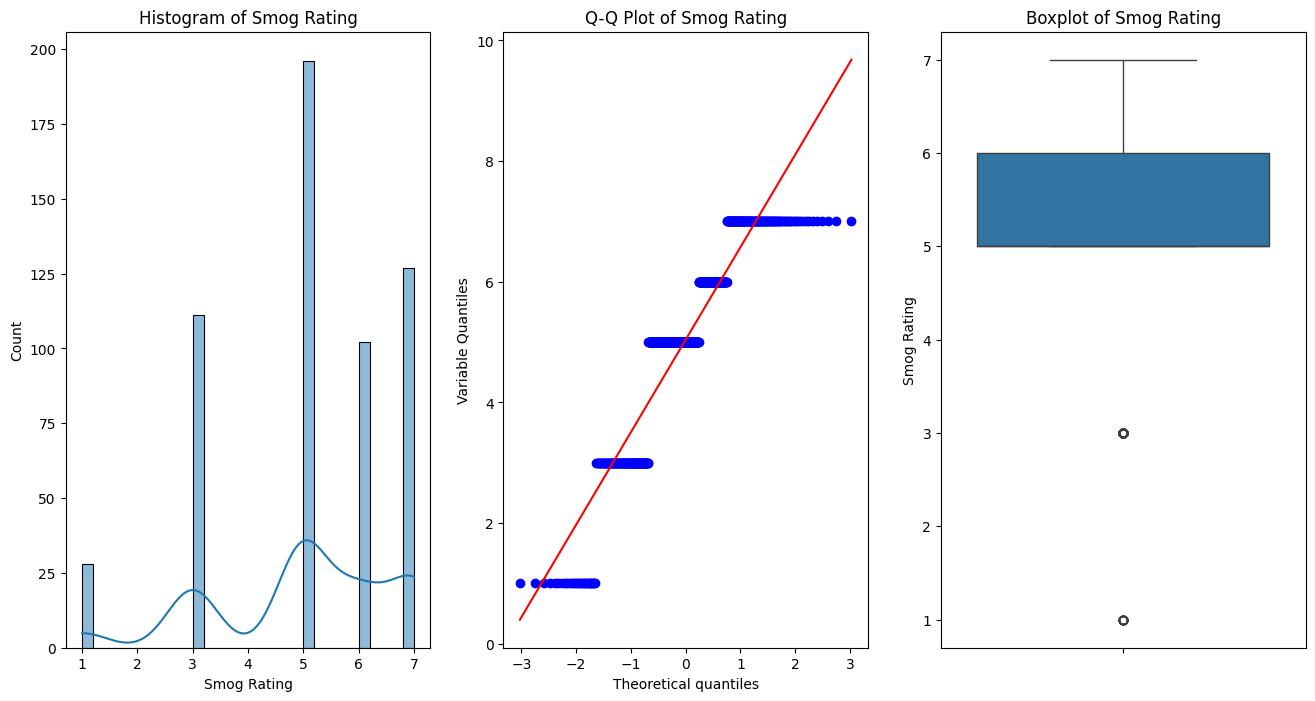

In [648]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def check_plot(df, variable):
    plt.figure(figsize=(16, 8))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f'Histogram of {variable}')

    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable Quantiles')
    plt.title(f'Q-Q Plot of {variable}')

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

# Pastikan hanya kolom numerik yang ada di X_train setelah duplikasi dihapus
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# Menampilkan grafik untuk setiap fitur numerik yang tersedia dalam X_train
for feature in numeric_cols:
    check_plot(X_train, feature)


**ANALISIS**

Pada tahap ini saya menampilkan data outlier pada setiap fitur yang telah lolos seleksi. Dapat di lihat bahwa fitur yangmemiliki data outlier yakni terdiri dari engine size, cylinders, fuel consumption city, fuel consumption city hwy,fuel consumption, fuel consumption comb_mpg, co2 rating dan smog rating


**HANDLING DATA OUTLIER**

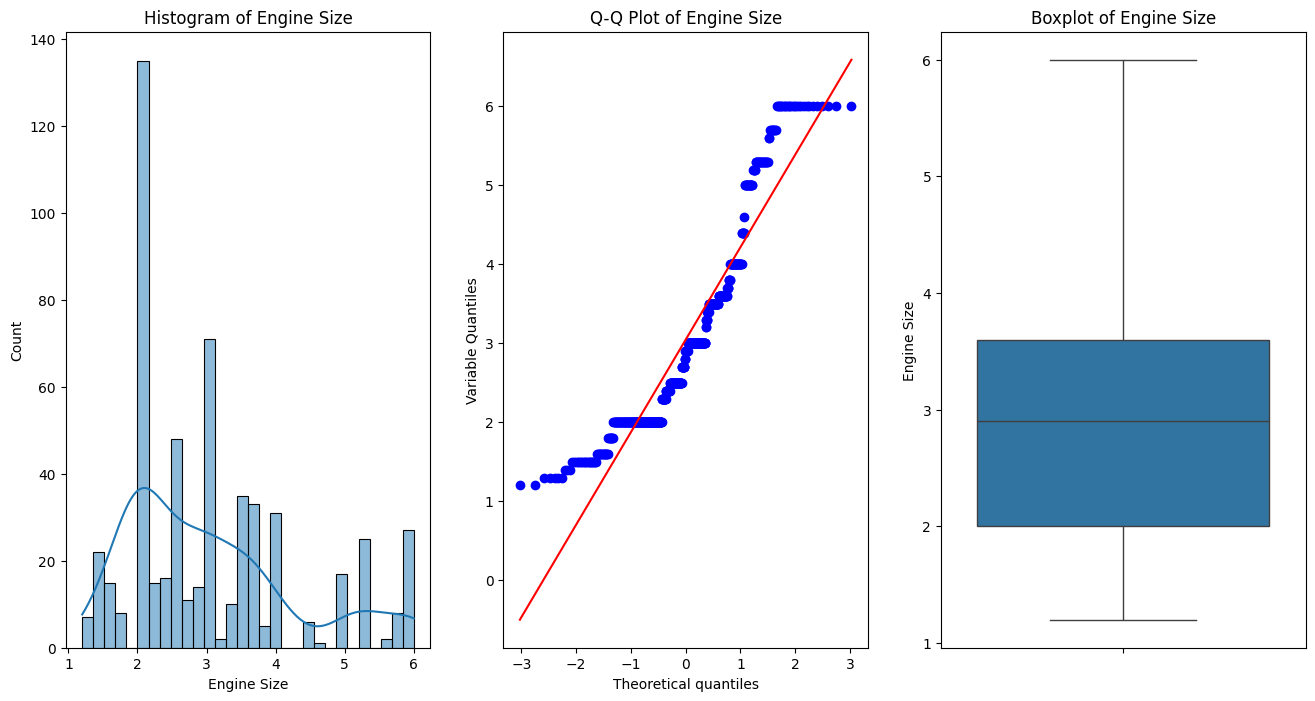

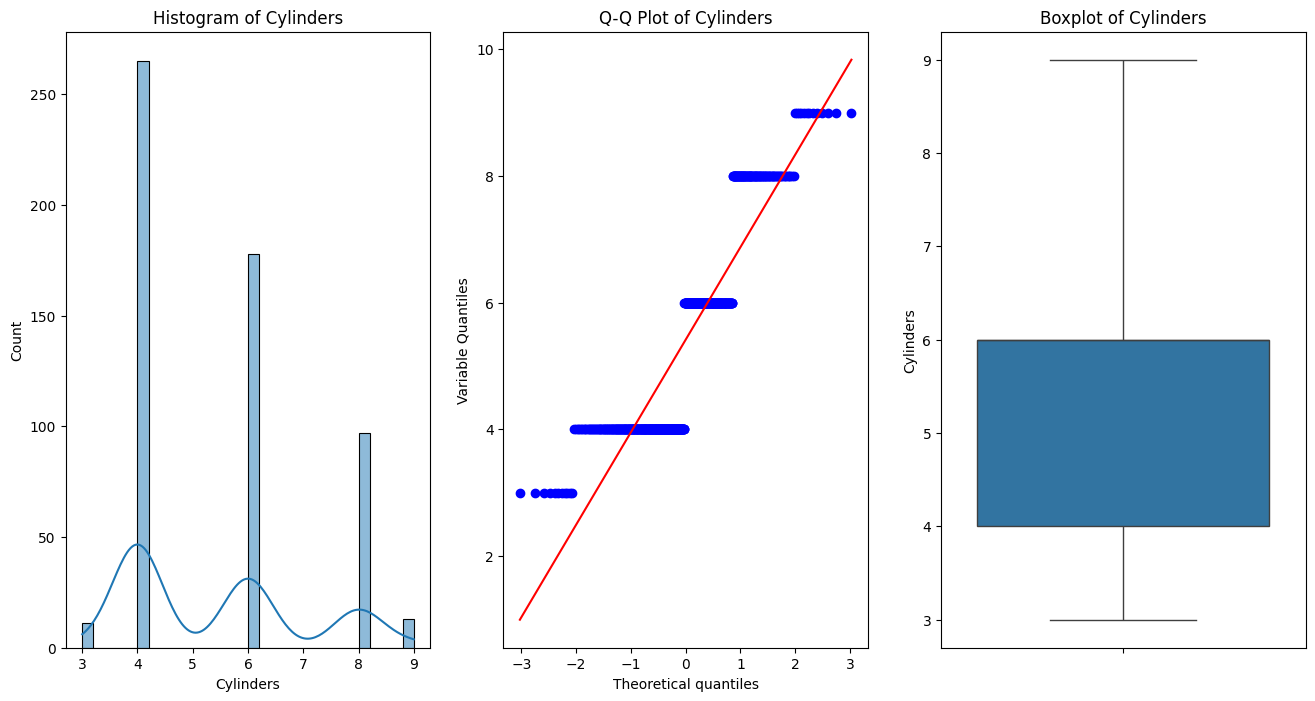

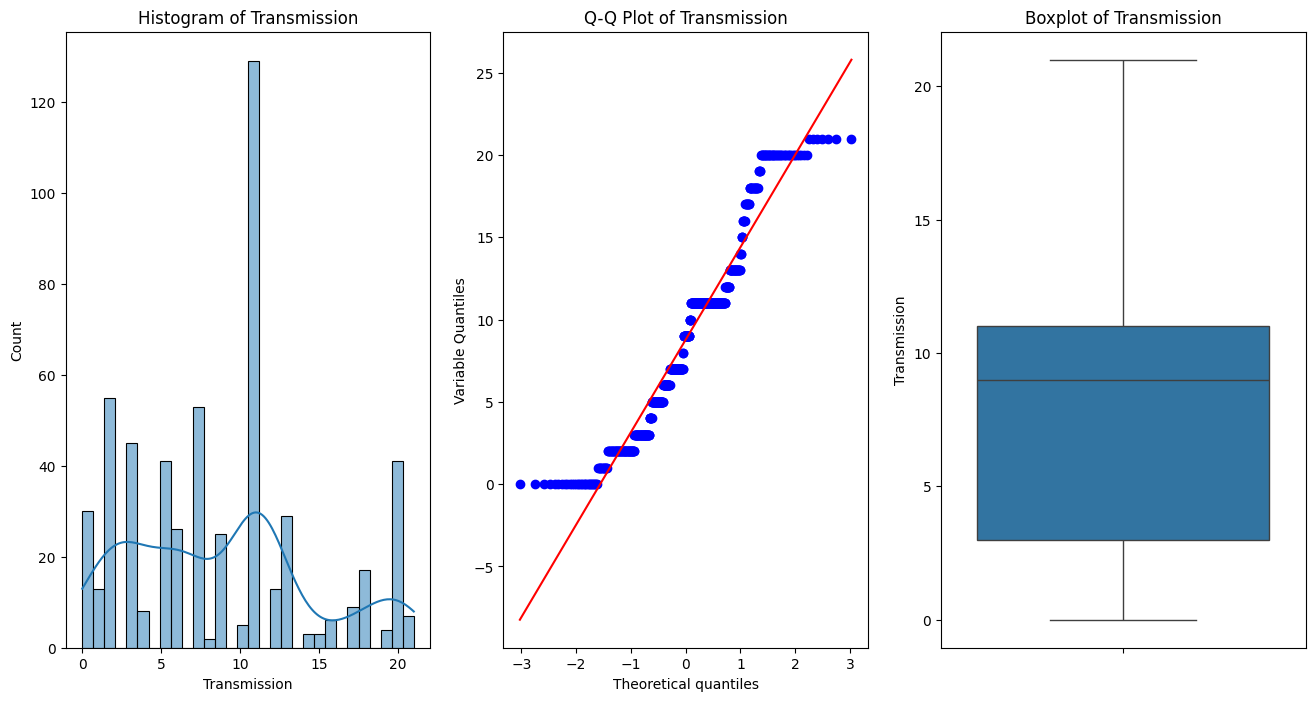

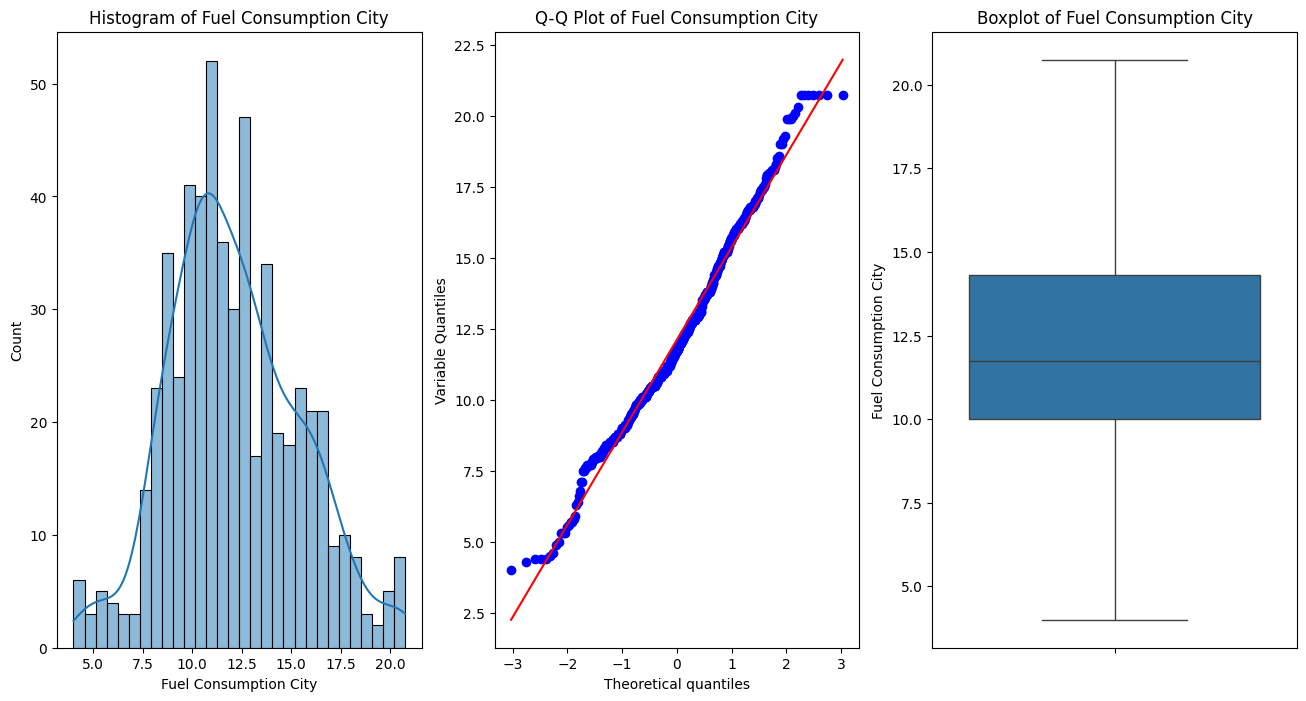

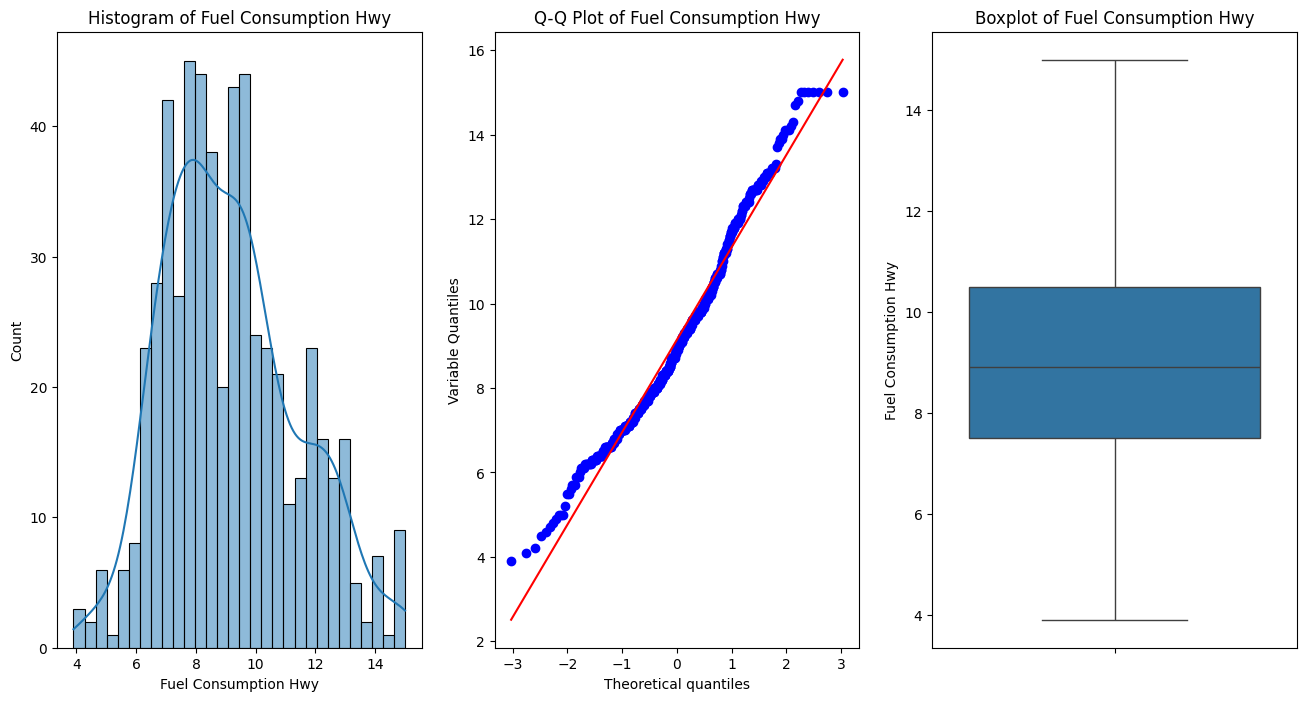

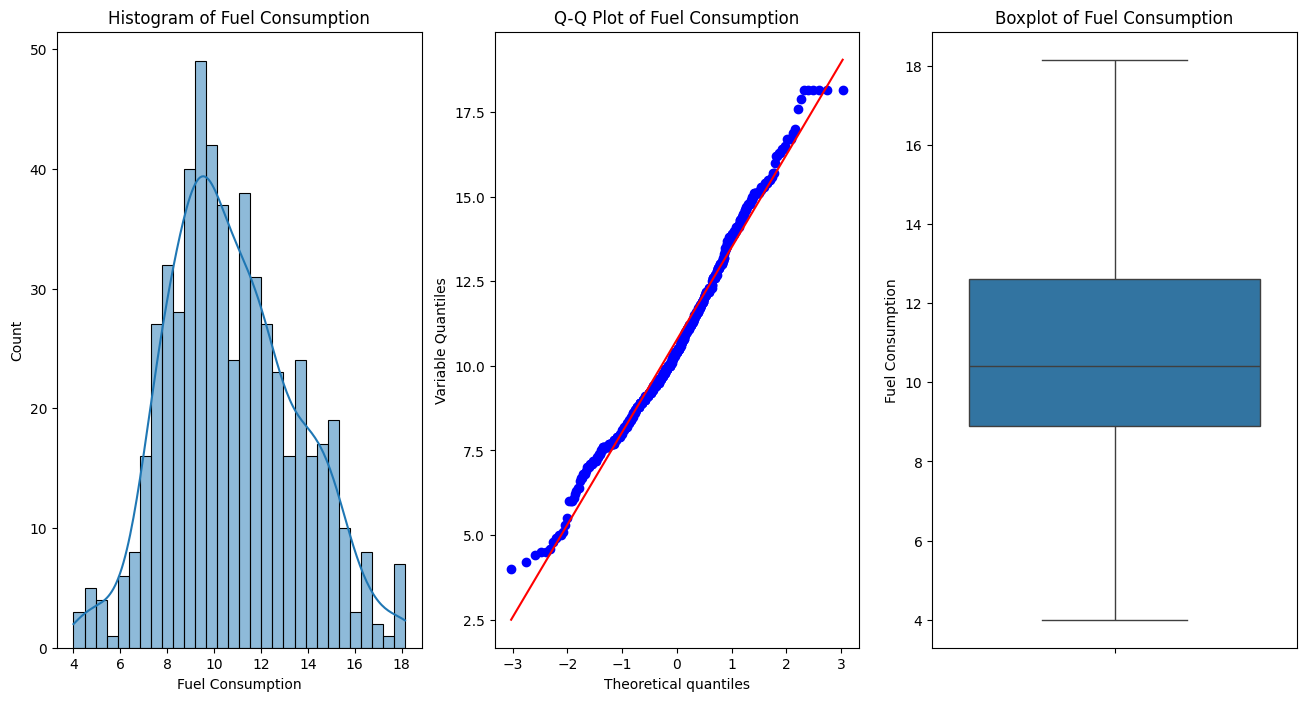

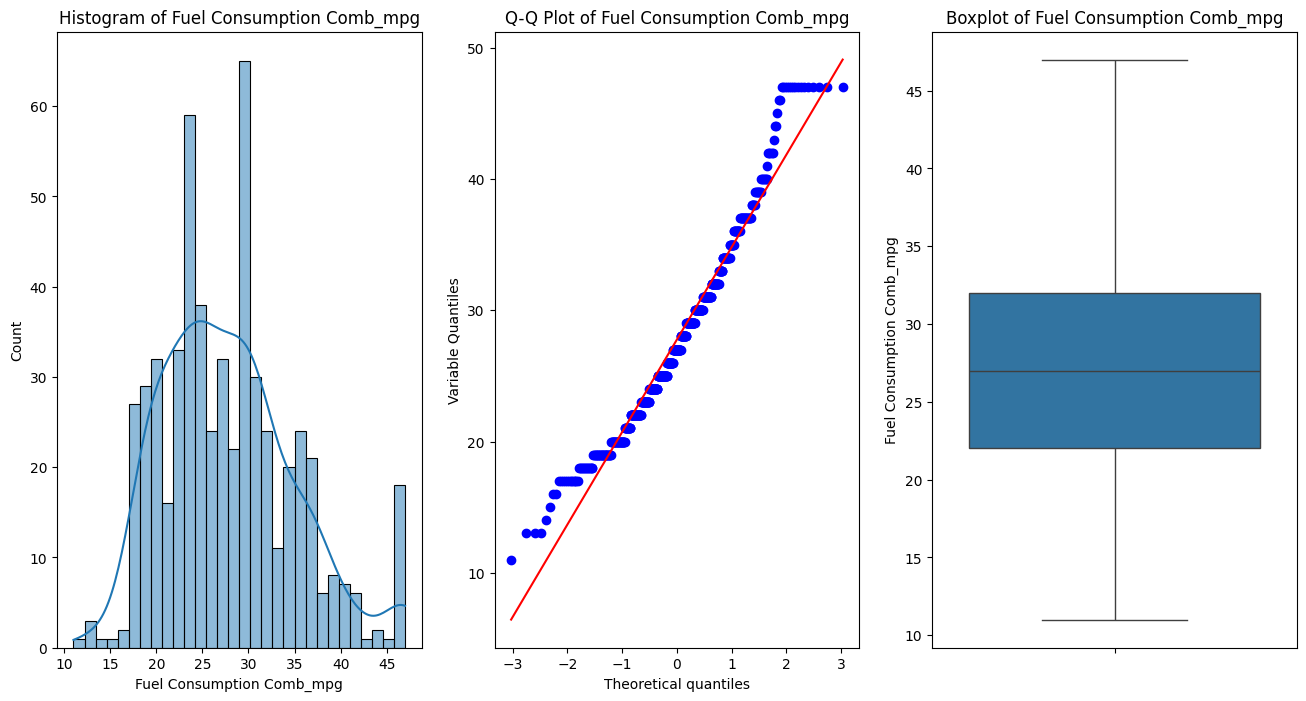

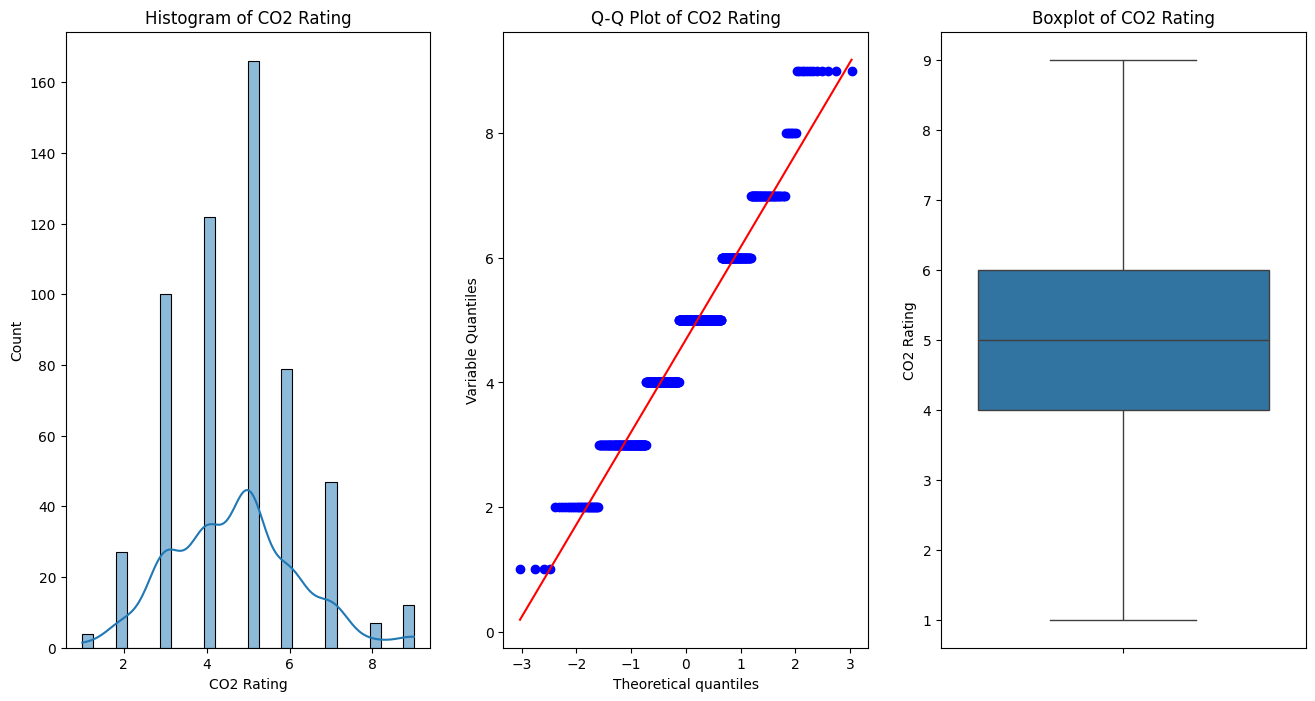

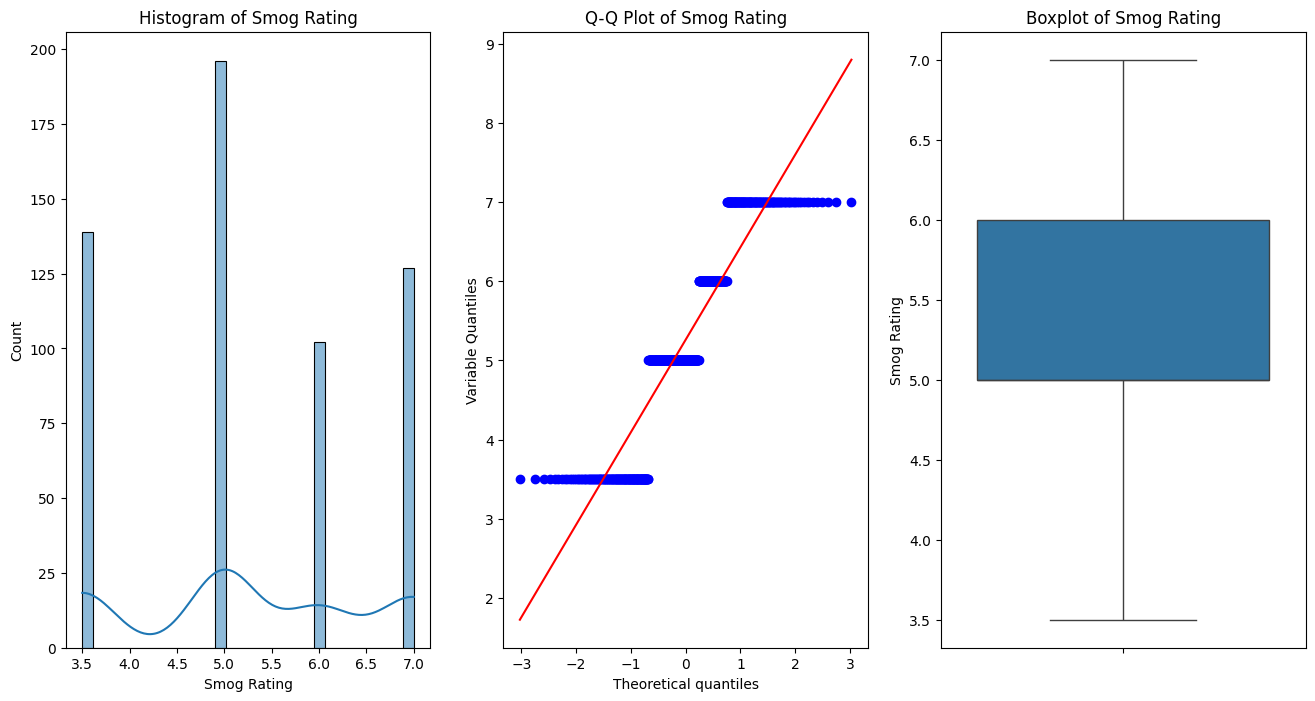

In [649]:
import numpy as np

def iqr_capping(df):
    """
    Menangani outlier dengan IQR Capping.
    Outlier di bawah Q1 - 1.5*IQR akan diganti dengan batas bawah.
    Outlier di atas Q3 + 1.5*IQR akan diganti dengan batas atas.
    """
    df_capped = df.copy()
    Q1 = df_capped.quantile(0.25)
    Q3 = df_capped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped = df_capped.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x))
    df_capped = df_capped.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x))

    return pd.DataFrame(df_capped, columns=df.columns)

# Terapkan IQR Capping ke X_train
X_train[numeric_cols] = iqr_capping(X_train[numeric_cols])

# Visualisasi ulang setelah IQR Capping
for feature in numeric_cols:
    check_plot(X_train, feature)


**ANALISIS**

Pada tahap ini saya menghandle data outlier pada setiap fitur yang telah lolos seleksi. Metode yang saya pakai yakni IQR capping. IQR capping ini menangani outlier tanpa menghapus data.
melainkan Outlier diubah menjadi batas bawah atau atas IQR. Dapat di lihat bahwa handling outlier ini berhasil dari fitur engine size, cylinders, fuel consumption city, fuel consumption city hwy,fuel consumption, fuel consumption comb_mpg, co2 rating dan smog rating yang awalnya memiliki outlier sudah terlihat tidak ada data outlier lagi

# 5. FEATURE SCALING

**Normalisasi dengan metode standar scaller**

In [650]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

**ANALISIS**

Berdasarkakn statistiks deskriptif memiliki nilai min dan nilia man yang sangat jauh yang menandakan memiliki skala nilai yang sangat jauh maka disini saya melakukan standarisasi menggunakan metode standar scaller  dimana metode ini akan merubah data agar memiliki mean sebesar 0 dan standard deviasi sebesar 1

**Menampilkan grafik setelah dan sebelum scalling**

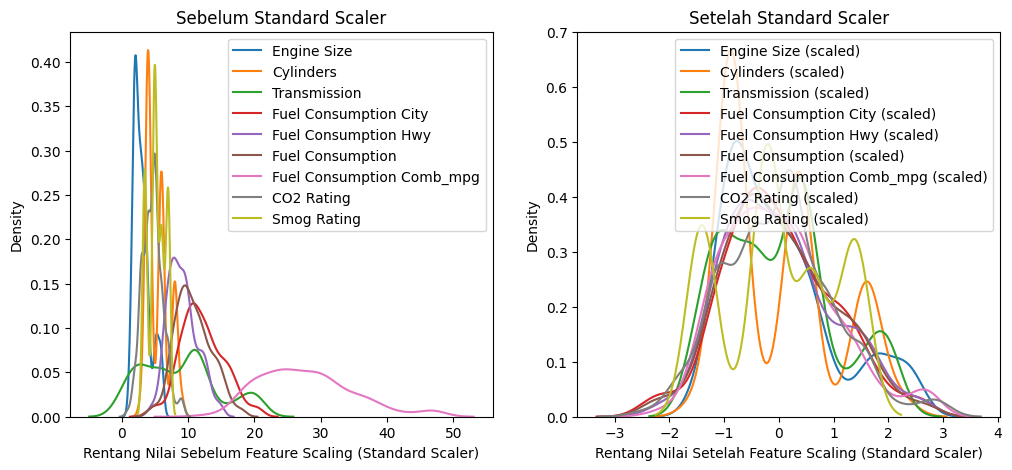

In [651]:
# Menampilkan grafik sebelum dan setelah normalisasi
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Sebelum Standard Scaler')
for col in numeric_cols:
    if col in X_train.columns:
        sns.kdeplot(X_train[col], ax=ax1, label=col)

ax2.set_title('Setelah Standard Scaler')
for col in numeric_cols:
    if col in X_train_scaled.columns:
        sns.kdeplot(X_train_scaled[col], ax=ax2, label=f'{col} (scaled)')

ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling (Standard Scaler)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling (Standard Scaler)')
ax1.legend()
ax2.legend()
plt.show()

**ANALISIS**

Disini saya menampilkan grafik setelah dan sebelum di scaling untuk melihat apakah terjadi perubahan tidak. Berdasarkan output didapatkan bahwa saat sebelum scaling Setiap fitur memiliki skala yang berbeda-beda dan setelah scalling Semua fitur kini berada dalam rentang yang seragam, sekitar -3 hingga 3


# 6. PEMODELAN REGRESI

# **LINIEAER REGRESION UNIVARIATE**

In [652]:
X_train_uni = X_train_scaled[['Fuel Consumption']]
X_test_uni = X_test_scaled[['Fuel Consumption']]

**ANALISIS**

Pada tahap ini saya memilih 1 fitur untuk melakukan melakukan regresi univariate. Fitur yang saya pilih yakni fitur fuel consumption

In [653]:
reg_model_uni = LinearRegression().fit(X_train_uni, y_train)

**ANALISIS**

Pada tahap ini saya melatih model regresi linier dengan menggunakan 1 fitur saja

In [654]:
print('Intercept: ', reg_model_uni.intercept_)
print('Coefficient: ', reg_model_uni.coef_[0])

Intercept:  253.03546099290782
Coefficient:  63.136941333495514


**ANALISIS**

Pada tahap ini saya menampilkan nilai intercept dan koefisien regresi dari model regresi linier yang telah di latih pada tahap sebelumnya didapatkan bahwa :
1. intercept : Ketika "Fuel Consumption" = 0, maka nilai prediksi y adalah 253.035.
2. koefisien 63.137 yang artinya Setiap kenaikan 1 satuan Fuel Consumption, nilai y akan meningkat sebesar 63.137. 

In [655]:
y_pred_uni = reg_model_uni.predict(X_test_uni).ravel() 

**ANALISIS**

Pada tahap ini melakukan prediksi menggunakan model regresi yang telah dilatih pada tahap sebelumnya

In [656]:
print('🔹 Mean Square Error (Univariate)      = ', skm.mean_squared_error(y_test, y_pred_uni))
print('🔹 Root Mean Square Error (Univariate) = ', math.sqrt(skm.mean_squared_error(y_test, y_pred_uni)))
print('🔹 Mean Absolute Error (Univariate)    = ', skm.mean_absolute_error(y_test, y_pred_uni))
print('🔹 R^2 (Univariate)                    = ', skm.r2_score(y_test, y_pred_uni))

🔹 Mean Square Error (Univariate)      =  304.15634886441217
🔹 Root Mean Square Error (Univariate) =  17.440078809008064
🔹 Mean Absolute Error (Univariate)    =  4.656614966402436
🔹 R^2 (Univariate)                    =  0.9125926089658906


**ANALISIS**

Disini saya akan menampilkan evaluasi dari performa model regresi univariat dan didapatkan bahwa :
1. Nilai MSE yang dihasilkan: 304.156
2. Nilai RMSE yang dihasilkan: 17.44 berarti rata-rata prediksi model meleset sekitar 17.44 satuan dari nilai aslinya
3. Nilai MAE yang dihasilkan: 4.656 (artinya, rata-rata prediksi meleset sekitar 4.656 satuan) Ini mengindikasikan bahwa model mampu menghasilkan prediksi yang cukup akurat.
4. Nilai R² yang dihasilkan: 0.9126 (artinya, model ini mampu menjelaskan 91.26% variabilitas data target dengan fitur "Fuel Consumption").

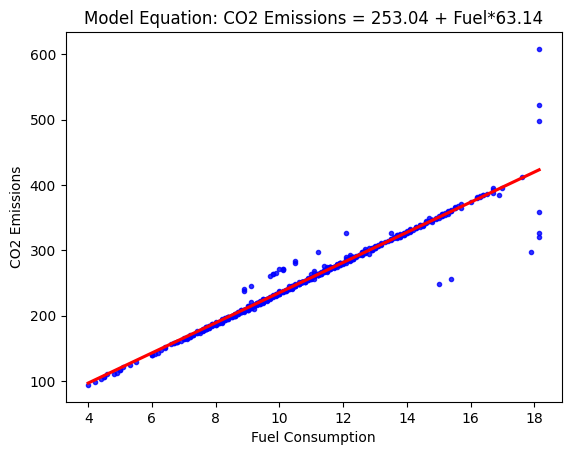

In [657]:
g = sns.regplot(x=X_train['Fuel Consumption'], y=y_train, scatter_kws={'color': 'b', 's':9},
                 ci=False, color='r')
g.set_title(f'Model Equation: CO2 Emissions = {round(reg_model_uni.intercept_, 2)} + Fuel*{round(reg_model_uni.coef_[0], 2)}')
g.set_ylabel('CO2 Emissions')
g.set_xlabel('Fuel Consumption')
plt.show()


**ANALISIS**

Disini saya menmapikan visualisasi untuk menampilkan hubungan fitur fuel consumotion dengan co2 emisisons. Titik-titik biru merepresentasikan data asli dari hubungan antara konsumsi bahan bakar dan emisi CO2 dan garis merah menunjukkan model regresi linear yang sudah dilatih, dengan persamaan CO2 Emissions = 253.04 + Fuel * 63.14. Terlihat bahwa titik-titik biru mengikuti pola garis merah, yang berarti model ini dapat memprediksi emisi CO2 berdasarkan konsumsi bahan bakar dengan cukup baik.

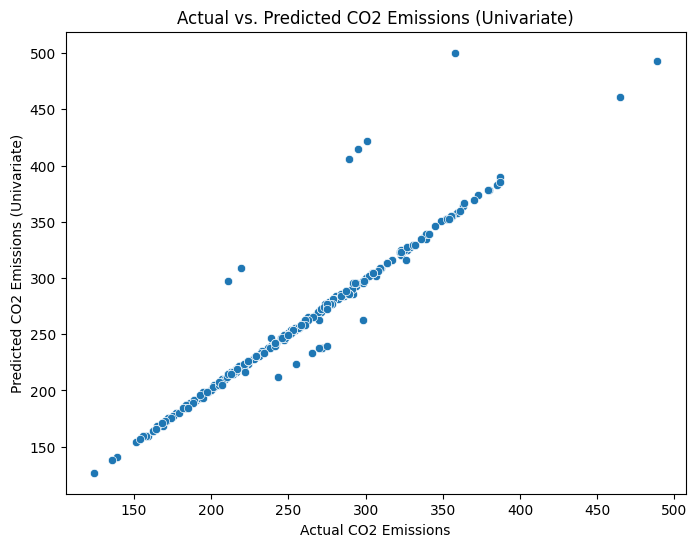

In [658]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.squeeze(), y=y_pred_uni)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions (Univariate)")
plt.title("Actual vs. Predicted CO2 Emissions (Univariate)")
plt.show()

**ANALISIS**


pada tahap ini saya menampilkan visualisasi untuk membandingkan nilai sebenarnya dari "CO2 Emissions" dengan nilai yang diprediksi oleh model regresi linear. Dan didapatkan bahwa sebagian besar titik berkumpul di sekitar garis diagonal, yang berarti model berhasil memprediksi emisi CO2 dengan cukup baik.

<Axes: xlabel='CO2 Emissions'>

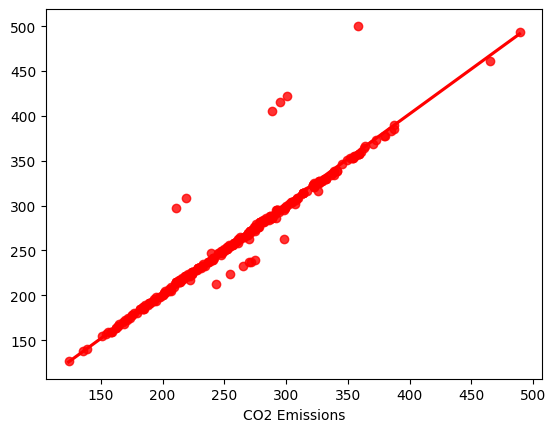

In [659]:
sns.regplot(x=y_test, y=y_pred_uni, ci=None, color="red")


**ANALISIS**

Pada tahap ini saya emnampilkan visualisasi untuk membandingkan nilai aktual emisi CO2 dengan nilai yang diprediksi oleh model regresi linear  dan didapatkan hasilnya yakni model regresi linear univariat cukup akurat dalam memprediksi emisi CO2, karena sebagian besar titik berada dekat dengan garis regresi

In [660]:
fuel = float(input('Fuel Consumption: '))
CO2_uni = reg_model_uni.intercept_ + reg_model_uni.coef_[0] * fuel  
print(f"Fuel Consumption: {fuel}")
print(f"Expected CO2 (Univariate): {CO2_uni}")

Fuel Consumption: 2.0
Expected CO2 (Univariate): 379.30934365989884


**ANALISIS**

Pada tahap ini saya akan memprediksi CO2 Emissions berdasarkan Fuel Consumption mengguanakan model regresi linear univariat yang telah dilatih sebelumnya. Disini user bisa memaukkan nilai fuel consumption sesuai yang di inginkan. Dan didapatkan hasilnya yakni Jika konsumsi bahan bakar = 2.0 liter, maka model memprediksi emisi CO2 sebesar 379.31 g/km.

# **LINIEAR REGRESSION MULTIVARIATE**

In [661]:
reg_model_multi = LinearRegression().fit(X_train_scaled, y_train)
print('Intercept: ', reg_model_multi.intercept_)
print('Coefficients: ', reg_model_multi.coef_) 

Intercept:  253.03546099290782
Coefficients:  [  2.90495652   0.60196351  -0.70289442   7.45650592   8.36982593
  27.74388074   9.01486111 -25.95871414  -1.87843333]


**ANALISIS**

Pada tahap ini saya melatih model regresi linier multivariat yang memprediksi emisi CO2 berdasarkan beberapa variabel input (fitur). Didapatakan hasilnya yakni :
1. intercept 253.03546099290782 :  jika semua fitur bernilai nol, maka emisi CO2 yang diprediksi adalah 253.04
2. koefisien regresi :
a. 2.90 : Jika fitur pertama meningkat 1 satuan, maka emisi CO2 bertambah 2.90 satuan.

b. -0.70 :  Jika fitur ketiga meningkat 1 satuan, maka emisi CO2 berkurang 0.70 satuan.

c. 27.74 :  Fitur keenam memiliki pengaruh terbesar terhadap emisi CO2.

d. -25.96 :  Fitur kedelapan memiliki pengaruh negatif yang besar, artinya jika meningkat, emisi CO2 berkurang.



In [662]:
y_pred_multi = reg_model_multi.predict(X_test_scaled).ravel() 

**ANALISIS**

tahahp ini akan memprediksi emisi CO2 menggunakan model regresi linear multivariat yang telah dilatih sebelumnya.

In [663]:
print('🔹 Mean Square Error (Multivariate)      = ', skm.mean_squared_error(y_test, y_pred_multi))
print('🔹 Root Mean Square Error (Multivariate) = ', math.sqrt(skm.mean_squared_error(y_test, y_pred_multi)))
print('🔹 Mean Absolute Error (Multivariate)    = ', skm.mean_absolute_error(y_test, y_pred_multi))
print('🔹 R^2 (Multivariate)                    = ', skm.r2_score(y_test, y_pred_multi))

🔹 Mean Square Error (Multivariate)      =  166.89020347622557
🔹 Root Mean Square Error (Multivariate) =  12.918599129790566
🔹 Mean Absolute Error (Multivariate)    =  6.875263083058793
🔹 R^2 (Multivariate)                    =  0.952039675221406


**ANALISIS**

Pada tahap ini saya mengevaluasi dari model egresi linear multivariat. Dan didapatkan yakni :
1. nilai MSE 166.8902 : Model cukup baik karena errornya kecil.
2. RMSE 12.9186 :  Menunjukkan bahwa rata-rata error model adalah sekitar 12.9 satuan.
3. MAE 6.8752 : Artinya rata-rata perbedaan antara prediksi dan nilai sebenarnya adalah sekitar 6.87 satuan CO2.
4. R square  : 0.9520 → Model dapat menjelaskan 95.2% variasi dalam data, yang berarti model sangat baik.

Dapat disimpulkan bahwa model regresi multivariat menunjukkan performa yang cukup baik karena nilai MSE ini lebih rendah dibandingkan dengan nilai MSE pada univariate namun di ultivariate mae naik menjadi 6.8


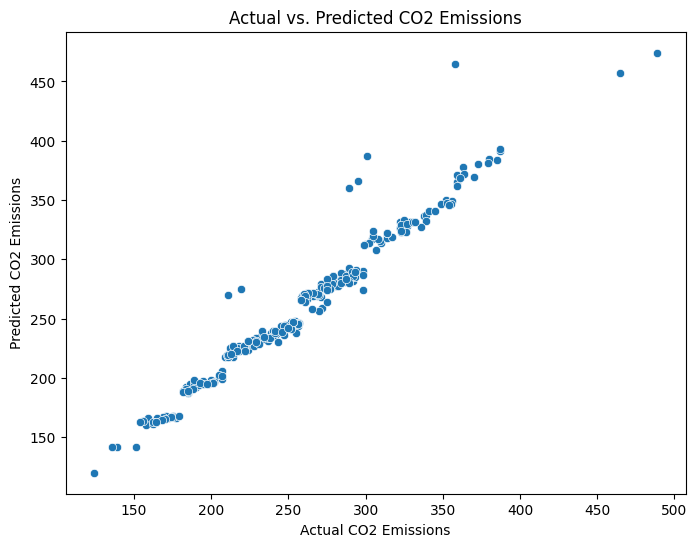

In [664]:
plt.figure(figsize=(8, 6))  # Ukuran gambar
# Jika y_test adalah Series, akses langsung
sns.scatterplot(x=y_test, y=y_pred_multi)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.show()



**ANALISIS**

Pada tahap ini saya menamapilkan visualisasi scatter plot untuk  membandingkan nilai aktual dengan nilai prediksi  dari model regresi multivariat. Dan didapatkakn bahwa pola titik menunjukkan hubungan yang kuat dan linear antara nilai aktual dan prediksi.

<Axes: xlabel='CO2 Emissions'>

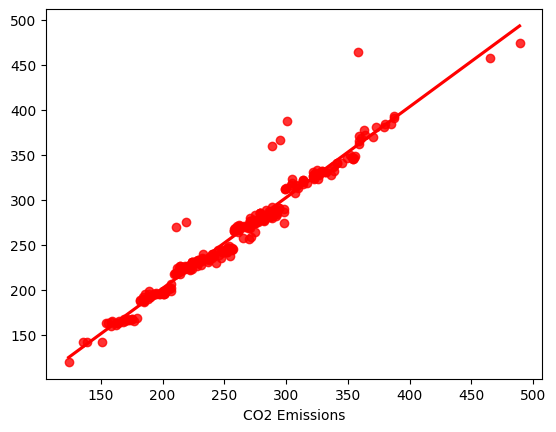

In [665]:

# Regression Line
sns.regplot(x=y_test, y=y_pred_multi, ci=None, color="red")

**ANALISIS**

Pada tahap ini saya menmapilkan visualisasi scatterplot untuk menampilkan plot regresi antara nilai aktual  dan nilai prediksi. Dan didapatkan bahwa Sebagian besar titik berada di sekitar garis, yang berarti model dapat memprediksi CO2 Emissions dengan cukup baik.Namun, ada beberapa titik yang jauh dari garis , yang menunjukkan bahwa model masih memiliki kesalahan prediksi untuk beberapa data.


In [666]:
# Nilai koefisien berdasarkan hasil regresi linear
intercept = 253.03546099290782
coefficients = [2.90495652, 0.60196351, -0.70289442, 7.45650592, 
                8.36982593 , 27.74388074, 9.01486111, -25.95871414, -1.87843333]

# Memasukkan nilai fitur dari pengguna
fuel_city = float(input('Fuel Consumption City: '))
fuel_hwy = float(input('Fuel Consumption Hwy: '))
fuel = float(input('Fuel Consumption: '))
fuel_comb_mpg = float(input('Fuel Consumption Comb_mpg: '))
co2_rating = float(input('CO2 Rating: '))

# Menghitung CO₂ Emissions secara manual
CO2 = (intercept + 
       coefficients[0] * fuel_city + 
       coefficients[1] * fuel_hwy + 
       coefficients[2] * fuel + 
       coefficients[3] * fuel_comb_mpg + 
       coefficients[4] * co2_rating)

# Menampilkan hasil perhitungan
print(f"\n🔥 Hasil Prediksi CO₂ Emissions 🔥")
print(f"Fuel Consumption City: {fuel_city}")
print(f"Fuel Consumption Hwy: {fuel_hwy}")
print(f"Fuel Consumption: {fuel}")
print(f"Fuel Consumption Comb_mpg: {fuel_comb_mpg}")
print(f"CO₂ Rating: {co2_rating}")
print(f"➡️ Expected CO₂ Emissions: {CO2:.2f}")



🔥 Hasil Prediksi CO₂ Emissions 🔥
Fuel Consumption City: 2.0
Fuel Consumption Hwy: 2.0
Fuel Consumption: 2.0
Fuel Consumption Comb_mpg: 2.0
CO₂ Rating: 2.0
➡️ Expected CO₂ Emissions: 290.30


**ANALISIS**

Pada tahap ini saya akan memprediksi regresi linier multivariate berdasarkan beberapa variabel fitur. Berdasarkan output didapatkan bahwa didapatkan nilai co 2 emissions sebesar  290.30.  Hasil perhitungan menunjukkan bahwa emisi CO₂ dipengaruhi secara signifikan oleh fitur-fitur tersebut. Hasil akhir (290.30) bisa berubah tergantung pada nilai input yang diberikan oleh user

# **KESIMPULAN PROGRAM REGRESI UNIVARIATE DAN MULTIVARIATE**

1. Akurasi Model (R² Score) : Regresi Multivariate lebih baik, dengan R² = 0.9520 dibandingkan dengan 0.9126 pada univariate. Ini menunjukkan bahwa regresi multivariate dapat menjelaskan variasi emisi CO2 dengan lebih baik dibandingkan model univariate.
2. Kesalahan Model (MSE & RMSE) : Regresi Multivariate memiliki kesalahan yang lebih kecil (MSE = 166.89 dan RMSE = 12.92) dibandingkan dengan regresi univariate (MSE = 304.16 dan RMSE = 17.44). Ini berarti prediksi regresi multivariate lebih akurat dalam menghitung emisi CO2 dibandingkan regresi univariate.
3. Mean Absolute Error (MAE) : Univariate lebih baik dalam MAE (4.66 vs. 6.88), menunjukkan bahwa secara rata-rata kesalahan prediksi individu lebih kecil.
4. Pada regresi multivariate, hubungan antara nilai aktual dan prediksi lebih kuat, tetapi ada beberapa titik yang jauh dari garis regresi, menunjukkan bahwa ada beberapa kasus yang masih sulit diprediksi dengan baik.

**DAPAT DI SIMPULKAN BAHWA**

Regresi Multivariate lebih baik dibandingkan Univariate, karena memiliki nilai R² yang lebih tinggi dan kesalahan yang lebih rendah (MSE & RMSE lebih kecil).

# **WEEK 4 KLASIFIKASI DATA HEPATITIS IMBALANCE DATASET**

In [667]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# 1. EDA

In [668]:
dataset = pd.read_csv('hepatitis.csv')
dataset.head()

Class  AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  \
0      0   30    2      1.0           2        2        2         2   
1      0   50    1      1.0           2        1        2         2   
2      0   78    1      2.0           2        1        2         2   
3      0   31    1      NaN           1        2        2         2   
4      0   34    1      2.0           2        2        2         2   

   LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCITES  VARICES  \
0        1.0         2.0              2.0      2.0      2.0      2.0   
1        1.0         2.0              2.0      2.0      2.0      2.0   
2        2.0         2.0              2.0      2.0      2.0      2.0   
3        2.0         2.0              2.0      2.0      2.0      2.0   
4        2.0         2.0              2.0      2.0      2.0      2.0   

   BILIRUBIN  ALK PHOSPHATE   SGOT  ALBUMIN  PROTIME  HISTOLOGY  
0        1.0           85.0   18.0      4.0      NaN          1  
1        0.9          135.0   42.0      3.5      NaN          1  
2        0.7           96.0   32.0      4.0      NaN          1  
3        0.7           46.0   52.0      4.0     80.0          1  
4        1.0            NaN  200.0      4.0      NaN          1

In [669]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(dataset.describe())


Statistik deskriptif:
            Class         AGE         SEX     STEROID  ANTIVIRALS     FATIGUE  \
count  154.000000  154.000000  154.000000  153.000000  154.000000  154.000000   
mean     0.207792   41.246753    1.103896    1.509804    1.844156    1.350649   
std      0.407051   12.593344    0.306121    0.501546    0.363891    0.478730   
min      0.000000    7.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000   32.000000    1.000000    1.000000    2.000000    1.000000   
50%      0.000000   39.000000    1.000000    2.000000    2.000000    1.000000   
75%      0.000000   50.000000    1.000000    2.000000    2.000000    2.000000   
max      1.000000   78.000000    2.000000    2.000000    2.000000    2.000000   

          MALAISE    ANOREXIA   LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  \
count  154.000000  154.000000  145.000000  144.000000        150.00000   
mean     1.603896    1.792208    1.827586    1.583333          1.80000   
std      0.490682    0.40

**ANALISIS**

Pada tahap ini saya menampilkan statistic deskripstif dan didapatkan bahwa :
1. Class memiliki rata-rata 0.2077, yang menunjukkan bahwa mayoritas pasien dalam dataset ini tidak terdiagnosis dengan penyakit hati
2. AGE (Usia pasien) memiliki rata-rata 41.25 tahun dengan standar deviasi 12.59, yang berarti ada variasi usia yang cukup besar dalam dataset. Usia termuda adalah 7 tahun, sedangkan yang tertua adalah 78 tahun.
3. SEX (Jenis kelamin) memiliki rata-rata 1.10, yang mengindikasikan bahwa mayoritas pasien adalah laki-laki
4. STEROID (Penggunaan steroid) memiliki rata-rata 1.50, menunjukkan bahwa sebagian besar pasien terbagi hampir rata antara pengguna dan non-pengguna steroid.
5. ANTIVIRALS (Penggunaan antivirus) memiliki rata-rata 1.84, yang menunjukkan bahwa sebagian besar pasien menggunakan antivirus.
6. FATIGUE (Kelelahan) memiliki rata-rata 1.35, dengan standar deviasi 0.47, menunjukkan bahwa mayoritas pasien mengalami kelelahan
7. MALAISE (Malaise - rasa tidak nyaman atau sakit secara umum) memiliki rata-rata 1.60, yang menunjukkan bahwa sebagian besar pasien mengalami gejala ini.
8. LIVER BIG (Pembesaran hati) memiliki rata-rata 1.82, dengan standar deviasi 0.37, menunjukkan bahwa sebagian besar pasien mengalami pembesaran hati.
9. SPLEEN PALPABLE (Limpa teraba membesar) memiliki rata-rata 1.80, menunjukkan bahwa banyak pasien mengalami pembesaran limpa
10. BILIRUBIN (Kadar bilirubin dalam darah) memiliki rata-rata 1.42, dengan nilai minimum 0.3 dan maksimum 8.0, yang menunjukkan adanya beberapa pasien dengan kadar bilirubin tinggi
11. ALK PHOSPHATE (Enzim hati) memiliki rata-rata 105.32, tetapi memiliki variasi yang cukup besar dengan standar deviasi 79.56, menunjukkan bahwa beberapa pasien memiliki kadar enzim hati yang jauh lebih tinggi dari yang lain.


In [670]:
print("\nInformasi dataset:")
print(dataset.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    int64  
 1   AGE              154 non-null    int64  
 2   SEX              154 non-null    int64  
 3   STEROID          153 non-null    float64
 4   ANTIVIRALS       154 non-null    int64  
 5   FATIGUE          154 non-null    int64  
 6   MALAISE          154 non-null    int64  
 7   ANOREXIA         154 non-null    int64  
 8   LIVER BIG        145 non-null    float64
 9   LIVER FIRM       144 non-null    float64
 10  SPLEEN PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 

**ANALISIS**

Berdasarkan output dapat dilihat ada beberapa fitur yang memiliki nilai null yakni fitur steroid,liver big, liver firm, spleen palpable, spiders, ascites,varices, blirubin, alk phosphate, sgot, albumin dan protime

<Figure size 1500x1000 with 0 Axes>

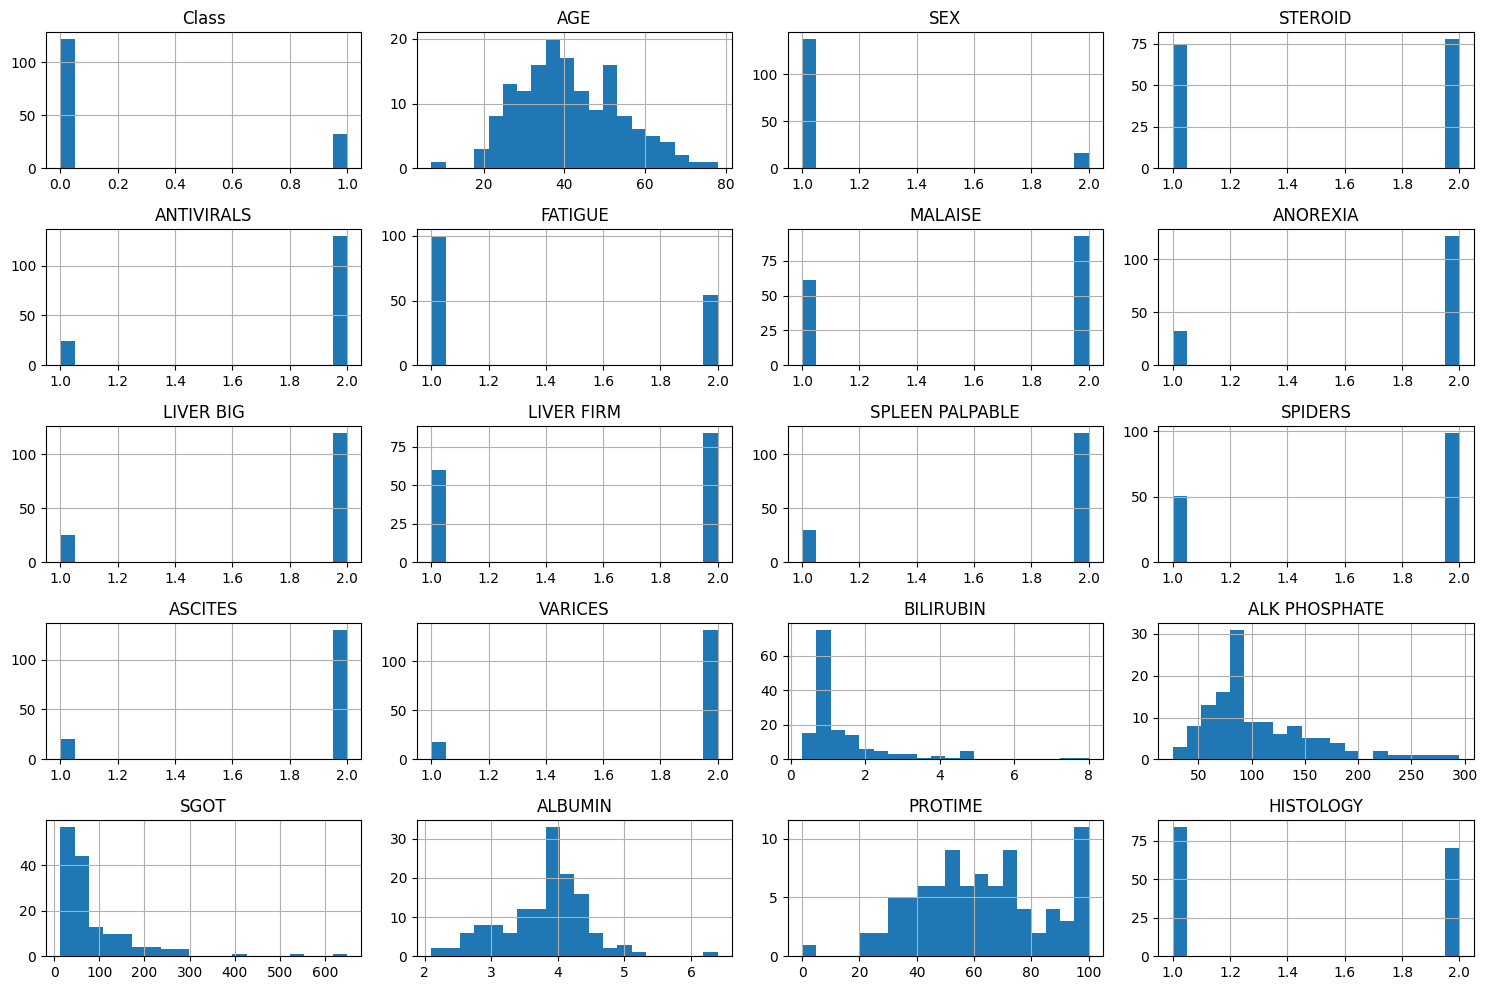

In [671]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(15, 10))
dataset.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan histogram dari masing-masing fitur dan didapatkan bahwa :
1. Class :  Dataset ini tidak seimbang karena sebagian besar data termasuk dalam satu kelas tertentu.
2. AGE : Distribusi mendekeati distribusi normal 
3. SEX : Dataset memiliki distribusi yang tidak merata antara laki-laki dan perempuan, dengan lebih banyak data pada kategori 1
4. STEROID : Sebagian besar pasien tidak menggunakan steroid
5. ANTIVIRALS : Sebagian besar pasien tidak menerima antivirus
6. FATIGUE : Sebagian besar pasien melaporkan kelelahan
7. MALAISE : Distribusi menunjukkan bahwa mayoritas pasien tidak mengalami malaise.
8. ANOREXIA : Sebagian besar pasien tidak mengalami anoreksia
9. LIVER BIG : Mayoritas pasien tidak mengalami pembesaran hati
10. LIVER FIRM : Hampir setengah dari pasien mengalami kekakuan hati.
11. SPLEEN PALPABLE : Sebagian besar pasien tidak mengalami limpa yang teraba.
12. SPIDERS : Sebagian besar pasien tidak memiliki spider angiomas
13. ASCITES : Sebagian besar pasien tidak mengalami ascites
14. VARICES : Sebagian besar pasien tidak mengalami varises
15. BILIRUBIN : Distribusi skewed ke kanan (right skewed), menunjukkan bahwa sebagian besar pasien memiliki kadar bilirubin rendah
16. ALK PHOSPHATE : Distribusi menyebar luas dengan puncak di sekitar 100
17. SGOT :  Distribusi sangat skewed ke kanan
18. ALBUMIN : Distribusi menyerupai distribusi normal dengan mayoritas
19. PROTIME : Distribusi cukup merata, tetapi terdapat beberapa lonjakan pada nilai tertentu.
20. HISTOLOGY : Mayoritas pasien memiliki nilai 1 dan nilai 2 yang menunjukkan adanya ketidakseimabngan kelas





Distribusi kelas target:
Class
0    122
1     32
Name: count, dtype: int64


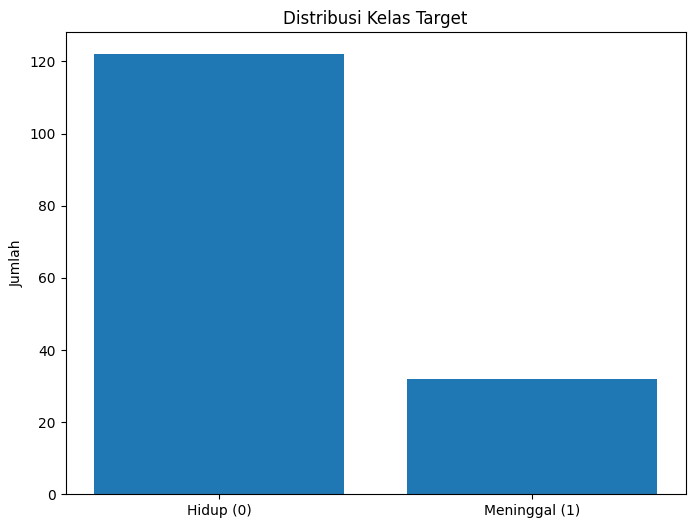

In [672]:
# Melihat distribusi kelas target
print("\nDistribusi kelas target:")
print(dataset['Class'].value_counts())
target_counts = dataset['Class'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(['Hidup (0)', 'Meninggal (1)'], target_counts.values)
plt.title('Distribusi Kelas Target')
plt.ylabel('Jumlah')
plt.show()

**ANALISIS**

Dapat dilihat data pada fitur target ini sangat tidak balance dimana yang kelasnya hidup lebih banyak jauh di bandingkan dengan yang kelasnya meninggal

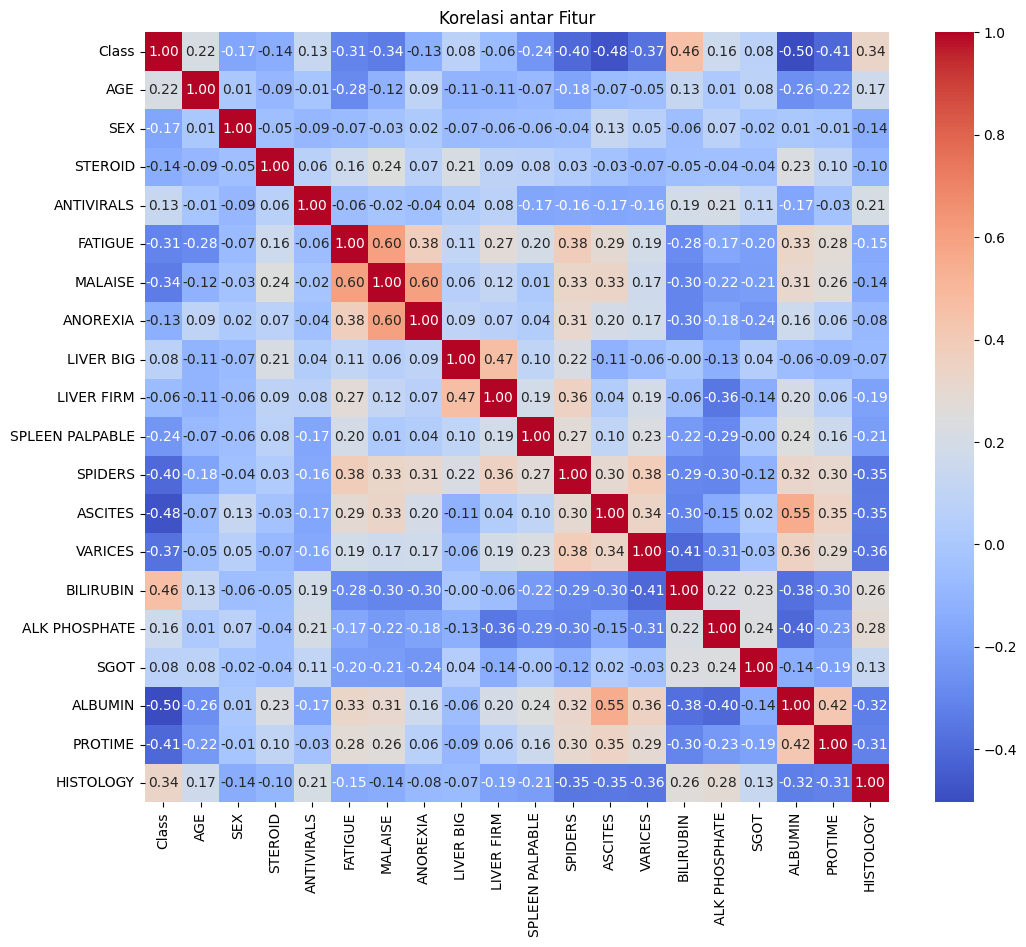

In [673]:
# Menampilkan korelasi fitur dengan target
plt.figure(figsize=(12, 10))
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur')
plt.show()

**ANALISIS**

Pada tahap ini saya menampilkan heatmap untuk menunjukkan korelasi masing-masing fitur dan didapatkan bahwa :
1. Class dan Bilirubin (0.46) : berkorelasi positif. Ini menunjukkan bahwa semakin tinggi kadar Bilirubin, kemungkinan besar seseorang masuk dalam kategori tertentu pada Class 
2. Class dan Albumin (-0.50) : Korelasi negatif . Artinya, semakin rendah kadar Albumin, semakin besar kemungkinan seseorang masuk dalam kategori penyakit tertentu pada Class.
3. Class dan Protime (-0.41) : Korelasi negatif menunjukkan bahwa semakin tinggi Protime, semakin kecil kemungkinan masuk dalam kategori penyakit pada Class.
4. Liver Firm dan Liver Big (0.47) : Korelasi cukup tinggi antara Liver Firm dan Liver Big menunjukkan bahwa jika hati membesar, kemungkinan besar juga akan lebih kaku (firmer).
5. Ascites dan Spiders (0.55) : Korelasi positif menunjukkan bahwa pasien yang memiliki Ascites (penumpukan cairan di perut) cenderung juga memiliki Spiders (pembuluh darah laba-laba di kulit), yang merupakan tanda penyakit hati kronis.
6. Varices dan Ascites (0.34) : Korelasi positif menunjukkan bahwa pasien dengan Varices (pelebaran pembuluh darah di esofagus) seringkali juga mengalami Ascites.
7. Albumin dan Ascites (-0.55) : Korelasi negatif yang kuat menunjukkan bahwa kadar Albumin yang lebih rendah sering dikaitkan dengan adanya Ascites
8. Bilirubin dan Varices (0.26) :  Korelasi positif menunjukkan bahwa semakin tinggi kadar Bilirubin, semakin besar kemungkinan pasien mengalami Varices.





# 2. SPLIT DATASET

In [674]:
from sklearn.model_selection import train_test_split

# Assuming 'Grade' is the target variable and you want to normalize the features
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.index.size)
print(X_test.index.size)

107
47


**ANALISIS**

pada tahap ini saya membagi data dan memisahkan antara fitur dengan targte. Dataset ini saya bagi menjadi 30% menjadi data test dan 70% menjadi data train

# 3. FEATURE ENGGINERING

**A. HANDLING MISSING VALUE**

In [675]:
# Mengecek jumlah nilai missing di X_train dan X_test
print("Missing values in X_train:\n", X_train.isnull().sum())

Missing values in X_train:
 AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           5
LIVER FIRM          5
SPLEEN PALPABLE     3
SPIDERS             3
ASCITES             3
VARICES             3
BILIRUBIN           5
ALK PHOSPHATE      24
SGOT                3
ALBUMIN            11
PROTIME            45
HISTOLOGY           0
dtype: int64


**ANALISIS**

Pada tahap ini mengecek fitur mana saja yang memiliki missing value

In [676]:
# Identifikasi kolom numerik
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Imputasi missing values dengan median di X_train 
for col in numeric_cols:
    X_train[col].fillna(X_train[col].median(), inplace=True)
    X_test[col].fillna(X_test[col].median(), inplace=True)


C:\Users\nimaa\AppData\Local\Temp\ipykernel_12424\3096689905.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].median(), inplace=True)
C:\Users\nimaa\AppData\Local\Temp\ipykernel_12424\3096689905.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


**ANALISIS**

Pada tahap ini saya mengiis missing value dengan nilai median

In [677]:
# Mengecek jumlah nilai missing di X_train dan X_test
print("Missing values in X_train:\n", X_train.isnull().sum())


Missing values in X_train:
 AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


**ANALISIS**

Dapat dilihat bahwa sudah tidak ada lagi misssing value

 **B. HANDLING DATA OUTLIER**

In [678]:
print("Kolom numerik yang digunakan:", numeric_cols)

Kolom numerik yang digunakan: Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY'],
      dtype='object')


Visualisasi untuk TRAINING DATA - AGE


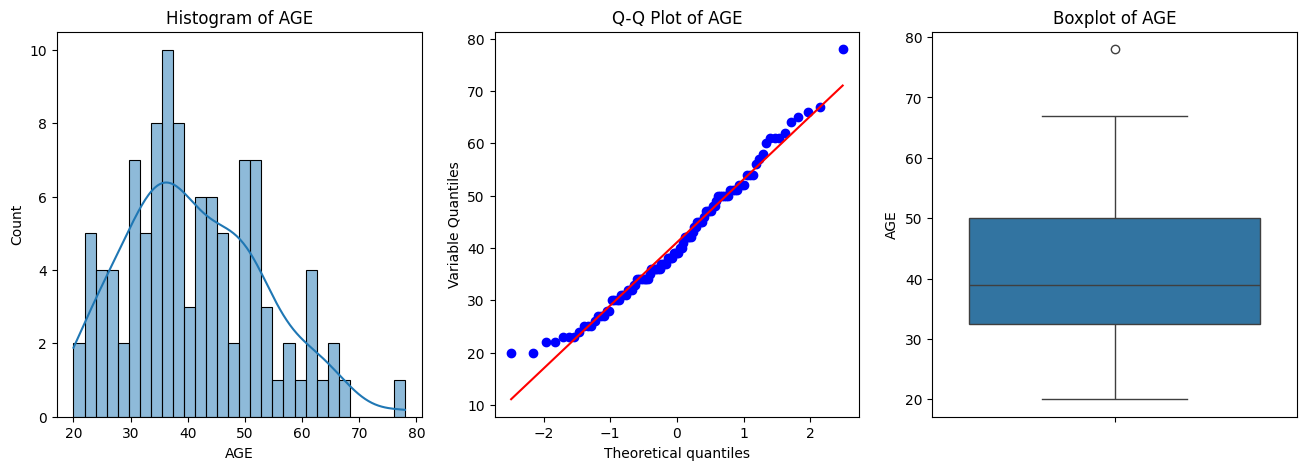

Visualisasi untuk TRAINING DATA - SEX


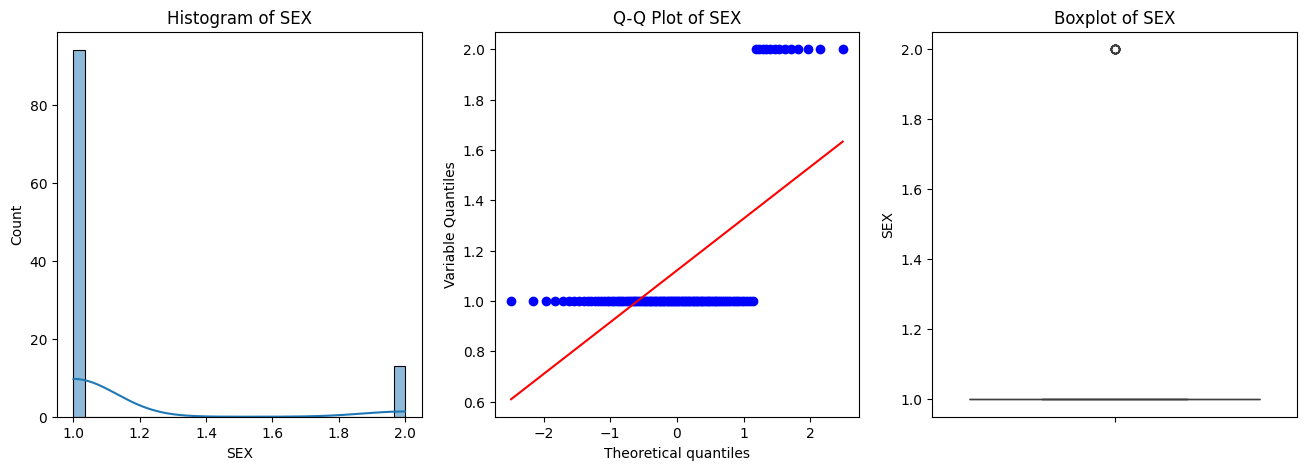

Visualisasi untuk TRAINING DATA - STEROID


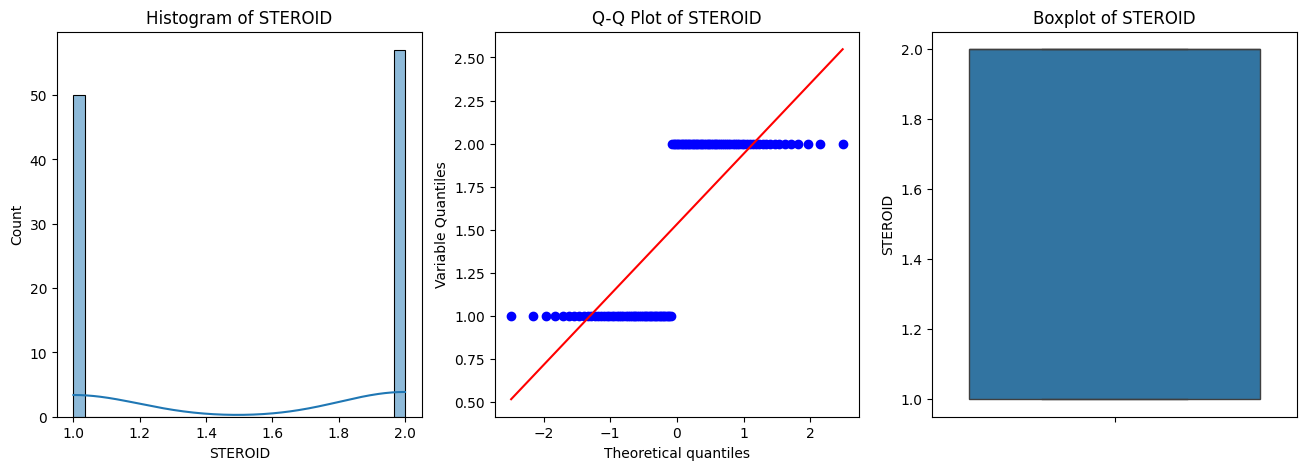

Visualisasi untuk TRAINING DATA - ANTIVIRALS


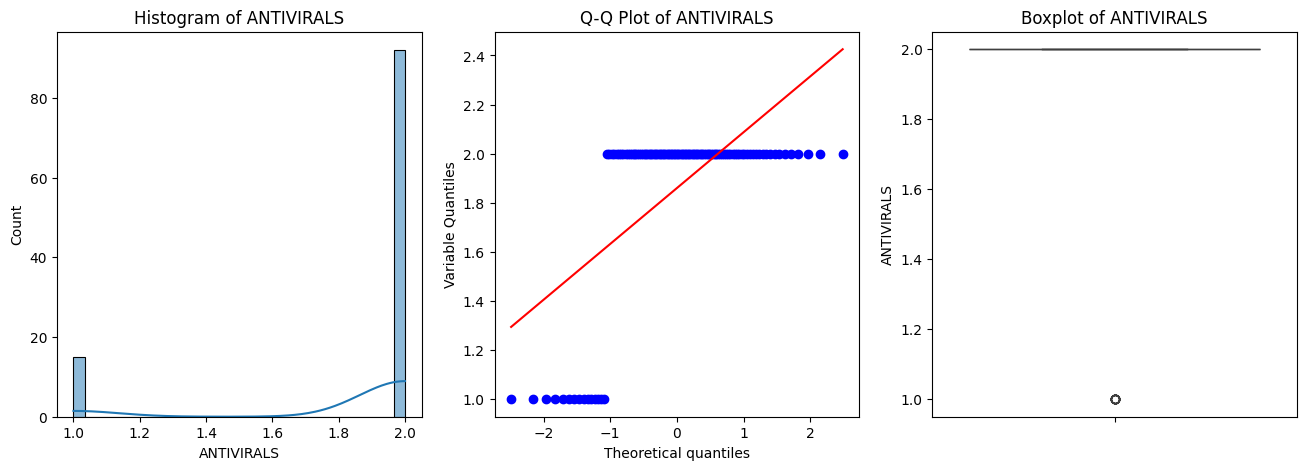

Visualisasi untuk TRAINING DATA - FATIGUE


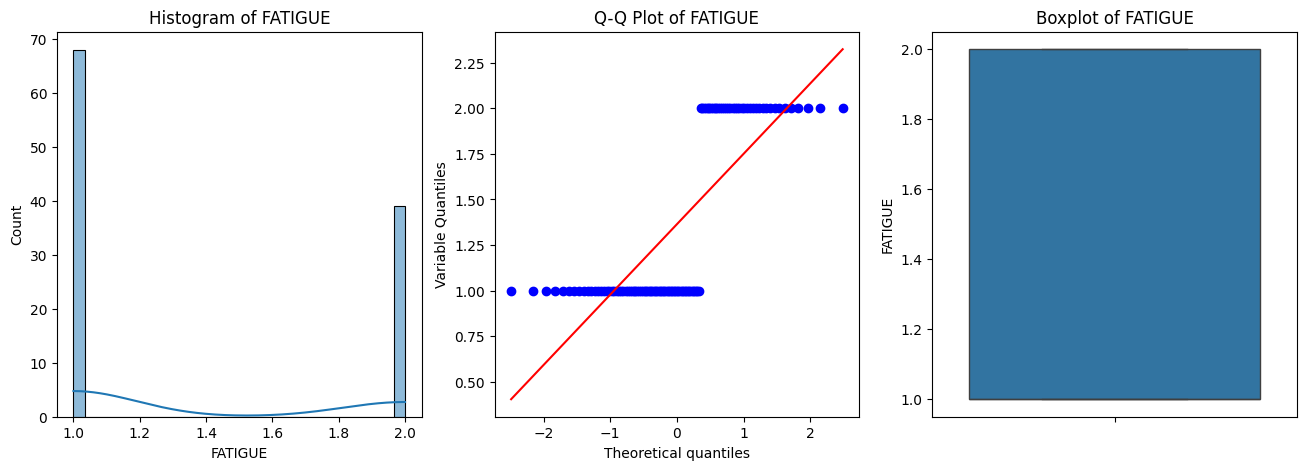

Visualisasi untuk TRAINING DATA - MALAISE


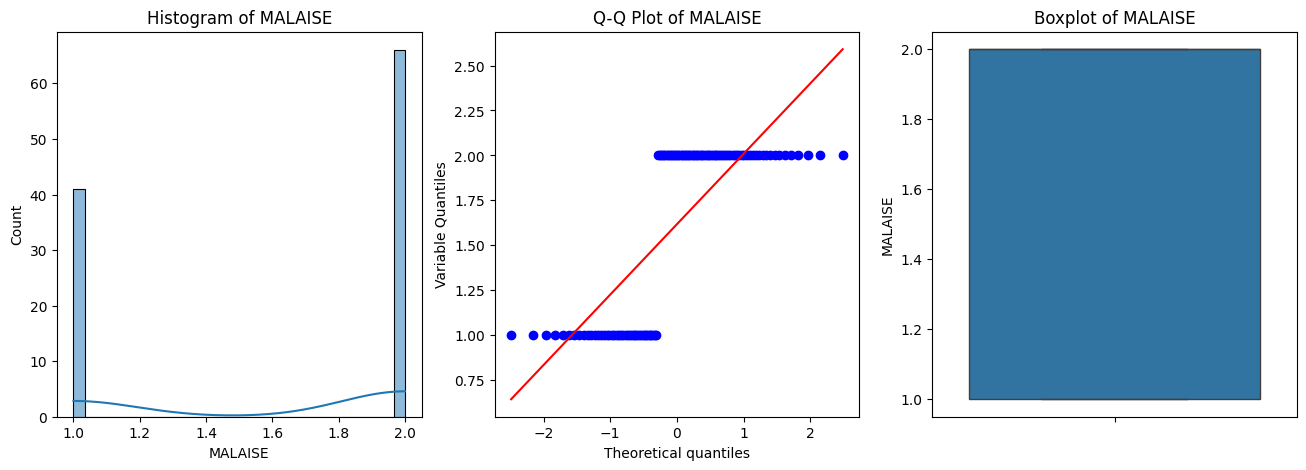

Visualisasi untuk TRAINING DATA - ANOREXIA


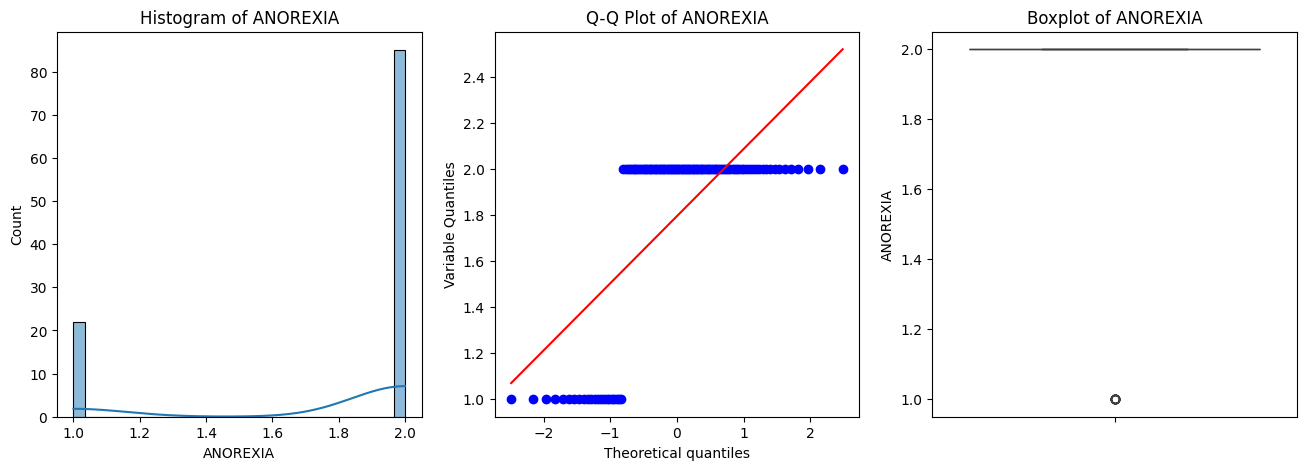

Visualisasi untuk TRAINING DATA - LIVER BIG


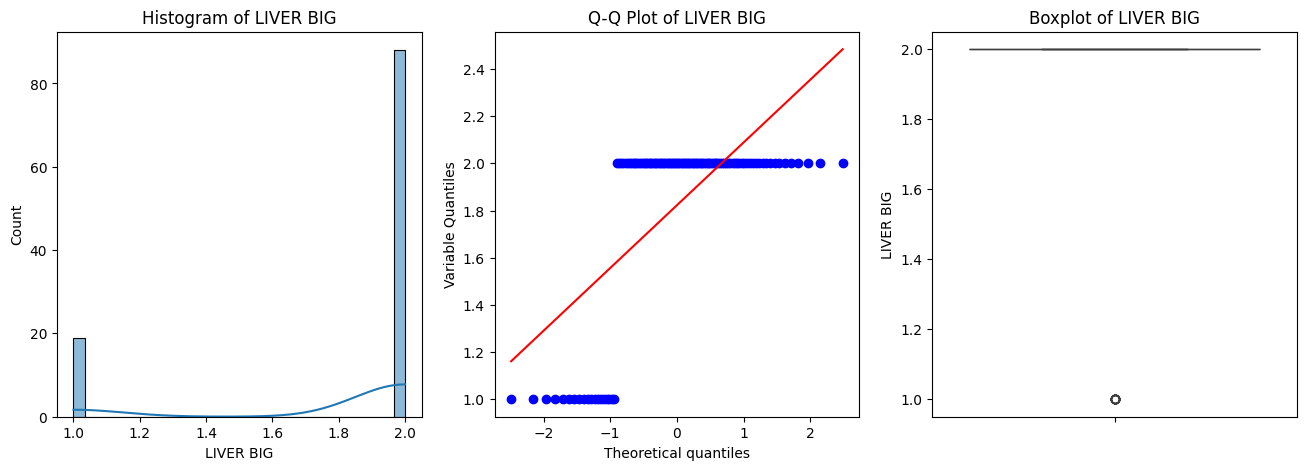

Visualisasi untuk TRAINING DATA - LIVER FIRM


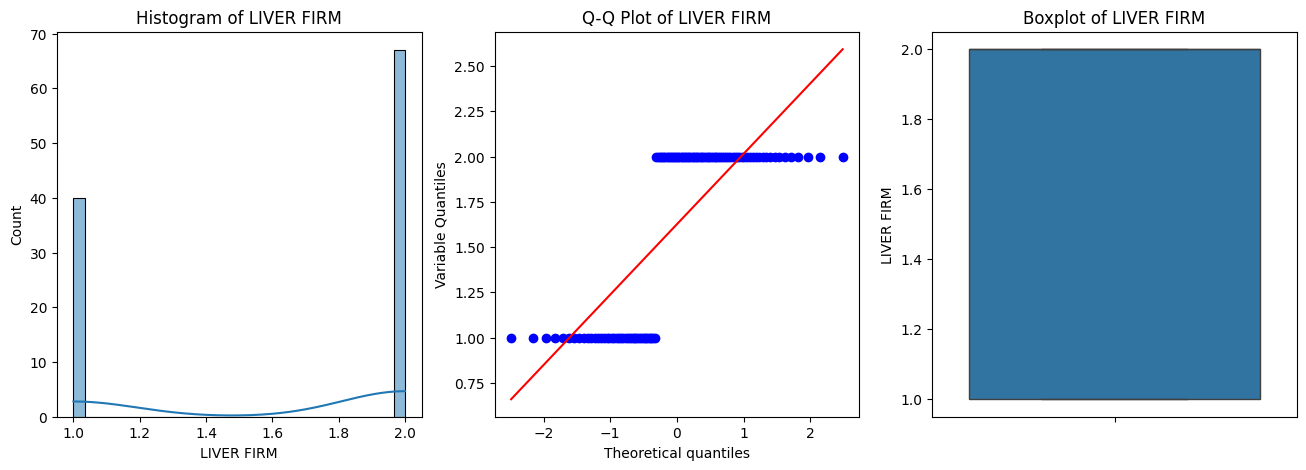

Visualisasi untuk TRAINING DATA - SPLEEN PALPABLE


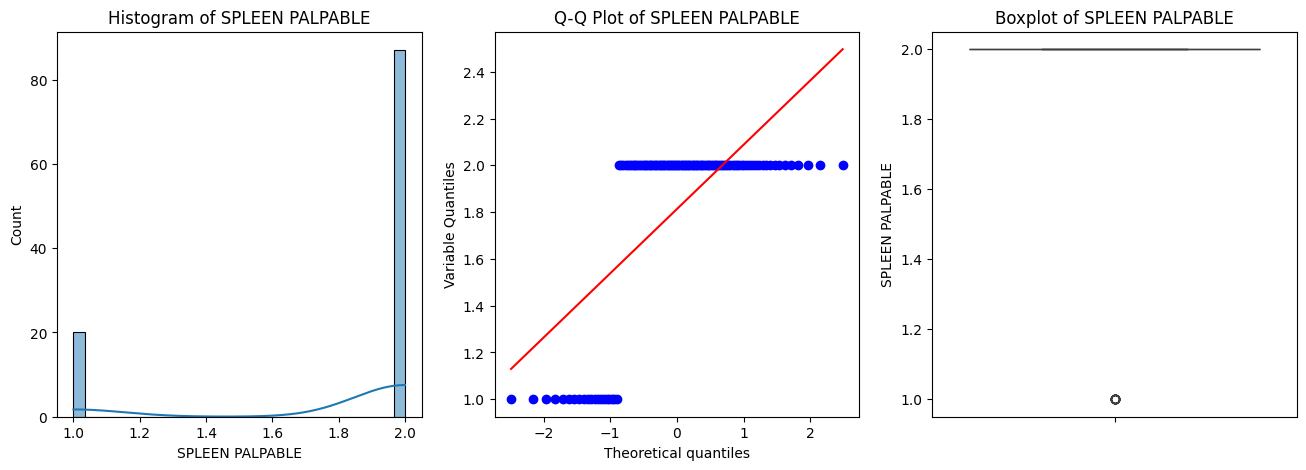

Visualisasi untuk TRAINING DATA - SPIDERS


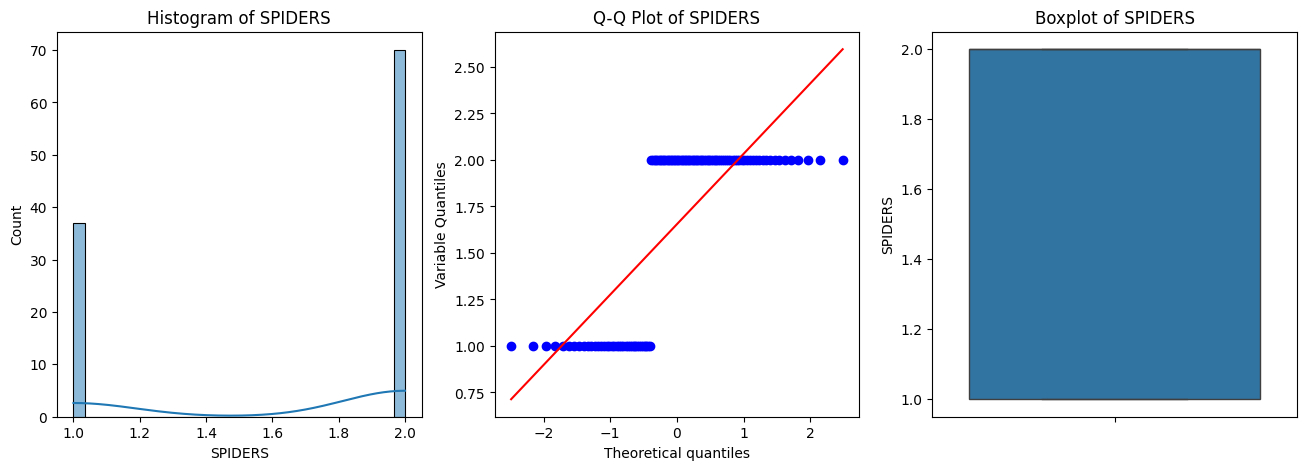

Visualisasi untuk TRAINING DATA - ASCITES


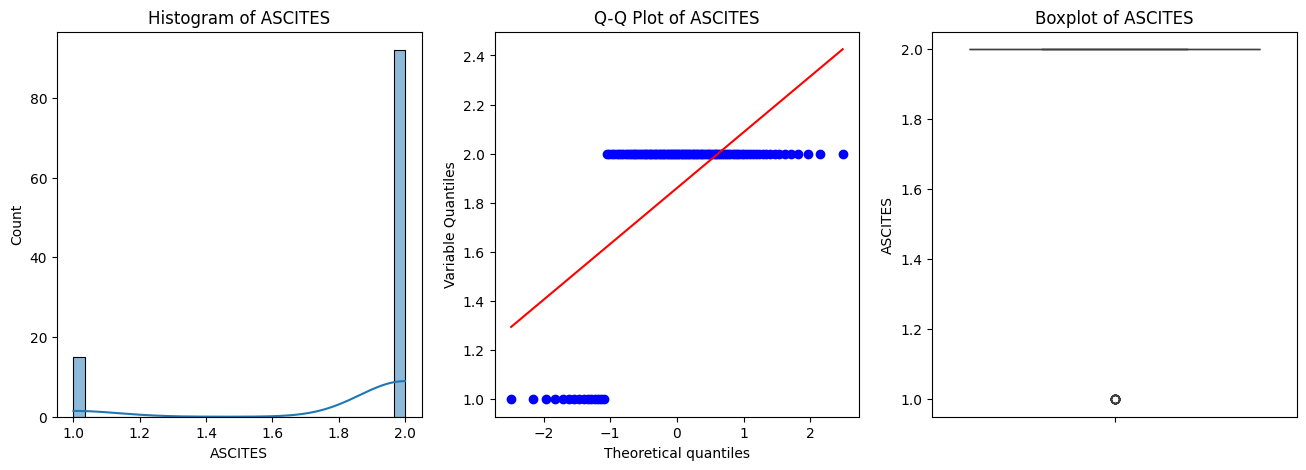

Visualisasi untuk TRAINING DATA - VARICES


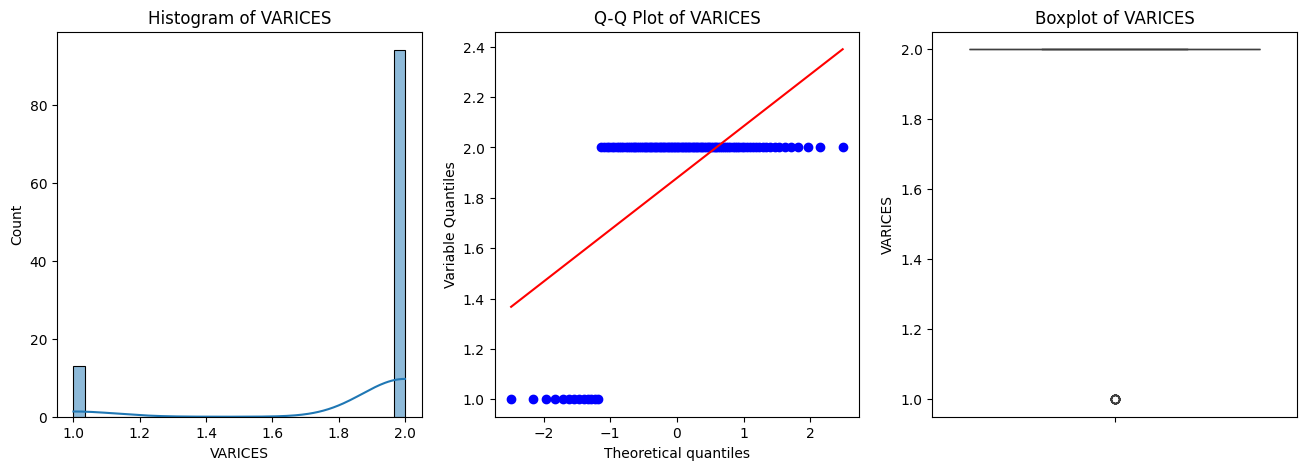

Visualisasi untuk TRAINING DATA - BILIRUBIN


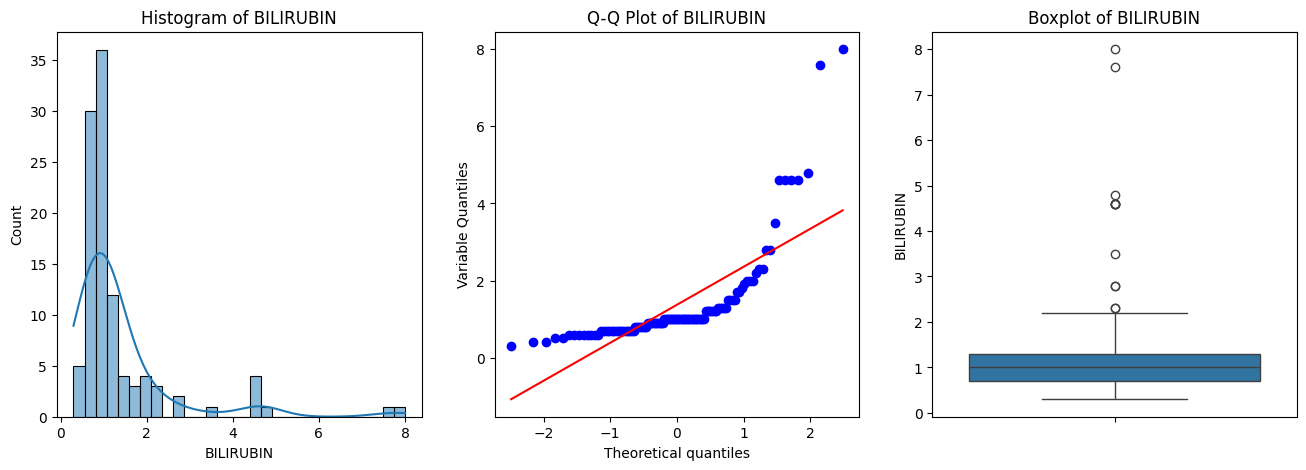

Visualisasi untuk TRAINING DATA - ALK PHOSPHATE


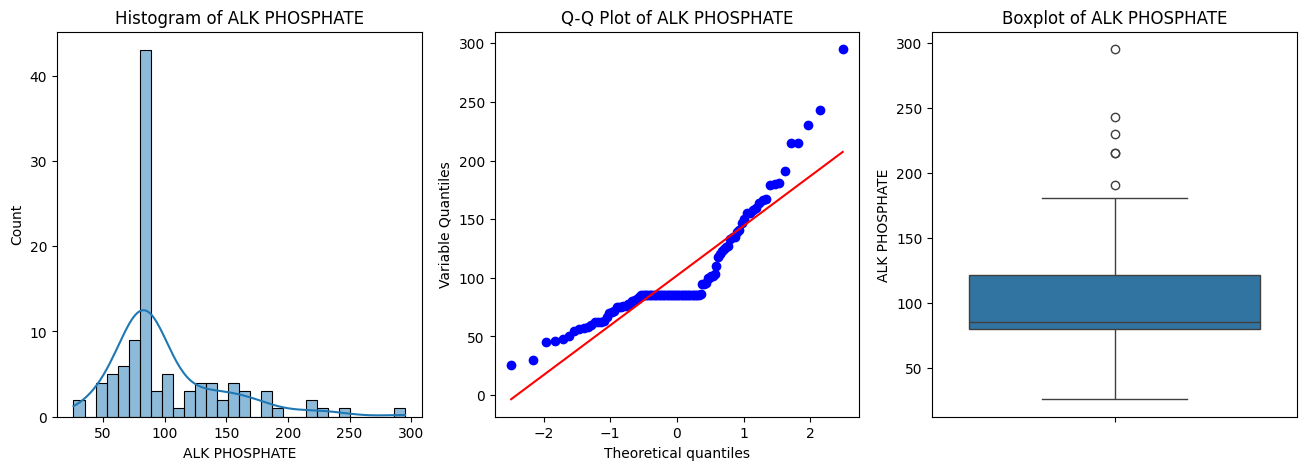

Visualisasi untuk TRAINING DATA - SGOT


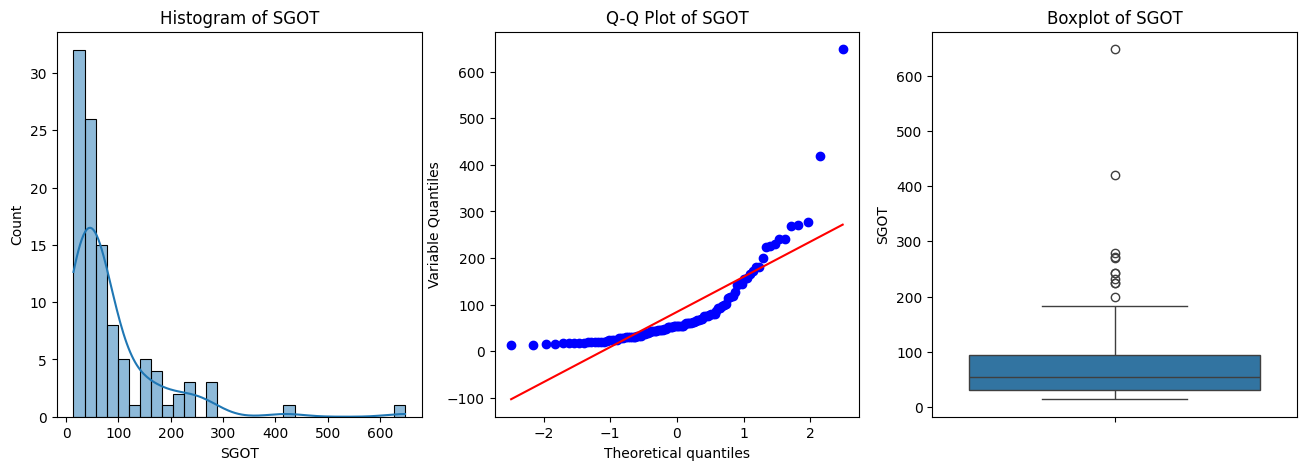

Visualisasi untuk TRAINING DATA - ALBUMIN


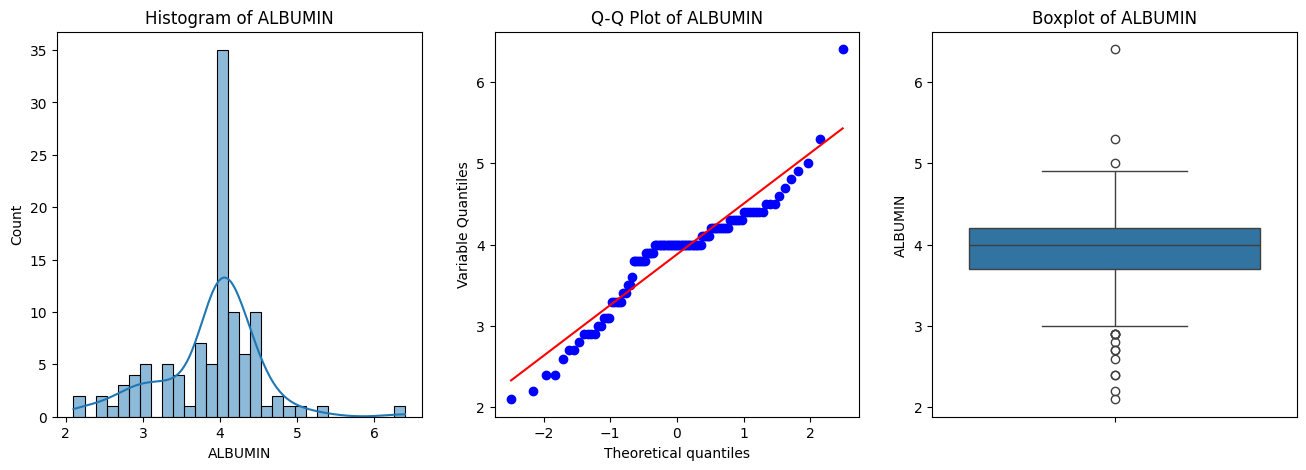

Visualisasi untuk TRAINING DATA - PROTIME


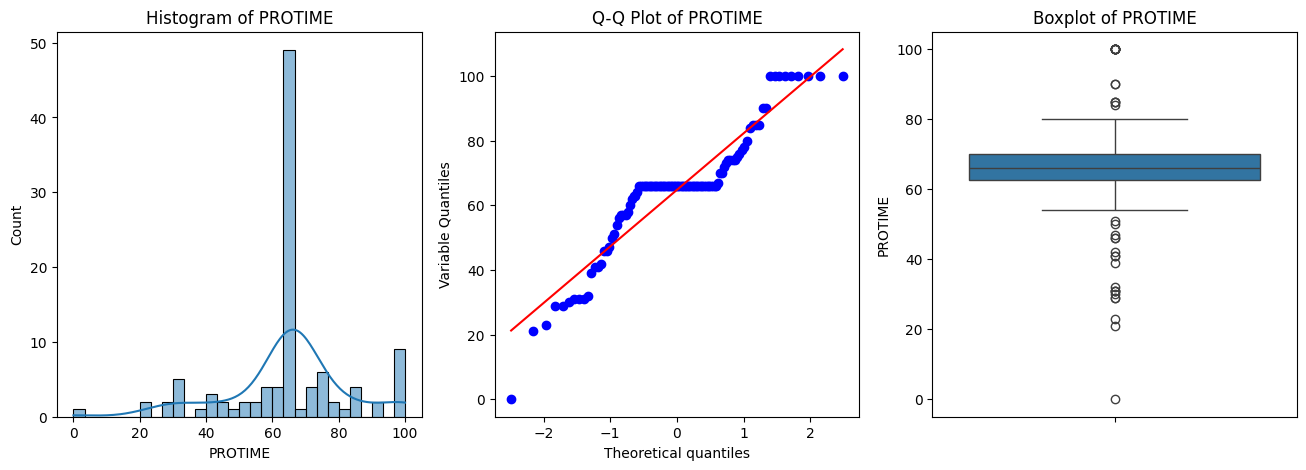

Visualisasi untuk TRAINING DATA - HISTOLOGY


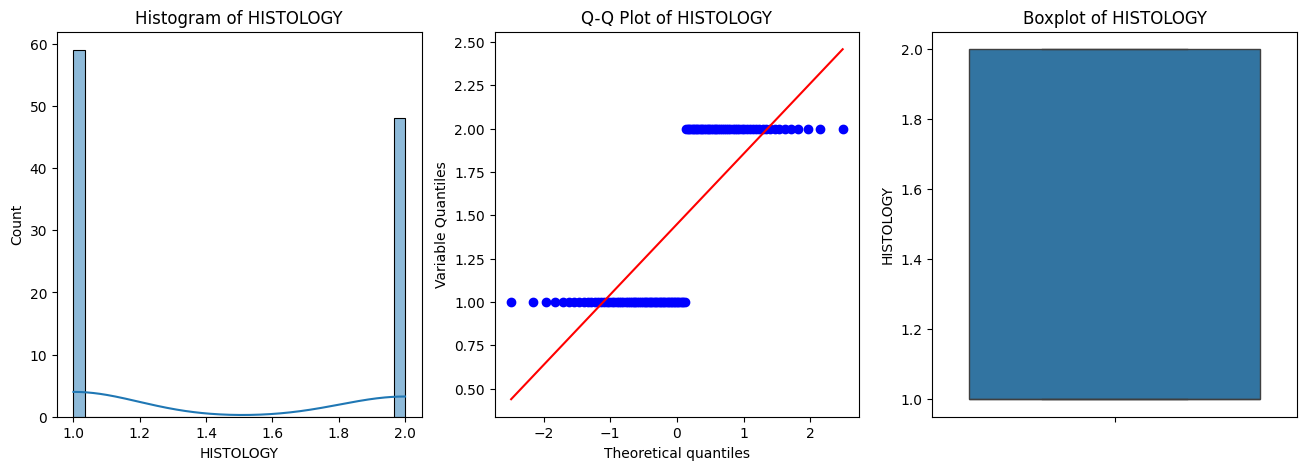

In [679]:
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

def check_plot(df, variable):
    plt.figure(figsize=(16, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f'Histogram of {variable}')

    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable Quantiles')
    plt.title(f'Q-Q Plot of {variable}')

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

# Looping untuk setiap fitur numerik di X_train dan X_test
for feature in numeric_cols:
    if feature in X_train.columns:
        print(f"Visualisasi untuk TRAINING DATA - {feature}")
        check_plot(X_train, feature)
    


**ANALISIS**

Pada tahap ini saya menampilkan masing-masing fitur untuk mengecek apakah data outlier atau tidak didapatkan bahwa bebrapa fitur yang memiliki data outlier yakni :
1. age
2. bilirubin
3. phosphate
4. sgot
5. albumin
6. protime


Visualisasi setelah IQR Capping - TRAINING DATA - AGE


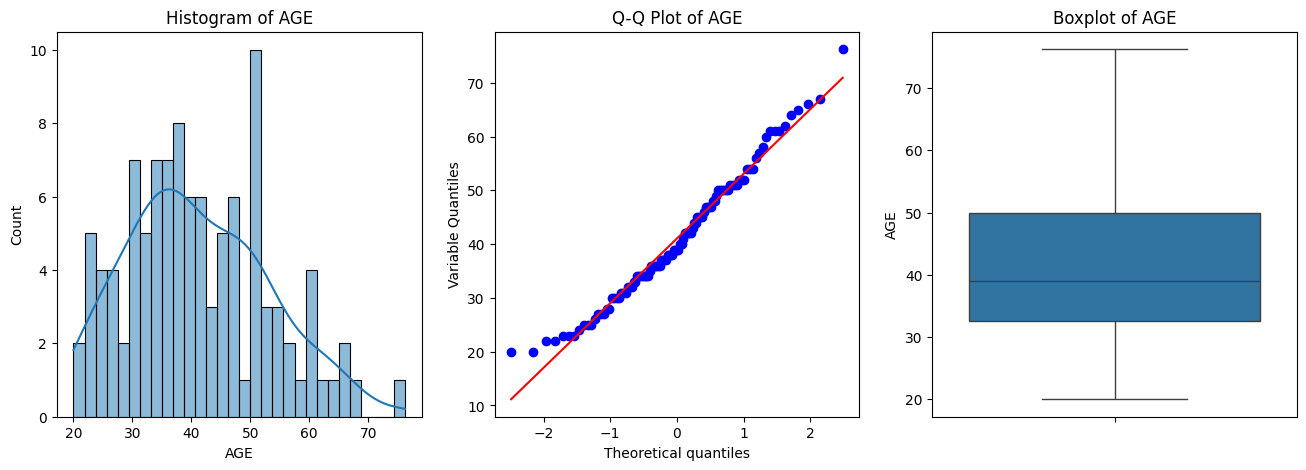

Visualisasi setelah IQR Capping - TRAINING DATA - SEX


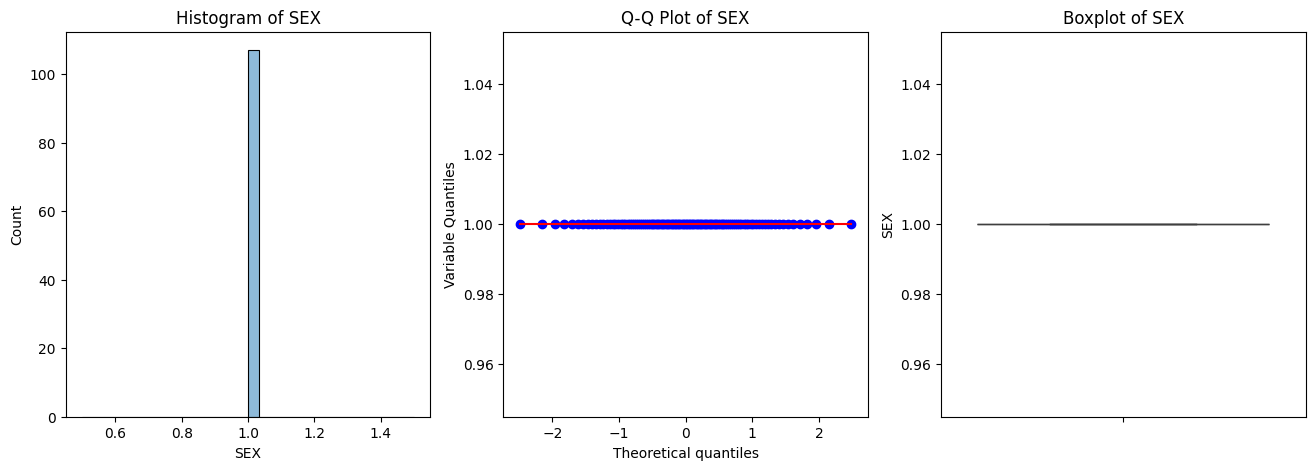

Visualisasi setelah IQR Capping - TRAINING DATA - STEROID


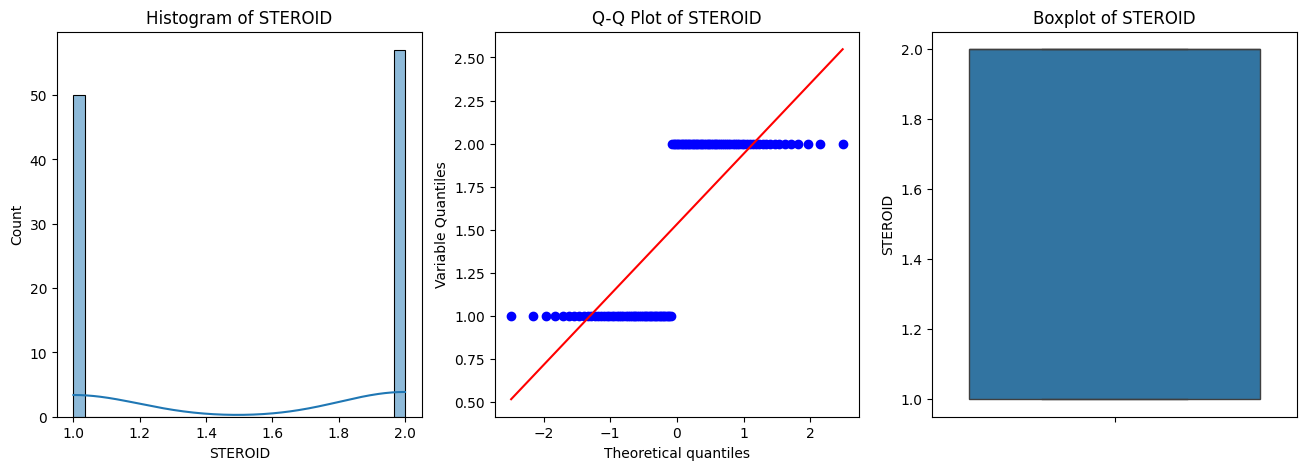

Visualisasi setelah IQR Capping - TRAINING DATA - ANTIVIRALS


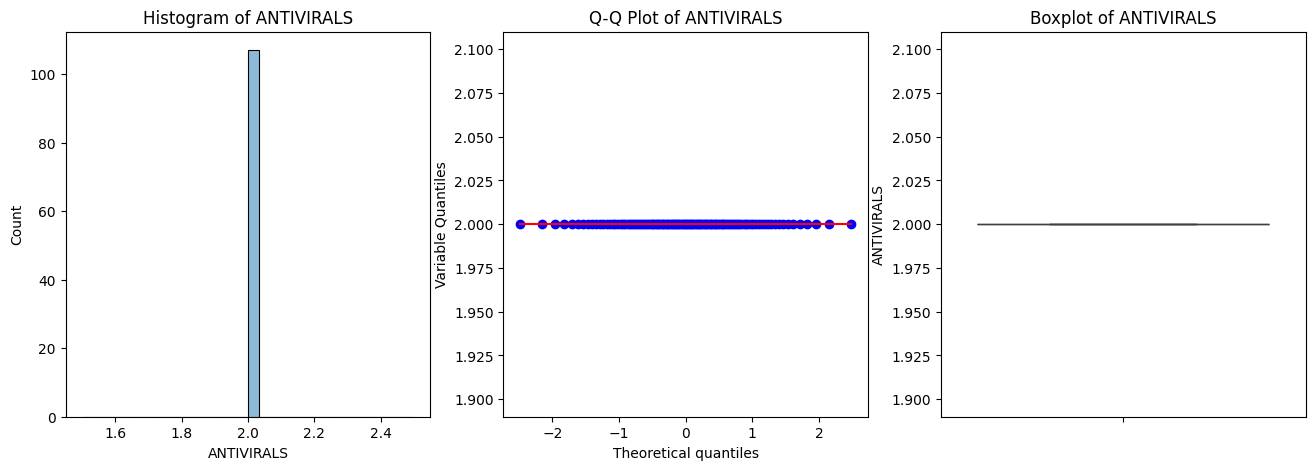

Visualisasi setelah IQR Capping - TRAINING DATA - FATIGUE


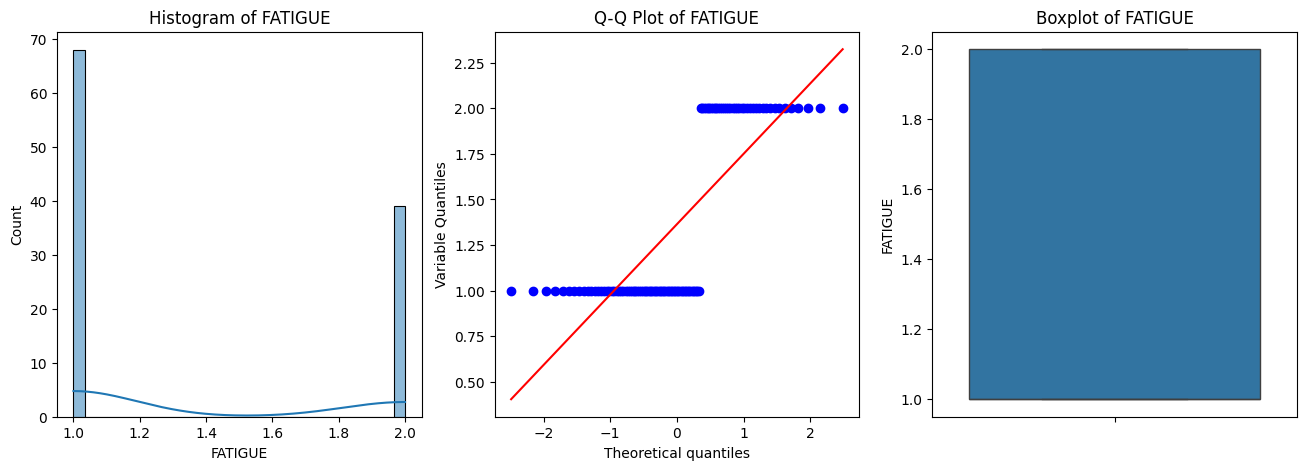

Visualisasi setelah IQR Capping - TRAINING DATA - MALAISE


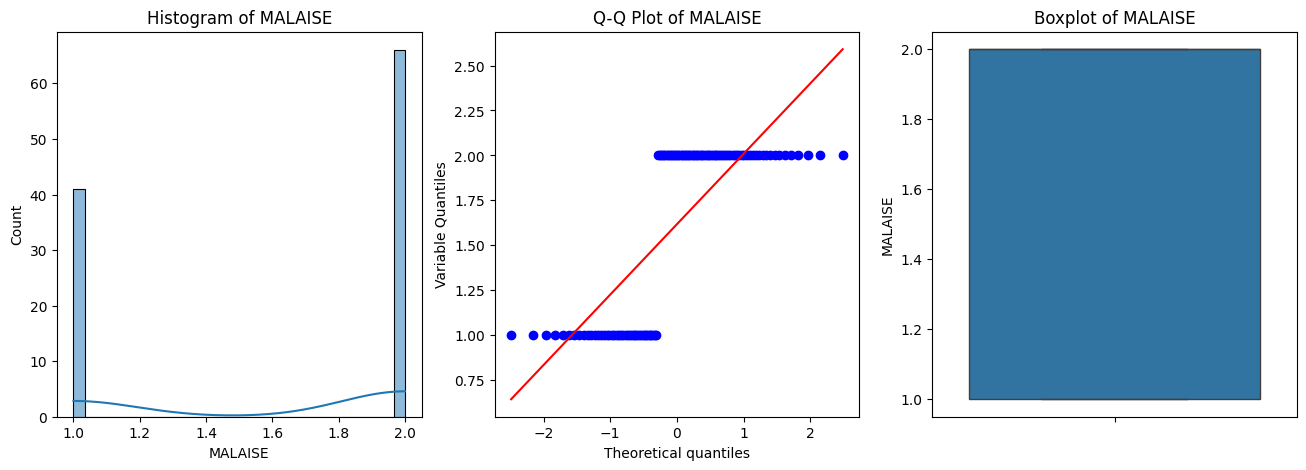

Visualisasi setelah IQR Capping - TRAINING DATA - ANOREXIA


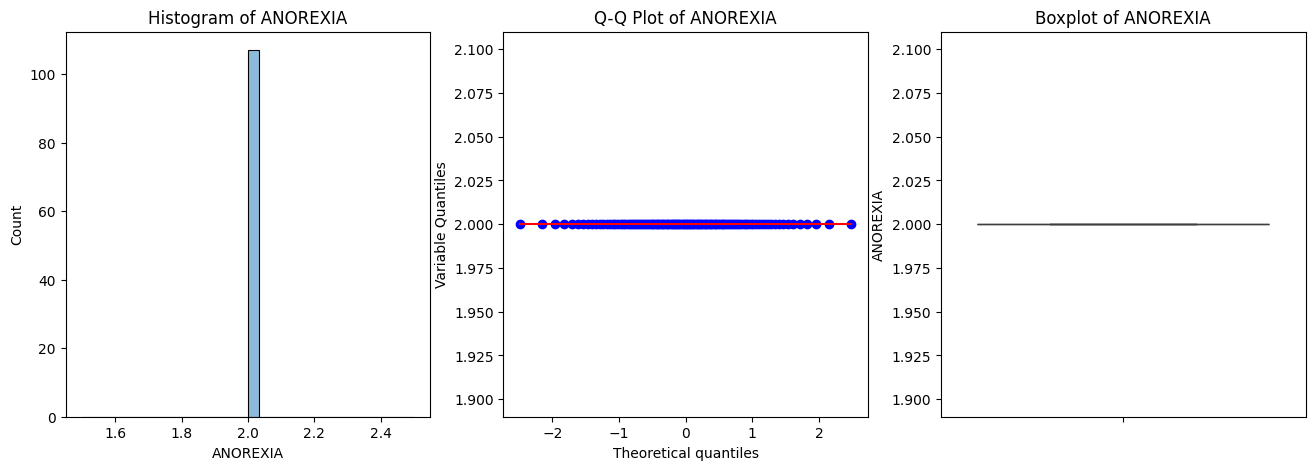

Visualisasi setelah IQR Capping - TRAINING DATA - LIVER BIG


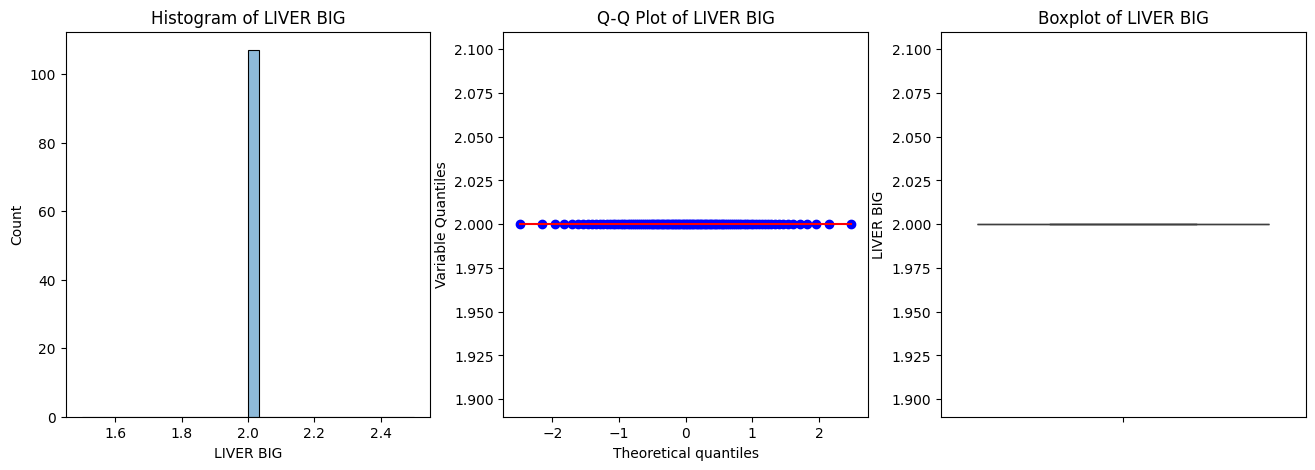

Visualisasi setelah IQR Capping - TRAINING DATA - LIVER FIRM


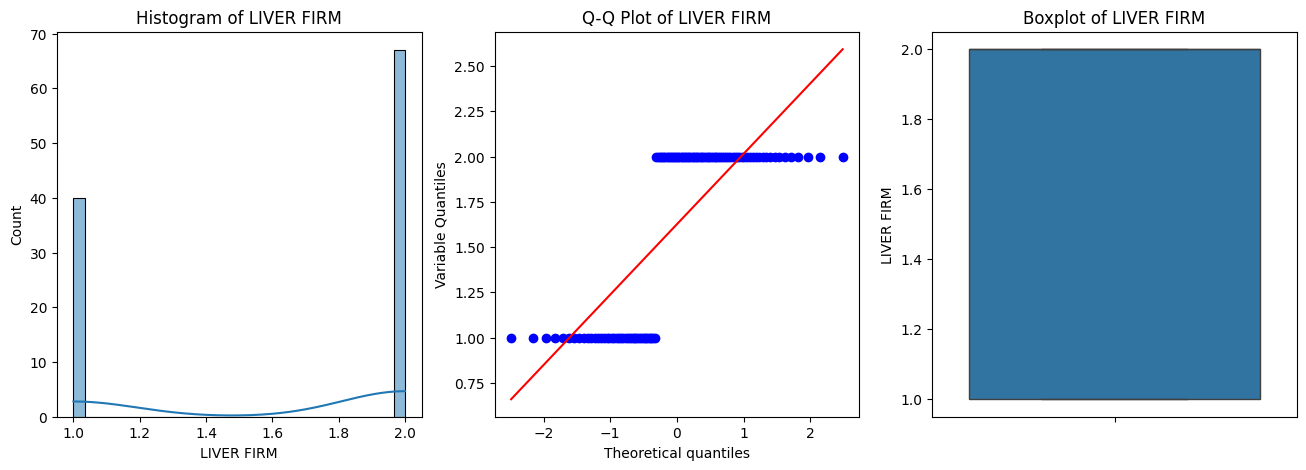

Visualisasi setelah IQR Capping - TRAINING DATA - SPLEEN PALPABLE


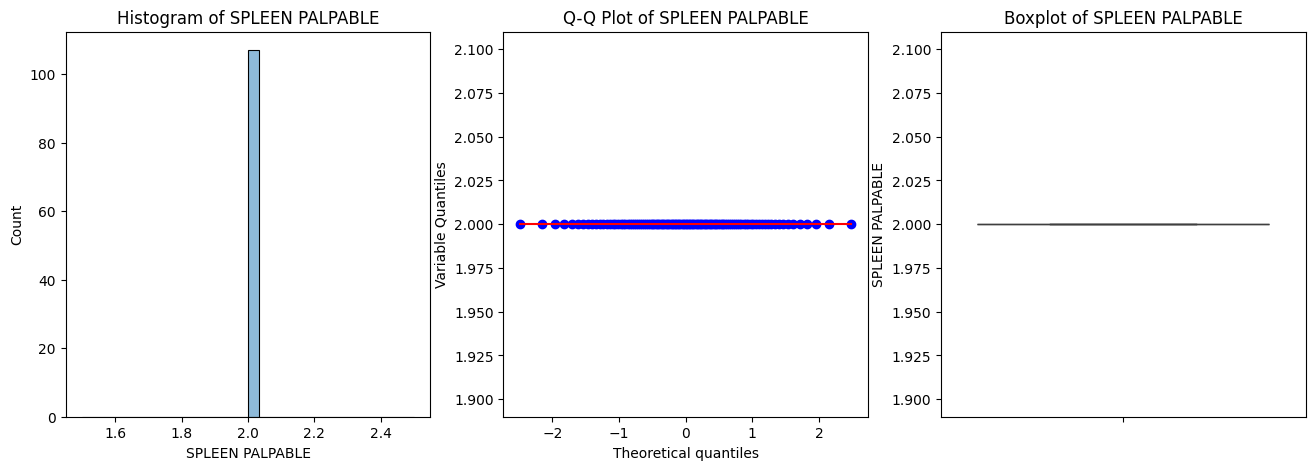

Visualisasi setelah IQR Capping - TRAINING DATA - SPIDERS


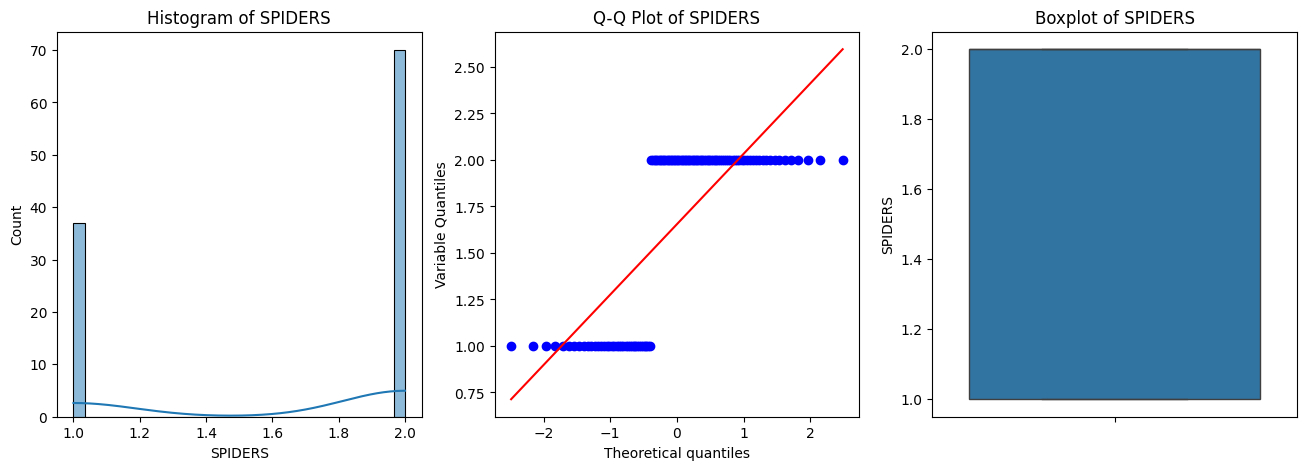

Visualisasi setelah IQR Capping - TRAINING DATA - ASCITES


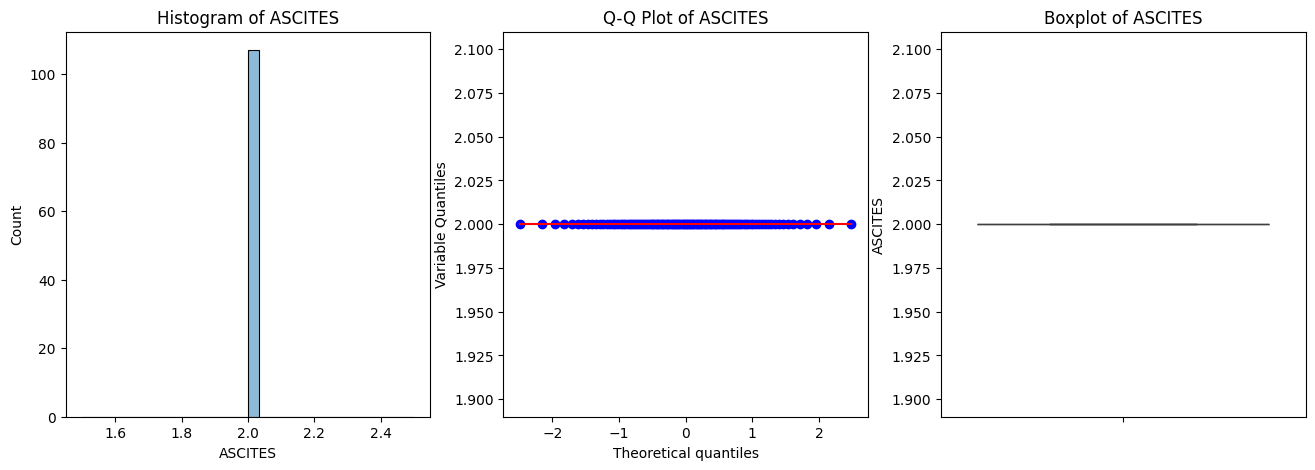

Visualisasi setelah IQR Capping - TRAINING DATA - VARICES


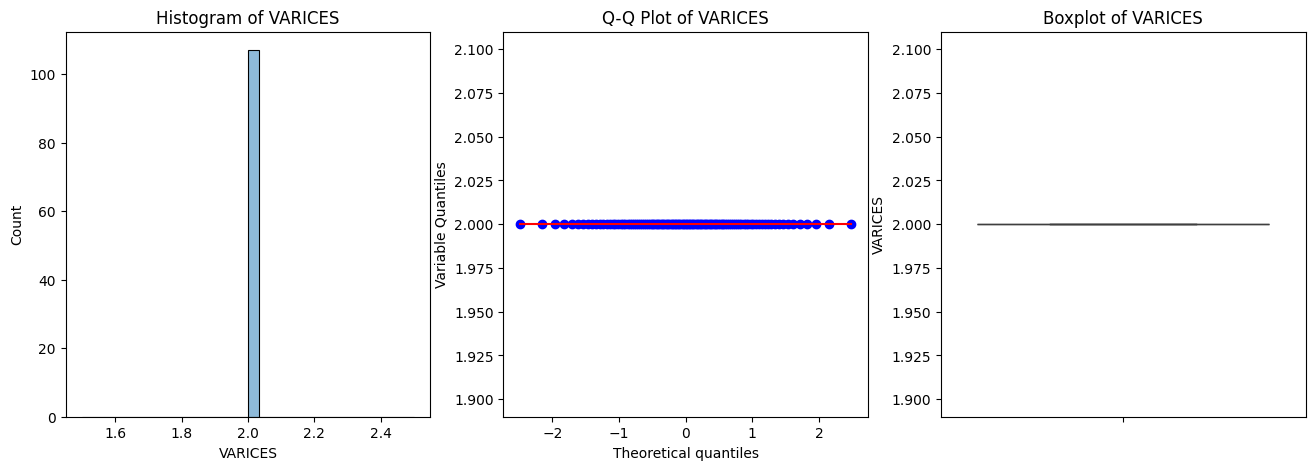

Visualisasi setelah IQR Capping - TRAINING DATA - BILIRUBIN


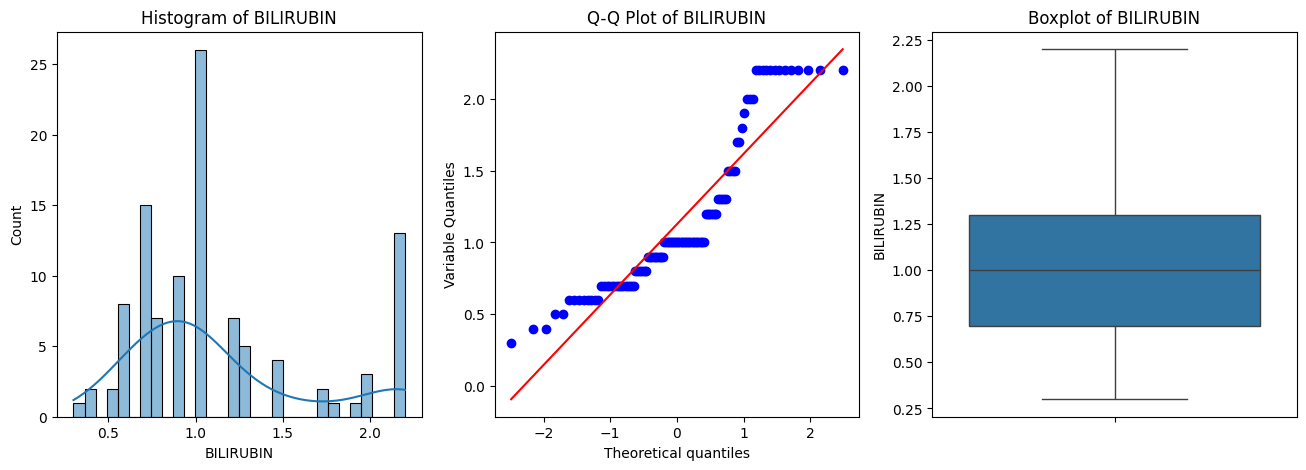

Visualisasi setelah IQR Capping - TRAINING DATA - ALK PHOSPHATE


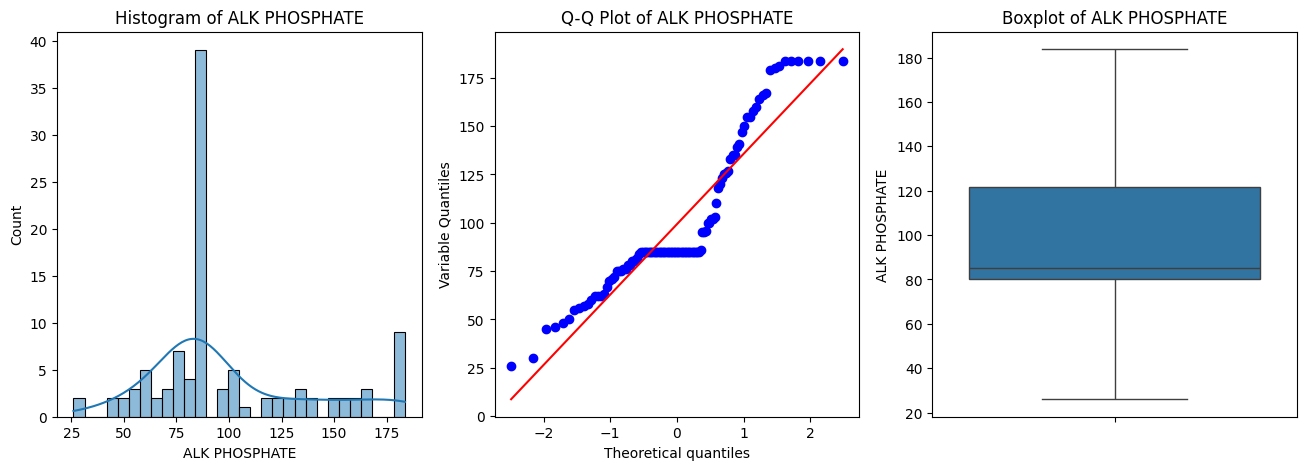

Visualisasi setelah IQR Capping - TRAINING DATA - SGOT


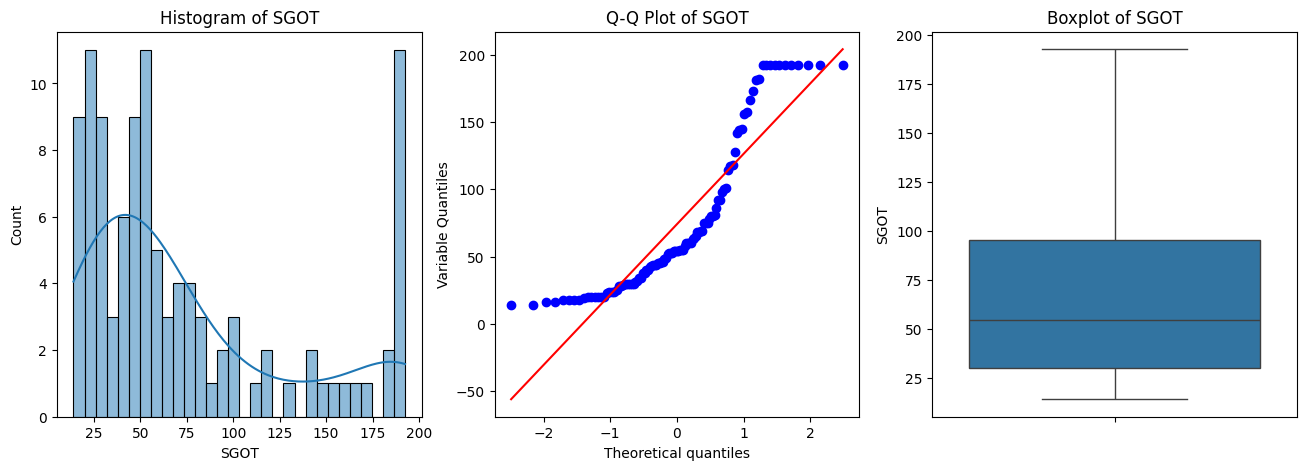

Visualisasi setelah IQR Capping - TRAINING DATA - ALBUMIN


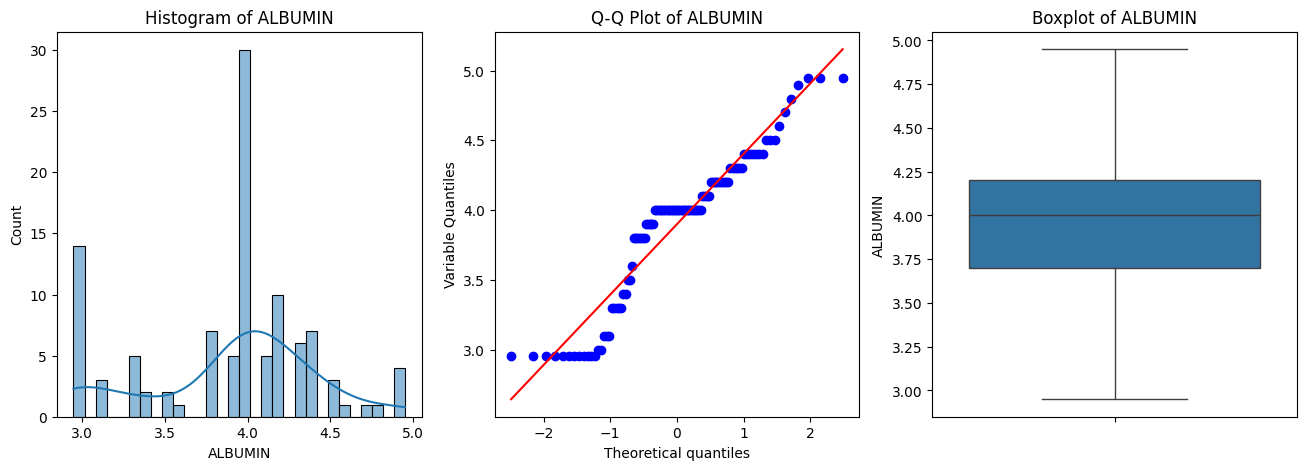

Visualisasi setelah IQR Capping - TRAINING DATA - PROTIME


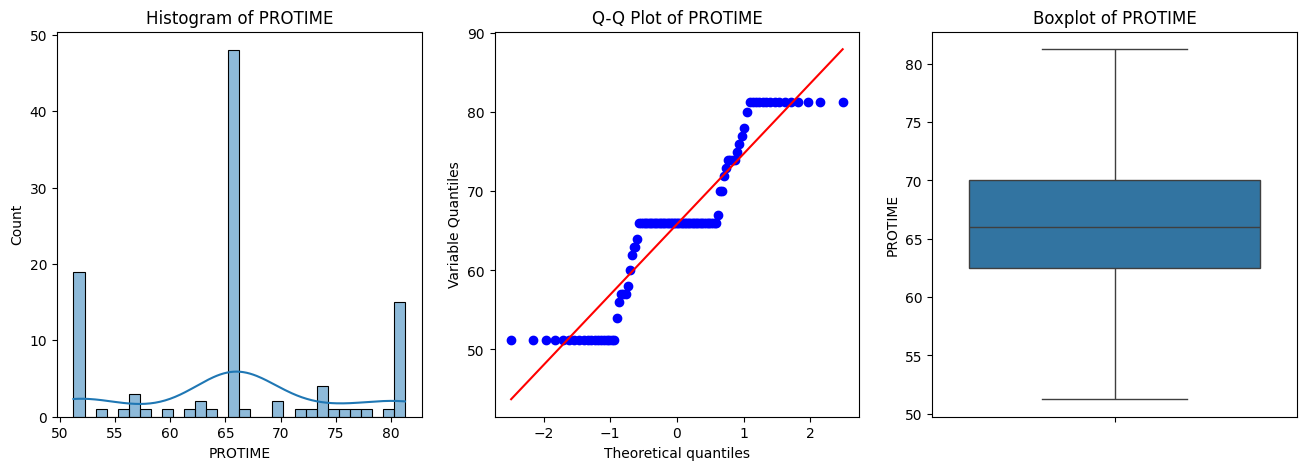

Visualisasi setelah IQR Capping - TRAINING DATA - HISTOLOGY


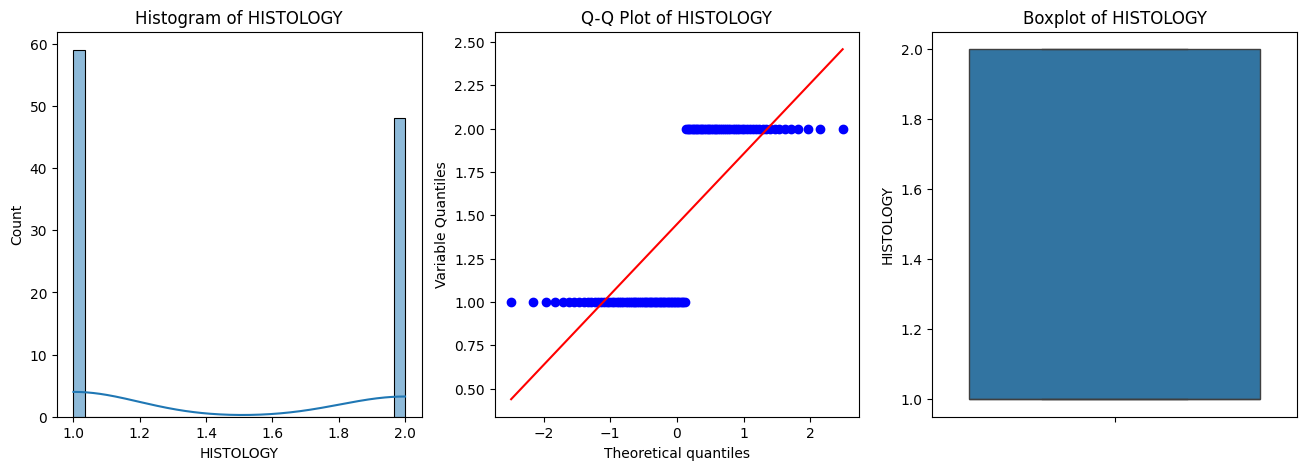

In [680]:
import numpy as np

def iqr_capping(df):
    """
    Menangani outlier dengan IQR Capping.
    Outlier di bawah Q1 - 1.5*IQR akan diganti dengan batas bawah.
    Outlier di atas Q3 + 1.5*IQR akan diganti dengan batas atas.
    """
    df_capped = df.copy()
    Q1 = df_capped.quantile(0.25)
    Q3 = df_capped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped = df_capped.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x))
    df_capped = df_capped.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x))

    return pd.DataFrame(df_capped, columns=df.columns)

# Terapkan IQR Capping ke X_train dan X_test
X_train[numeric_cols] = iqr_capping(X_train[numeric_cols])
X_test[numeric_cols] = iqr_capping(X_test[numeric_cols])

# Visualisasi ulang setelah IQR Capping
for feature in numeric_cols:
    if feature in X_train.columns:
        print(f"Visualisasi setelah IQR Capping - TRAINING DATA - {feature}")
        check_plot(X_train, feature)

   


**ANALISIS**

Disini saya melakukan handling data outlier dengan menggunakan metode  IQR capping, metode ini berkeja dengan cara dengan mengganti nilai ekstrem dengan batas yang masuk dengan distribusi data. Dapat dilihat bahwa sudah tidak ada fitur yang memiliki data outlier

# 4. FEATURE SELECTION

In [681]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [682]:
# Feature Selection menggunakan ANOVA (f_classif)
k = 10  # Jumlah fitur terbaik yang akan dipilih
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Dapatkan nama fitur yang terpilih
selected_features = X_train.columns[selector.get_support()]
print("Fitur terpilih:", selected_features.tolist())

Fitur terpilih: ['AGE', 'STEROID', 'FATIGUE', 'MALAISE', 'SPIDERS', 'BILIRUBIN', 'ALK PHOSPHATE', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 1  3  6  7  9 11 12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


**ANALISIS**

Disini saya melakuakn feature selection menggunakan metode ANNOVA dimana anova akan memiliih 10 fitur terbaik. Konsep cara kera ANOVA yakni dengan cara menghitung skor F untuk setiap fitur dengan membandingkan variabilitas antara kelas (antara kelompok) dan di dalam kelas (dalam kelompok).Semakin besar skor F, semakin besar perbedaan rata-rata fitur di antara kelas target, yang berarti fitur tersebut lebih informatif untuk klasifikasi. Berdasarkan output didapatkan bahwa 10 fitur yang lolos selection yakni :
1. AGE
2. STEROID
3. FATIGUE
4. MALAISE
5. SPIDERS
6. BILIRUBIN
7. ALK PHOSPHATE
8. ALBUMIN
9. PROTIME
10. HISTOLOGY

# 5. FEATURE SCALING

In [683]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Konversi X_train_selected dan X_test_selected kembali ke DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

# Terapkan scaling pada fitur yang sudah dipilih
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected_df), 
                              columns=X_train_selected_df.columns, 
                              index=X_train_selected_df.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected_df), 
                             columns=X_test_selected_df.columns, 
                             index=X_test_selected_df.index)

# Tampilkan ringkasan data setelah scaling
print("Mean setelah scaling:\n", X_train_scaled.mean())
print("\nStandard Deviation setelah scaling:\n", X_train_scaled.std())


Mean setelah scaling:
 AGE              2.977888e-16
STEROID          7.055623e-17
FATIGUE          1.909169e-16
MALAISE         -1.328117e-16
SPIDERS         -1.328117e-16
BILIRUBIN        1.079095e-16
ALK PHOSPHATE    1.162103e-16
ALBUMIN          4.284767e-16
PROTIME          5.727506e-16
HISTOLOGY       -1.079095e-16
dtype: float64

Standard Deviation setelah scaling:
 AGE              1.004706
STEROID          1.004706
FATIGUE          1.004706
MALAISE          1.004706
SPIDERS          1.004706
BILIRUBIN        1.004706
ALK PHOSPHATE    1.004706
ALBUMIN          1.004706
PROTIME          1.004706
HISTOLOGY        1.004706
dtype: float64


**ANALISIS**

Berdasarkan statistik deskriptif tadi masih banyak beberapa fitur yang memiliki skala yang berbeda jauh maka di sini saya melakukan scaling agar semua fitur memiliki nilai skala yang seragam. Untuk scaling ini saya menggunakan metode Standard scalling

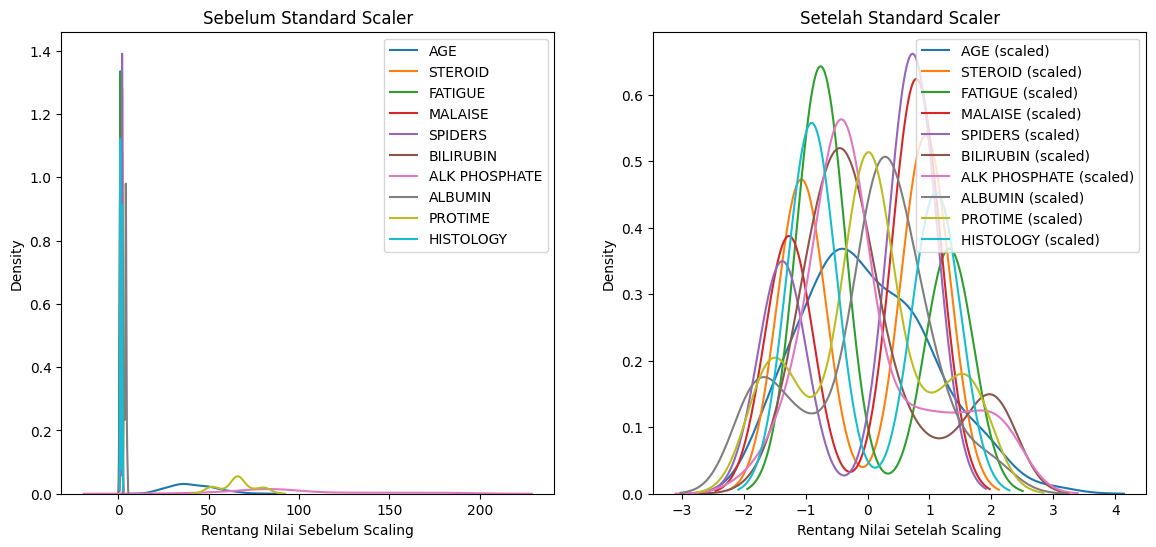

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kembali X_train_selected ke DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)

# Menampilkan grafik distribusi fitur sebelum dan sesudah scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# Sebelum Standard Scaler (Menggunakan data setelah feature selection, sebelum scaling)
ax1.set_title('Sebelum Standard Scaler')
for col in X_train_selected_df.columns:  # Gunakan fitur yang telah dipilih
    sns.kdeplot(X_train_selected_df[col], ax=ax1, label=col)

# Setelah Standard Scaler (Menggunakan data setelah scaling)
ax2.set_title('Setelah Standard Scaler')
for col in X_train_scaled.columns:
    sns.kdeplot(X_train_scaled[col], ax=ax2, label=f'{col} (scaled)')

# Tambahkan label sumbu dan legenda
ax1.set_xlabel('Rentang Nilai Sebelum Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Scaling')
ax1.legend()
ax2.legend()

# Tampilkan grafik
plt.show()


**ANALISIS**

Dapat dilihat bahwa setelah scaling data sudah memiliki skala yang seragam yakni terletak di antara  -3 hingga 3

# 5.PEMODELAN KLASIFIKASI

**A. RANDOM FOREST**

In [685]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model dengan data setelah feature selection dan scaling
rf_model.fit(X_train_scaled, y_train)

# Prediksi data testing setelah feature selection dan scaling
rf_preds = rf_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)


**ANALISIS**

disini saya melakukan klasifikasi pada data yang imbalance menggunakan metode random forest

**B. KNN**

In [686]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN dengan jumlah tetangga k=17 (bisa disesuaikan)
knn_model = KNeighborsClassifier(n_neighbors=17, weights='distance', metric='euclidean')

# Latih model dengan data setelah feature selection dan scaling
knn_model.fit(X_train_scaled, y_train)

# Prediksi data testing setelah feature selection dan scaling
knn_preds = knn_model.predict(X_test_scaled)
knn_probs = knn_model.predict_proba(X_test_scaled)


**ANALISIS**

disini saya melakukan klasifikasi pada data yang imbalance menggunakan metode KNN

**C. SVM**

In [687]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Latih model dengan data setelah feature selection dan scaling
svm_model.fit(X_train_scaled, y_train)

# Prediksi data testing setelah feature selection dan scaling
svm_preds = svm_model.predict(X_test_scaled)
svm_probs = svm_model.predict_proba(X_test_scaled)


**ANALISIS**

disini saya melakukan klasifikasi pada data yang imbalance menggunakan metode svm

# 6. EVALUASI DENGAN CONFUSION MATRIX

**A. EVALUASI MODEL RANDOM FOREST**

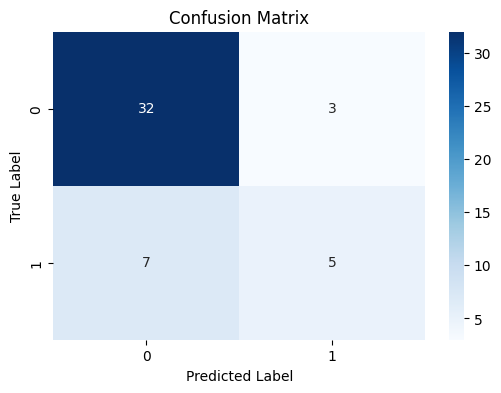

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        35
           1       0.62      0.42      0.50        12

    accuracy                           0.79        47
   macro avg       0.72      0.67      0.68        47
weighted avg       0.77      0.79      0.77        47



In [688]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi Model: Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_preds)

# Tampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Evaluasi Model: Classification Report
class_report = classification_report(y_test, rf_preds)
print("Classification Report:\n", class_report)


**ANALISIS**

Disini saya menampilkan evaluasi dari klasifikasi  menggunakan metode random forest didapatkan bahwa :
1. True Negative (TN) = 32 : Model benar memprediksi kelas 0 sebanyak 32 kali.
2. False Positive (FP) = 3 : Model salah memprediksi kelas 1, padahal seharusnya kelas 0.
3. False Negative (FN) = 7 : Model salah memprediksi kelas 0, padahal seharusnya kelas 1.
4. True Positive (TP) = 5 : Model benar memprediksi kelas 1 sebanyak 5 kali.
5. Class 0 (0.91) : Dari semua data sebenarnya kelas 0, 91% berhasil diprediksi benar.
6. Class 1 (0.42) : Dari semua data sebenarnya kelas 1, hanya 42% berhasil diprediksi benar.
7. Class 0 (0.86) : Kombinasi presisi dan recall yang cukup baik.
8. Class 1 (0.50) : Model kurang baik dalam memprediksi kelas 1.
9. Model memiliki akurasi 79%




**B. EVALUASI MODEL KNN**

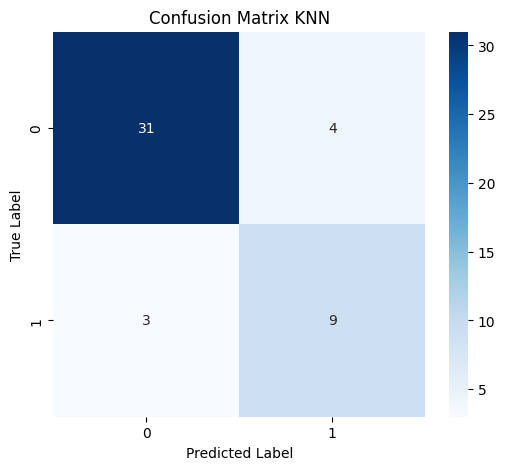

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.69      0.75      0.72        12

    accuracy                           0.85        47
   macro avg       0.80      0.82      0.81        47
weighted avg       0.86      0.85      0.85        47



In [689]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, knn_preds)

# Tampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix KNN')
plt.show()

# Tampilkan classification report
print("Classification Report:\n", classification_report(y_test, knn_preds))


**ANALISIS**

Disini saya menampilkan evaluasi dari klasifikasi  menggunakan metode knn  didapatkan bahwa :
1. True Positive (TP) = 9 : Model memprediksi 1 (Positif) dengan benar sebanyak 9 kali.
2. True Negative (TN) = 31 : Model memprediksi 0 (Negatif) dengan benar sebanyak 31 kali.
3. False Positive (FP) = 4 : Model salah memprediksi 1 (Positif) padahal seharusnya 0 (Negatif).
4. False Negative (FN) = 3 : Model salah memprediksi 0 (Negatif) padahal seharusnya 1 (Positif).
5. Berdasarkan precision Kelas 0: 0.91 : Dari semua prediksi "Negatif", 91% benar dan kelas 1: 0.69 → Dari semua prediksi "Positif", 69% benar.
6. berdasarkan recall : kelas 0: 0.89 :  Dari semua data sebenarnya "Negatif", 89% terdeteksi dengan benar dan Kelas 1: 0.75 : Dari semua data sebenarnya "Positif", 75% terdeteksi dengan benar.
7. F1-score lebih rendah untuk kelas 1 menunjukkan model masih kurang optimal dalam mendeteksi kelas positif.
8. Akurasi model = 0.85 (85%) yang berarti model cukup baik dalam memprediksi keseluruhan data.

**C. EVALUASI MODEL SVM**

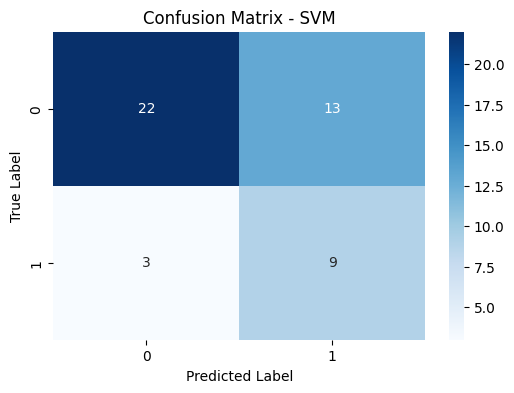

Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.41      0.75      0.53        12

    accuracy                           0.66        47
   macro avg       0.64      0.69      0.63        47
weighted avg       0.76      0.66      0.68        47



In [690]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluasi Model: Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_preds)

# Tampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()

# Evaluasi Model: Classification Report
class_report = classification_report(y_test, svm_preds)
print("Classification Report - SVM:\n", class_report)


**ANALISIS**

Disini saya menampilkan evaluasi dari klasifikasi  menggunakan metode svm didapatkan bahwa :
1. True Positive (TP) = 9 : Model memprediksi 1 (Positif) dengan benar sebanyak 9 kali.
2. True Negative (TN) = 22 : Model memprediksi 0 (Negatif) dengan benar sebanyak 22 kali.
3. False Positive (FP) = 13 : Model salah memprediksi 1 (Positif) padahal seharusnya 0 (Negatif).
4. False Negative (FN) = 3 : Model salah memprediksi 0 (Negatif) padahal seharusnya 1 (Positif).
5. Berdasarkan precision didapatan Kelas 0: 0.88 :  Dari semua prediksi "Negatif", 88% benar dan Kelas 1: 0.41 : Dari semua prediksi "Positif", hanya 41% yang benar
6. Akurasi model = 0.66 (66%), yang menunjukkan bahwa model cukup lemah dalam memprediksi dengan benar.

**ANALISIS**

Berdasarkan ketiga model ini yang memilki nilai  akurasi tertinggi dimiliki oleh algoritma knn kemudian di susul algortima random forest dan yang terendah adalah svm pada dataset imbalance ini

# 6. EVALUASI DENGAN ROC AUC

**A. ROC DENGAN MICRO AVERAGE**

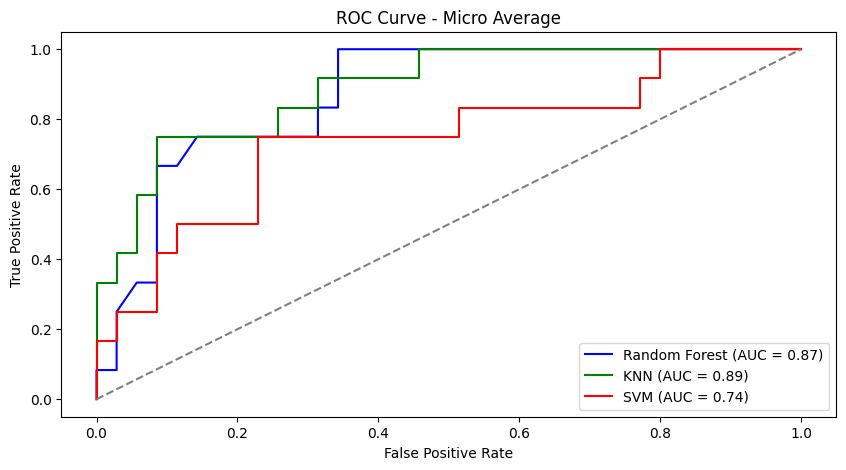

In [691]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Model probabilitas
models = {
    "Random Forest": rf_probs,
    "KNN": knn_probs,
    "SVM": svm_probs
}

colors = ['blue', 'green', 'red']


plt.figure(figsize=(10, 5))
for (name, probs), color in zip(models.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])  # Gunakan probabilitas kelas positif
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Micro Average")
plt.legend()
plt.show()

**ANALISIS**

Disini saya juga mengevaluasi berdasarkan ROC dan AUC berdasarkan micro average. Micro average ini menghitung metrik dengan menjumlahkan TP (True Positive), FP (False Positive), TN (True Negative), dan FN (False Negative) dari semua kelas, lalu menghitung precision, recall, dan f1-score berdasarkan total tersebut. didapatkan bahwa :
1. Model KNN dan Random Forest lebih akurat dibandingkan SVM dalam klasifikasi yakni dengan nilai 0.89 dan 0.87  sedangkan svm hanya mendapatkan nilai 0.74

**B. ROC DENGAN MICRO AVERAGE**

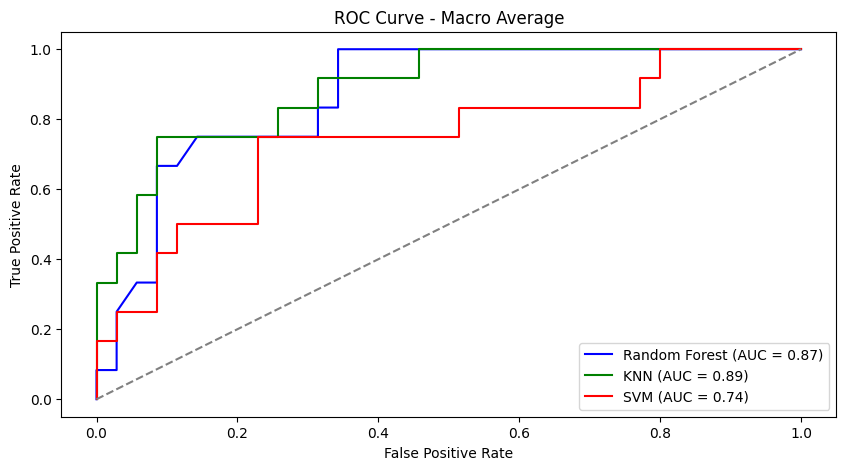

In [692]:
plt.figure(figsize=(10, 5))
for (name, probs), color in zip(models.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1])  # Gunakan probabilitas kelas positif
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Macro Average")
plt.legend()
plt.show()

**ANALISIS**

Disini saya juga mengevaluasi berdasarkan ROC dan AUC berdasarkan macro average. Macro  average perhitungan AUC dilakukan dengan menghitung rata-rata AUC dari tiap kelas tanpa mempertimbangkan jumlah sampel dalam kelas tersebut didapatkan bahwa :
1. Model KNN dan Random Forest lebih akurat dibandingkan SVM dalam klasifikasi yakni dengan nilai 0.89 dan 0.87



# **WEEK 4 KLASIFIKASI DATA HEPATITIS BALANCE DATASET**

# 1. BALANCE DATASET

<Figure size 800x500 with 0 Axes>

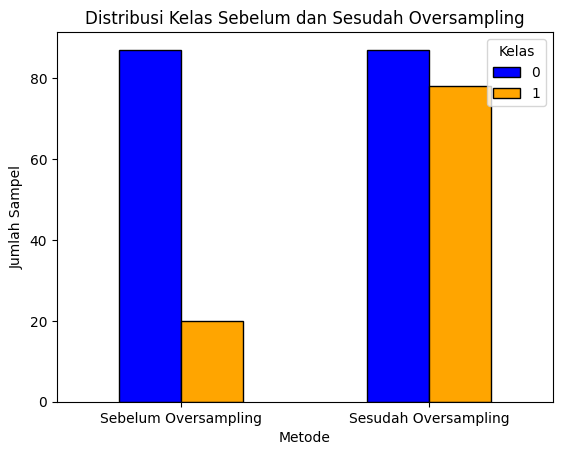

In [693]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Simpan distribusi awal
initial_counts = y_train.value_counts()

# Terapkan RandomOverSampler menggunakan dataset yang telah di-scaled
oversampler = RandomOverSampler(sampling_strategy=0.9, random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

# Simpan distribusi setelah oversampling
balanced_counts = y_train_balanced.value_counts()

# Buat DataFrame untuk visualisasi
df_counts = pd.DataFrame({'Sebelum Oversampling': initial_counts, 'Sesudah Oversampling': balanced_counts})
df_counts = df_counts.T  # Transpose agar bisa diplot

# Plot menggunakan seaborn
plt.figure(figsize=(8, 5))
df_counts.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')

plt.title('Distribusi Kelas Sebelum dan Sesudah Oversampling')
plt.xlabel('Metode')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.legend(title="Kelas", loc='upper right')

plt.show()


**ANALISIS**

Disini saya menggunakan data yang telah di scalling pada saat data imbalance, kemudian saya melakukan balance dataset menggunakan metode Random OverSampling. Metode Random OverSampling bekerja  dengan menambahkan duplikasi sampel dari kelas minoritas (kelas 1) sampai jumlahnya mendekati 90% dari kelas mayoritas (kelas 0). Dapat dilihat pada grafik data berhasil dilakukan balance 

# 2. PEMODELAN

In [694]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5 bisa disesuaikan
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# List model untuk iterasi
models = {
    "Random Forest": rf_model,
    "KNN": knn_model,
    "SVM": svm_model
}
    
   


**ANALISIS**

Sama seperti klasifikasi dengan dataset imbalance tadi, di dataset balance ini saya mengklasifikasikan dengan 3 algoritma yakni random forest, knn dan juga svm

# 3. EVALUASI CONFUSION MATRIX DAN CLASSIFICAIION REPORT


=== Model: Random Forest ===
Akurasi: 0.7447


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


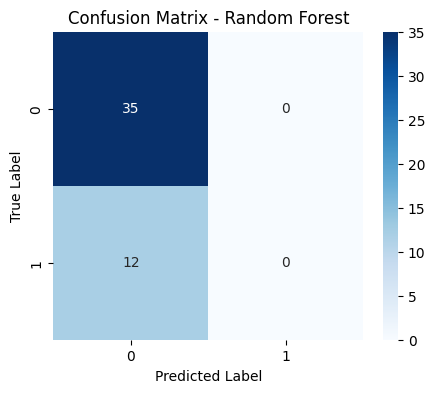

C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        35
           1       0.00      0.00      0.00        12

    accuracy                           0.74        47
   macro avg       0.37      0.50      0.43        47
weighted avg       0.55      0.74      0.64        47


=== Model: KNN ===
Akurasi: 0.3191


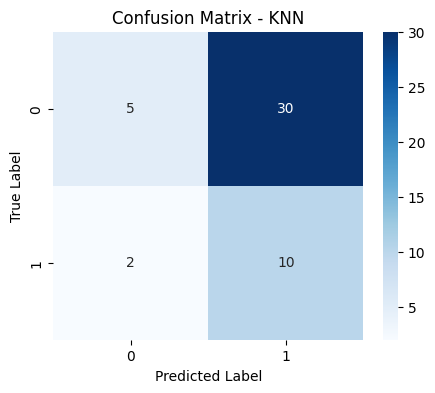

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.14      0.24        35
           1       0.25      0.83      0.38        12

    accuracy                           0.32        47
   macro avg       0.48      0.49      0.31        47
weighted avg       0.60      0.32      0.28        47


=== Model: SVM ===
Akurasi: 0.7447


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


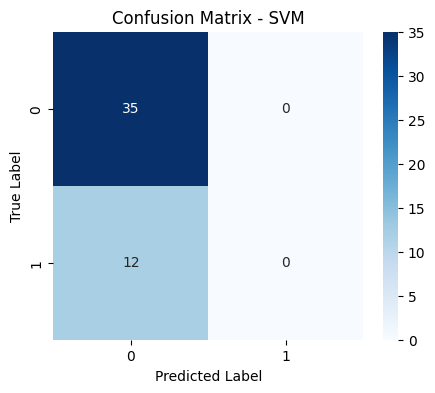

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        35
           1       0.00      0.00      0.00        12

    accuracy                           0.74        47
   macro avg       0.37      0.50      0.43        47
weighted avg       0.55      0.74      0.64        47



C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [695]:
# Loop untuk melatih dan mengevaluasi setiap model
for name, model in models.items():
    print(f"\n=== Model: {name} ===")
    
    # Latih model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Prediksi
    y_pred = model.predict(X_test_selected) 

# Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {accuracy:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

**ANALISIS EVALUASI ALGORTIMA RANDOM FOREST**

Disini saya menampilkan evaluasi dari klasifikasi  menggunakan metode random forest  didapatkan bahwa :
1. True Negative (TN) = 35 : Model memprediksi kelas 0 dengan benar sebanyak 35 kali.
2. False Positive (FP) = 0 : Model tidak pernah salah memprediksi kelas 1 sebagai kelas 0.
3. False Negative (FN) = 12 : Model salah memprediksi kelas 1 sebagai kelas 0 sebanyak 12 kali.
4. True Positive (TP) = 0 : Tidak ada prediksi benar untuk kelas 1.
5. Precision dan Recall untuk kelas 1 = 0.00 (0%) : Model tidak mampu mengenali kelas 1 sama sekali.
6. Accuracy = 74% : Model terlihat cukup akurat, tetapi hanya karena kelas 0 dominan.



**ANALISIS EVALUASI ALGORITMA KNN**

Disini saya menampilkan evaluasi dari klasifikasi  menggunakan metode KNN  didapatkan bahwa :
1. True Negative (TN) = 5 : Model berhasil memprediksi kelas 0 dengan benar sebanyak 5 kali.
2. False Positive (FP) = 30 : Model salah memprediksi kelas 0 sebagai kelas 1 sebanyak 30 kali (kesalahan tinggi).
3. False Negative (FN) = 2 : Model salah memprediksi kelas 1 sebagai kelas 0 sebanyak 2 kali.
4. True Positive (TP) = 10 : Model berhasil memprediksi kelas 1 dengan benar sebanyak 10 kali.
5. Precision kelas 0 = 0.71 (71%) : Dari semua prediksi kelas 0, hanya 71% yang benar.
6. Recall kelas 0 = 0.14 (14%) : Dari semua data yang seharusnya kelas 0, hanya 14% yang terdeteksi dengan benar.
7. Precision kelas 1 = 0.25 (25%) : Dari semua prediksi kelas 1, hanya 25% yang benar.
8. Recall kelas 1 = 0.83 (83%) : Dari semua data yang seharusnya kelas 1, sebanyak 83% terdeteksi dengan benar.
8. Akurasi total = 32% : Model hanya benar dalam 32% dari seluruh prediksi.



**ANALISIS EVALUASI ALGORITMA SVM**

Disini saya menampilkan evaluasi dari klasifikasi  menggunakan metode SVM  didapatkan bahwa :

1. True Negative (TN) = 35 : Model berhasil memprediksi kelas 0 dengan benar sebanyak 35 kali.
2. False Positive (FP) = 0 : Model tidak pernah salah memprediksi kelas 0 sebagai kelas 1.
3. False Negative (FN) = 12 : Model salah memprediksi kelas 1 sebagai kelas 0 sebanyak 12 kali.
4. True Positive (TP) = 0 : Model tidak pernah berhasil memprediksi kelas 1 dengan benar.
5. Precision kelas 1 = 0.00 (0%) : Model tidak pernah berhasil memprediksi kelas 1.
6. Recall kelas 1 = 0.00 (0%) : Dari semua data yang benar-benar kelas 1, tidak ada yang berhasil terdeteksi.
7. Akurasi total = 74%, tetapi ini akurasi saja tidak cukup kita harus mempertimbangkan dari precision dan recall karena model hanya bisa mengenali satu kelas saja.



# 4. EVALUASI DENGAN ROC AUC

**A. ROC DENGAN MICRO AVERAGE**

Random Forest - Micro AUC: 0.7238
KNN - Micro AUC: 0.4881
SVM - Micro AUC: 0.5000


C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\nimaa\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


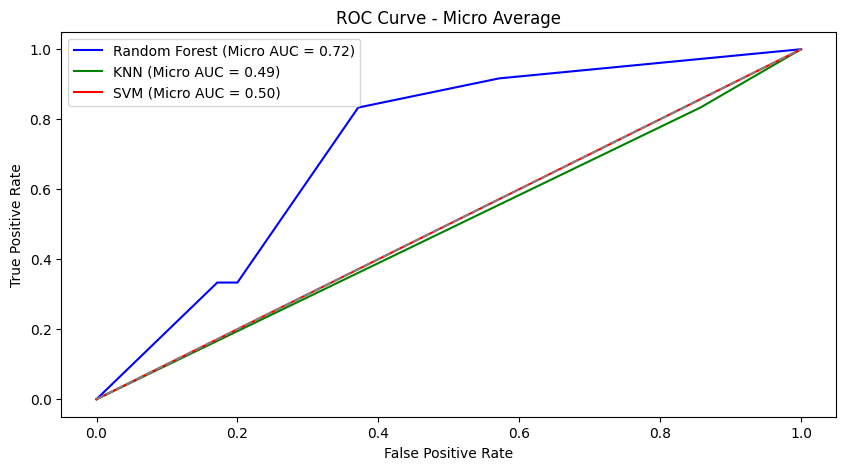

In [696]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Simpan probabilitas prediksi dari setiap model
model_probs = {}
for name, model in models.items():
    model_probs[name] = model.predict_proba(X_test_selected)[:, 1]  # Prob kelas positif saja

# ROC AUC Micro Average
plt.figure(figsize=(10, 5))
colors = ['blue', 'green', 'red']

for (name, probs), color in zip(model_probs.items(), colors):
    micro_auc = roc_auc_score(y_test, probs, average='micro')
    print(f"{name} - Micro AUC: {micro_auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color=color, label=f"{name} (Micro AUC = {micro_auc:.2f})")
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Micro Average')
plt.legend()
plt.show()

**ANALISIS**

Disini saya juga mengevaluasi berdasarkan ROC dan AUC berdasarkan micro average. Micro average ini menghitung metrik dengan menjumlahkan TP (True Positive), FP (False Positive), TN (True Negative), dan FN (False Negative) dari semua kelas, lalu menghitung precision, recall, dan f1-score berdasarkan total tersebut. didapatkan bahwa :
1. Model Random Forest lebih akurat dibandingkan SVM dan knn  dalam klasifikasi yakni dengan nilai 0.72

**B. ROC DENGAN MACRO AVERAGE**

Random Forest - Macro AUC: 0.7238
KNN - Macro AUC: 0.4881
SVM - Macro AUC: 0.5000


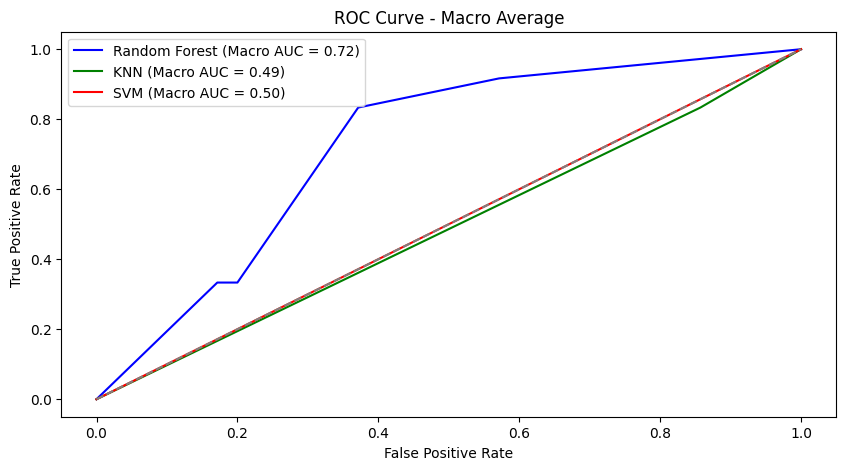

In [697]:
# ROC AUC Macro Average
plt.figure(figsize=(10, 5))

for (name, probs), color in zip(model_probs.items(), colors):
    macro_auc = roc_auc_score(y_test, probs, average='macro')
    print(f"{name} - Macro AUC: {macro_auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color=color, label=f"{name} (Macro AUC = {macro_auc:.2f})")
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Macro Average')
plt.legend()
plt.show()


**ANALISIS**

Disini saya juga mengevaluasi berdasarkan ROC dan AUC berdasarkan macro average. Macro  average perhitungan AUC dilakukan dengan menghitung rata-rata AUC dari tiap kelas tanpa mempertimbangkan jumlah sampel dalam kelas tersebut didapatkan bahwa :
1. Model Random Forest lebih aakurat dibandingkan SVM dan knn dalam klasifikasi yakni dengan nilai 0.72



# **KESIMPULAN HASIL KLASIFIKASI DATA IMBALANCE DAN IMBALANCE**

1. Untuk dataset imbalance, KNN lebih baik dibandingkan Random Forest dan SVM karena memiliki akurasi lebih tinggi dan lebih baik dalam mengenali kelas 1.
2. Untuk dataset balance, tidak ada model yang optimal, tetapi Random Forest memiliki performa terbaik, meskipun tetap memiliki kelemahan dalam mengenali kelas 1.
3. Data yang baik untuk klasifikasi di study kasus ini berada pada dataset imbalance,Namun, dataset imbalance dapat menyebabkan model kurang optimal dalam mendeteksi kelas minoritas (kelas 1). Mengapa dataset imbalance kalah bagus? kemungkinan hasil kerja saya ada yang kurang cocok dalam metode balance datanya, di sini saya menggunakan teknik random oversampling,saya menyarankan untuk penelitian lebih lanjut bisa di coba dengan metode balance data yang lain